<a href="https://colab.research.google.com/github/Shak97/generative-adversarial-network/blob/master/generative_adversarial_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
!pip install git+https://www.github.com/keras-team/keras-contrib.git

  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-15xpvgtd
  Running command git clone -q https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-15xpvgtd
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-cp36-none-any.whl size=101065 sha256=fcb565bcafda54092b6fcdbecea2bd91aca1c577fb34a84bb3edd612da12ef9d
  Stored in directory: /tmp/pip-ephem-wheel-cache-mven7bx4/wheels/11/27/c8/4ed56de7b55f4f61244e2dc6ef3cdbaff2692527a2ce6502ba
Successfully built keras-contrib


In [3]:

from __future__ import print_function, division
import scipy

from keras.datasets import mnist
from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization
from keras.layers import Input, Dense, Reshape, Flatten, Dropout, Concatenate
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam
import datetime
import matplotlib.pyplot as plt
import sys
import numpy as np
import os
import cv2
import keras
from keras import backend as k
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from google.colab.patches import cv2_imshow

from keras.optimizers import Adam
from keras.initializers import RandomNormal
from keras.models import Model
from keras.models import Input
from keras.layers import Conv2D
from keras.layers import LeakyReLU
from keras.layers import Activation
from keras.layers import Concatenate
from keras.layers import BatchNormalization
from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization
from keras.utils.vis_utils import plot_model


Using TensorFlow backend.


In [4]:
import tensorflow as tf
from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization
# define layer
layer = InstanceNormalization(axis=-1)

In [0]:
input_dir = '/content/drive/My Drive/reconstruction_Mri/input_images/'
target_dir = '/content/drive/My Drive/reconstruction_Mri/target_images/'

In [0]:
sortedlist = ['sub-101image0.png', 'sub-101image1.png', 'sub-101image2.png', 'sub-101image3.png', 'sub-101image4.png', 'sub-101image5.png', 'sub-101image6.png', 'sub-101image7.png', 'sub-101image8.png', 'sub-101image9.png', 'sub-101image10.png', 'sub-101image11.png', 'sub-101image12.png', 'sub-101image13.png', 'sub-101image14.png', 'sub-101image15.png', 'sub-101image16.png', 'sub-101image17.png', 'sub-101image18.png', 'sub-101image19.png', 'sub-101image20.png', 'sub-101image21.png', 'sub-101image22.png', 'sub-101image23.png', 'sub-101image24.png', 'sub-101image25.png', 'sub-101image26.png', 'sub-101image27.png', 'sub-101image28.png', 'sub-101image29.png', 'sub-101image30.png', 'sub-101image31.png', 'sub-101image32.png', 'sub-101image33.png', 'sub-101image34.png', 'sub-101image35.png', 'sub-101image36.png', 'sub-101image37.png', 'sub-101image38.png', 'sub-101image39.png', 'sub-101image40.png', 'sub-101image41.png', 'sub-101image42.png', 'sub-101image43.png', 'sub-101image44.png', 'sub-101image45.png', 'sub-101image46.png', 'sub-101image47.png', 'sub-101image48.png', 'sub-101image49.png', 'sub-101image50.png', 'sub-101image51.png', 'sub-101image52.png', 'sub-101image53.png', 'sub-101image54.png', 'sub-101image55.png', 'sub-101image56.png', 'sub-101image57.png', 'sub-101image58.png', 'sub-101image59.png', 'sub-101image60.png', 'sub-101image61.png', 'sub-101image62.png', 'sub-101image63.png', 'sub-101image64.png', 'sub-101image65.png', 'sub-101image66.png', 'sub-101image67.png', 'sub-101image68.png', 'sub-101image69.png', 'sub-101image70.png', 'sub-101image71.png', 'sub-101image72.png', 'sub-101image73.png', 'sub-101image74.png', 'sub-101image75.png', 'sub-101image76.png', 'sub-101image77.png', 'sub-101image78.png', 'sub-101image79.png', 'sub-101image80.png', 'sub-101image81.png', 'sub-101image82.png', 'sub-101image83.png', 'sub-101image84.png', 'sub-101image85.png', 'sub-101image86.png', 'sub-101image87.png', 'sub-101image88.png', 'sub-101image89.png', 'sub-101image90.png', 'sub-101image91.png', 'sub-101image92.png', 'sub-101image93.png', 'sub-101image94.png', 'sub-101image95.png', 'sub-101image96.png', 'sub-101image97.png', 'sub-101image98.png', 'sub-101image99.png', 'sub-101image100.png', 'sub-101image101.png', 'sub-101image102.png', 'sub-101image103.png', 'sub-101image104.png', 'sub-101image105.png', 'sub-101image106.png', 'sub-101image107.png', 'sub-101image108.png', 'sub-101image109.png', 'sub-101image110.png', 'sub-101image111.png', 'sub-101image112.png', 'sub-101image113.png', 'sub-101image114.png', 'sub-101image115.png', 'sub-101image116.png', 'sub-101image117.png', 'sub-101image118.png', 'sub-101image119.png', 'sub-101image120.png', 'sub-101image121.png', 'sub-101image122.png', 'sub-101image123.png', 'sub-101image124.png', 'sub-101image125.png', 'sub-101image126.png', 'sub-101image127.png', 'sub-101image128.png', 'sub-101image129.png', 'sub-101image130.png', 'sub-101image131.png', 'sub-101image132.png', 'sub-101image133.png', 'sub-101image134.png', 'sub-101image135.png', 'sub-101image136.png', 'sub-101image137.png', 'sub-101image138.png', 'sub-101image139.png', 'sub-101image140.png', 'sub-101image141.png', 'sub-101image142.png', 'sub-101image143.png', 'sub-101image144.png', 'sub-101image145.png', 'sub-101image146.png', 'sub-101image147.png', 'sub-101image148.png', 'sub-101image149.png', 'sub-101image150.png', 'sub-101image151.png', 'sub-101image152.png', 'sub-101image153.png', 'sub-101image154.png', 'sub-101image155.png', 'sub-101image156.png', 'sub-101image157.png', 'sub-101image158.png', 'sub-101image159.png', 'sub-101image160.png', 'sub-101image161.png', 'sub-101image162.png', 'sub-101image163.png', 'sub-101image164.png', 'sub-101image165.png', 'sub-101image166.png', 'sub-101image167.png', 'sub-101image168.png', 'sub-101image169.png', 'sub-101image170.png', 'sub-101image171.png', 'sub-101image172.png', 'sub-101image173.png', 'sub-101image174.png', 'sub-101image175.png', 'sub-101image176.png', 'sub-101image177.png', 'sub-101image178.png', 'sub-101image179.png', 'sub-101image180.png', 'sub-101image181.png', 'sub-103image0.png', 'sub-103image1.png', 'sub-103image2.png', 'sub-103image3.png', 'sub-103image4.png', 'sub-103image5.png', 'sub-103image6.png', 'sub-103image7.png', 'sub-103image8.png', 'sub-103image9.png', 'sub-103image10.png', 'sub-103image11.png', 'sub-103image12.png', 'sub-103image13.png', 'sub-103image14.png', 'sub-103image15.png', 'sub-103image16.png', 'sub-103image17.png', 'sub-103image18.png', 'sub-103image19.png', 'sub-103image20.png', 'sub-103image21.png', 'sub-103image22.png', 'sub-103image23.png', 'sub-103image24.png', 'sub-103image25.png', 'sub-103image26.png', 'sub-103image27.png', 'sub-103image28.png', 'sub-103image29.png', 'sub-103image30.png', 'sub-103image31.png', 'sub-103image32.png', 'sub-103image33.png', 'sub-103image34.png', 'sub-103image35.png', 'sub-103image36.png', 'sub-103image37.png', 'sub-103image38.png', 'sub-103image39.png', 'sub-103image40.png', 'sub-103image41.png', 'sub-103image42.png', 'sub-103image43.png', 'sub-103image44.png', 'sub-103image45.png', 'sub-103image46.png', 'sub-103image47.png', 'sub-103image48.png', 'sub-103image49.png', 'sub-103image50.png', 'sub-103image51.png', 'sub-103image52.png', 'sub-103image53.png', 'sub-103image54.png', 'sub-103image55.png', 'sub-103image56.png', 'sub-103image57.png', 'sub-103image58.png', 'sub-103image59.png', 'sub-103image60.png', 'sub-103image61.png', 'sub-103image62.png', 'sub-103image63.png', 'sub-103image64.png', 'sub-103image65.png', 'sub-103image66.png', 'sub-103image67.png', 'sub-103image68.png', 'sub-103image69.png', 'sub-103image70.png', 'sub-103image71.png', 'sub-103image72.png', 'sub-103image73.png', 'sub-103image74.png', 'sub-103image75.png', 'sub-103image76.png', 'sub-103image77.png', 'sub-103image78.png', 'sub-103image79.png', 'sub-103image80.png', 'sub-103image81.png', 'sub-103image82.png', 'sub-103image83.png', 'sub-103image84.png', 'sub-103image85.png', 'sub-103image86.png', 'sub-103image87.png', 'sub-103image88.png', 'sub-103image89.png', 'sub-103image90.png', 'sub-103image91.png', 'sub-103image92.png', 'sub-103image93.png', 'sub-103image94.png', 'sub-103image95.png', 'sub-103image96.png', 'sub-103image97.png', 'sub-103image98.png', 'sub-103image99.png', 'sub-103image100.png', 'sub-103image101.png', 'sub-103image102.png', 'sub-103image103.png', 'sub-103image104.png', 'sub-103image105.png', 'sub-103image106.png', 'sub-103image107.png', 'sub-103image108.png', 'sub-103image109.png', 'sub-103image110.png', 'sub-103image111.png', 'sub-103image112.png', 'sub-103image113.png', 'sub-103image114.png', 'sub-103image115.png', 'sub-103image116.png', 'sub-103image117.png', 'sub-103image118.png', 'sub-103image119.png', 'sub-103image120.png', 'sub-103image121.png', 'sub-103image122.png', 'sub-103image123.png', 'sub-103image124.png', 'sub-103image125.png', 'sub-103image126.png', 'sub-103image127.png', 'sub-103image128.png', 'sub-103image129.png', 'sub-103image130.png', 'sub-103image131.png', 'sub-103image132.png', 'sub-103image133.png', 'sub-103image134.png', 'sub-103image135.png', 'sub-103image136.png', 'sub-103image137.png', 'sub-103image138.png', 'sub-103image139.png', 'sub-103image140.png', 'sub-103image141.png', 'sub-103image142.png', 'sub-103image143.png', 'sub-103image144.png', 'sub-103image145.png', 'sub-103image146.png', 'sub-103image147.png', 'sub-103image148.png', 'sub-103image149.png', 'sub-103image150.png', 'sub-103image151.png', 'sub-103image152.png', 'sub-103image153.png', 'sub-103image154.png', 'sub-103image155.png', 'sub-103image156.png', 'sub-103image157.png', 'sub-103image158.png', 'sub-103image159.png', 'sub-103image160.png', 'sub-103image161.png', 'sub-103image162.png', 'sub-103image163.png', 'sub-103image164.png', 'sub-103image165.png', 'sub-103image166.png', 'sub-103image167.png', 'sub-103image168.png', 'sub-103image169.png', 'sub-103image170.png', 'sub-103image171.png', 'sub-103image172.png', 'sub-103image173.png', 'sub-103image174.png', 'sub-103image175.png', 'sub-103image176.png', 'sub-103image177.png', 'sub-103image178.png', 'sub-103image179.png', 'sub-103image180.png', 'sub-103image181.png', 'sub-108image0.png', 'sub-108image1.png', 'sub-108image2.png', 'sub-108image3.png', 'sub-108image4.png', 'sub-108image5.png', 'sub-108image6.png', 'sub-108image7.png', 'sub-108image8.png', 'sub-108image9.png', 'sub-108image10.png', 'sub-108image11.png', 'sub-108image12.png', 'sub-108image13.png', 'sub-108image14.png', 'sub-108image15.png', 'sub-108image16.png', 'sub-108image17.png', 'sub-108image18.png', 'sub-108image19.png', 'sub-108image20.png', 'sub-108image21.png', 'sub-108image22.png', 'sub-108image23.png', 'sub-108image24.png', 'sub-108image25.png', 'sub-108image26.png', 'sub-108image27.png', 'sub-108image28.png', 'sub-108image29.png', 'sub-108image30.png', 'sub-108image31.png', 'sub-108image32.png', 'sub-108image33.png', 'sub-108image34.png', 'sub-108image35.png', 'sub-108image36.png', 'sub-108image37.png', 'sub-108image38.png', 'sub-108image39.png', 'sub-108image40.png', 'sub-108image41.png', 'sub-108image42.png', 'sub-108image43.png', 'sub-108image44.png', 'sub-108image45.png', 'sub-108image46.png', 'sub-108image47.png', 'sub-108image48.png', 'sub-108image49.png', 'sub-108image50.png', 'sub-108image51.png', 'sub-108image52.png', 'sub-108image53.png', 'sub-108image54.png', 'sub-108image55.png', 'sub-108image56.png', 'sub-108image57.png', 'sub-108image58.png', 'sub-108image59.png', 'sub-108image60.png', 'sub-108image61.png', 'sub-108image62.png', 'sub-108image63.png', 'sub-108image64.png', 'sub-108image65.png', 'sub-108image66.png', 'sub-108image67.png', 'sub-108image68.png', 'sub-108image69.png', 'sub-108image70.png', 'sub-108image71.png', 'sub-108image72.png', 'sub-108image73.png', 'sub-108image74.png', 'sub-108image75.png', 'sub-108image76.png', 'sub-108image77.png', 'sub-108image78.png', 'sub-108image79.png', 'sub-108image80.png', 'sub-108image81.png', 'sub-108image82.png', 'sub-108image83.png', 'sub-108image84.png', 'sub-108image85.png', 'sub-108image86.png', 'sub-108image87.png', 'sub-108image88.png', 'sub-108image89.png', 'sub-108image90.png', 'sub-108image91.png', 'sub-108image92.png', 'sub-108image93.png', 'sub-108image94.png', 'sub-108image95.png', 'sub-108image96.png', 'sub-108image97.png', 'sub-108image98.png', 'sub-108image99.png', 'sub-108image100.png', 'sub-108image101.png', 'sub-108image102.png', 'sub-108image103.png', 'sub-108image104.png', 'sub-108image105.png', 'sub-108image106.png', 'sub-108image107.png', 'sub-108image108.png', 'sub-108image109.png', 'sub-108image110.png', 'sub-108image111.png', 'sub-108image112.png', 'sub-108image113.png', 'sub-108image114.png', 'sub-108image115.png', 'sub-108image116.png', 'sub-108image117.png', 'sub-108image118.png', 'sub-108image119.png', 'sub-108image120.png', 'sub-108image121.png', 'sub-108image122.png', 'sub-108image123.png', 'sub-108image124.png', 'sub-108image125.png', 'sub-108image126.png', 'sub-108image127.png', 'sub-108image128.png', 'sub-108image129.png', 'sub-108image130.png', 'sub-108image131.png', 'sub-108image132.png', 'sub-108image133.png', 'sub-108image134.png', 'sub-108image135.png', 'sub-108image136.png', 'sub-108image137.png', 'sub-108image138.png', 'sub-108image139.png', 'sub-108image140.png', 'sub-108image141.png', 'sub-108image142.png', 'sub-108image143.png', 'sub-108image144.png', 'sub-108image145.png', 'sub-108image146.png', 'sub-108image147.png', 'sub-108image148.png', 'sub-108image149.png', 'sub-108image150.png', 'sub-108image151.png', 'sub-108image152.png', 'sub-108image153.png', 'sub-108image154.png', 'sub-108image155.png', 'sub-108image156.png', 'sub-108image157.png', 'sub-108image158.png', 'sub-108image159.png', 'sub-108image160.png', 'sub-108image161.png', 'sub-108image162.png', 'sub-108image163.png', 'sub-108image164.png', 'sub-108image165.png', 'sub-108image166.png', 'sub-108image167.png', 'sub-108image168.png', 'sub-108image169.png', 'sub-108image170.png', 'sub-108image171.png', 'sub-108image172.png', 'sub-108image173.png', 'sub-108image174.png', 'sub-108image175.png', 'sub-108image176.png', 'sub-108image177.png', 'sub-108image178.png', 'sub-108image179.png', 'sub-108image180.png', 'sub-108image181.png', 'sub-109image0.png', 'sub-109image1.png', 'sub-109image2.png', 'sub-109image3.png', 'sub-109image4.png', 'sub-109image5.png', 'sub-109image6.png', 'sub-109image7.png', 'sub-109image8.png', 'sub-109image9.png', 'sub-109image10.png', 'sub-109image11.png', 'sub-109image12.png', 'sub-109image13.png', 'sub-109image14.png', 'sub-109image15.png', 'sub-109image16.png', 'sub-109image17.png', 'sub-109image18.png', 'sub-109image19.png', 'sub-109image20.png', 'sub-109image21.png', 'sub-109image22.png', 'sub-109image23.png', 'sub-109image24.png', 'sub-109image25.png', 'sub-109image26.png', 'sub-109image27.png', 'sub-109image28.png', 'sub-109image29.png', 'sub-109image30.png', 'sub-109image31.png', 'sub-109image32.png', 'sub-109image33.png', 'sub-109image34.png', 'sub-109image35.png', 'sub-109image36.png', 'sub-109image37.png', 'sub-109image38.png', 'sub-109image39.png', 'sub-109image40.png', 'sub-109image41.png', 'sub-109image42.png', 'sub-109image43.png', 'sub-109image44.png', 'sub-109image45.png', 'sub-109image46.png', 'sub-109image47.png', 'sub-109image48.png', 'sub-109image49.png', 'sub-109image50.png', 'sub-109image51.png', 'sub-109image52.png', 'sub-109image53.png', 'sub-109image54.png', 'sub-109image55.png', 'sub-109image56.png', 'sub-109image57.png', 'sub-109image58.png', 'sub-109image59.png', 'sub-109image60.png', 'sub-109image61.png', 'sub-109image62.png', 'sub-109image63.png', 'sub-109image64.png', 'sub-109image65.png', 'sub-109image66.png', 'sub-109image67.png', 'sub-109image68.png', 'sub-109image69.png', 'sub-109image70.png', 'sub-109image71.png', 'sub-109image72.png', 'sub-109image73.png', 'sub-109image74.png', 'sub-109image75.png', 'sub-109image76.png', 'sub-109image77.png', 'sub-109image78.png', 'sub-109image79.png', 'sub-109image80.png', 'sub-109image81.png', 'sub-109image82.png', 'sub-109image83.png', 'sub-109image84.png', 'sub-109image85.png', 'sub-109image86.png', 'sub-109image87.png', 'sub-109image88.png', 'sub-109image89.png', 'sub-109image90.png', 'sub-109image91.png', 'sub-109image92.png', 'sub-109image93.png', 'sub-109image94.png', 'sub-109image95.png', 'sub-109image96.png', 'sub-109image97.png', 'sub-109image98.png', 'sub-109image99.png', 'sub-109image100.png', 'sub-109image101.png', 'sub-109image102.png', 'sub-109image103.png', 'sub-109image104.png', 'sub-109image105.png', 'sub-109image106.png', 'sub-109image107.png', 'sub-109image108.png', 'sub-109image109.png', 'sub-109image110.png', 'sub-109image111.png', 'sub-109image112.png', 'sub-109image113.png', 'sub-109image114.png', 'sub-109image115.png', 'sub-109image116.png', 'sub-109image117.png', 'sub-109image118.png', 'sub-109image119.png', 'sub-109image120.png', 'sub-109image121.png', 'sub-109image122.png', 'sub-109image123.png', 'sub-109image124.png', 'sub-109image125.png', 'sub-109image126.png', 'sub-109image127.png', 'sub-109image128.png', 'sub-109image129.png', 'sub-109image130.png', 'sub-109image131.png', 'sub-109image132.png', 'sub-109image133.png', 'sub-109image134.png', 'sub-109image135.png', 'sub-109image136.png', 'sub-109image137.png', 'sub-109image138.png', 'sub-109image139.png', 'sub-109image140.png', 'sub-109image141.png', 'sub-109image142.png', 'sub-109image143.png', 'sub-109image144.png', 'sub-109image145.png', 'sub-109image146.png', 'sub-109image147.png', 'sub-109image148.png', 'sub-109image149.png', 'sub-109image150.png', 'sub-109image151.png', 'sub-109image152.png', 'sub-109image153.png', 'sub-109image154.png', 'sub-109image155.png', 'sub-109image156.png', 'sub-109image157.png', 'sub-109image158.png', 'sub-109image159.png', 'sub-109image160.png', 'sub-109image161.png', 'sub-109image162.png', 'sub-109image163.png', 'sub-109image164.png', 'sub-109image165.png', 'sub-109image166.png', 'sub-109image167.png', 'sub-109image168.png', 'sub-109image169.png', 'sub-109image170.png', 'sub-109image171.png', 'sub-109image172.png', 'sub-109image173.png', 'sub-109image174.png', 'sub-109image175.png', 'sub-109image176.png', 'sub-109image177.png', 'sub-109image178.png', 'sub-109image179.png', 'sub-109image180.png', 'sub-109image181.png', 'sub-112image0.png', 'sub-112image1.png', 'sub-112image2.png', 'sub-112image3.png', 'sub-112image4.png', 'sub-112image5.png', 'sub-112image6.png', 'sub-112image7.png', 'sub-112image8.png', 'sub-112image9.png', 'sub-112image10.png', 'sub-112image11.png', 'sub-112image12.png', 'sub-112image13.png', 'sub-112image14.png', 'sub-112image15.png', 'sub-112image16.png', 'sub-112image17.png', 'sub-112image18.png', 'sub-112image19.png', 'sub-112image20.png', 'sub-112image21.png', 'sub-112image22.png', 'sub-112image23.png', 'sub-112image24.png', 'sub-112image25.png', 'sub-112image26.png', 'sub-112image27.png', 'sub-112image28.png', 'sub-112image29.png', 'sub-112image30.png', 'sub-112image31.png', 'sub-112image32.png', 'sub-112image33.png', 'sub-112image34.png', 'sub-112image35.png', 'sub-112image36.png', 'sub-112image37.png', 'sub-112image38.png', 'sub-112image39.png', 'sub-112image40.png', 'sub-112image41.png', 'sub-112image42.png', 'sub-112image43.png', 'sub-112image44.png', 'sub-112image45.png', 'sub-112image46.png', 'sub-112image47.png', 'sub-112image48.png', 'sub-112image49.png', 'sub-112image50.png', 'sub-112image51.png', 'sub-112image52.png', 'sub-112image53.png', 'sub-112image54.png', 'sub-112image55.png', 'sub-112image56.png', 'sub-112image57.png', 'sub-112image58.png', 'sub-112image59.png', 'sub-112image60.png', 'sub-112image61.png', 'sub-112image62.png', 'sub-112image63.png', 'sub-112image64.png', 'sub-112image65.png', 'sub-112image66.png', 'sub-112image67.png', 'sub-112image68.png', 'sub-112image69.png', 'sub-112image70.png', 'sub-112image71.png', 'sub-112image72.png', 'sub-112image73.png', 'sub-112image74.png', 'sub-112image75.png', 'sub-112image76.png', 'sub-112image77.png', 'sub-112image78.png', 'sub-112image79.png', 'sub-112image80.png', 'sub-112image81.png', 'sub-112image82.png', 'sub-112image83.png', 'sub-112image84.png', 'sub-112image85.png', 'sub-112image86.png', 'sub-112image87.png', 'sub-112image88.png', 'sub-112image89.png', 'sub-112image90.png', 'sub-112image91.png', 'sub-112image92.png', 'sub-112image93.png', 'sub-112image94.png', 'sub-112image95.png', 'sub-112image96.png', 'sub-112image97.png', 'sub-112image98.png', 'sub-112image99.png', 'sub-112image100.png', 'sub-112image101.png', 'sub-112image102.png', 'sub-112image103.png', 'sub-112image104.png', 'sub-112image105.png', 'sub-112image106.png', 'sub-112image107.png', 'sub-112image108.png', 'sub-112image109.png', 'sub-112image110.png', 'sub-112image111.png', 'sub-112image112.png', 'sub-112image113.png', 'sub-112image114.png', 'sub-112image115.png', 'sub-112image116.png', 'sub-112image117.png', 'sub-112image118.png', 'sub-112image119.png', 'sub-112image120.png', 'sub-112image121.png', 'sub-112image122.png', 'sub-112image123.png', 'sub-112image124.png', 'sub-112image125.png', 'sub-112image126.png', 'sub-112image127.png', 'sub-112image128.png', 'sub-112image129.png', 'sub-112image130.png', 'sub-112image131.png', 'sub-112image132.png', 'sub-112image133.png', 'sub-112image134.png', 'sub-112image135.png', 'sub-112image136.png', 'sub-112image137.png', 'sub-112image138.png', 'sub-112image139.png', 'sub-112image140.png', 'sub-112image141.png', 'sub-112image142.png', 'sub-112image143.png', 'sub-112image144.png', 'sub-112image145.png', 'sub-112image146.png', 'sub-112image147.png', 'sub-112image148.png', 'sub-112image149.png', 'sub-112image150.png', 'sub-112image151.png', 'sub-112image152.png', 'sub-112image153.png', 'sub-112image154.png', 'sub-112image155.png', 'sub-112image156.png', 'sub-112image157.png', 'sub-112image158.png', 'sub-112image159.png', 'sub-112image160.png', 'sub-112image161.png', 'sub-112image162.png', 'sub-112image163.png', 'sub-112image164.png', 'sub-112image165.png', 'sub-112image166.png', 'sub-112image167.png', 'sub-112image168.png', 'sub-112image169.png', 'sub-112image170.png', 'sub-112image171.png', 'sub-112image172.png', 'sub-112image173.png', 'sub-112image174.png', 'sub-112image175.png', 'sub-112image176.png', 'sub-112image177.png', 'sub-112image178.png', 'sub-112image179.png', 'sub-112image180.png', 'sub-112image181.png', 'sub-116image0.png', 'sub-116image1.png', 'sub-116image2.png', 'sub-116image3.png', 'sub-116image4.png', 'sub-116image5.png', 'sub-116image6.png', 'sub-116image7.png', 'sub-116image8.png', 'sub-116image9.png', 'sub-116image10.png', 'sub-116image11.png', 'sub-116image12.png', 'sub-116image13.png', 'sub-116image14.png', 'sub-116image15.png', 'sub-116image16.png', 'sub-116image17.png', 'sub-116image18.png', 'sub-116image19.png', 'sub-116image20.png', 'sub-116image21.png', 'sub-116image22.png', 'sub-116image23.png', 'sub-116image24.png', 'sub-116image25.png', 'sub-116image26.png', 'sub-116image27.png', 'sub-116image28.png', 'sub-116image29.png', 'sub-116image30.png', 'sub-116image31.png', 'sub-116image32.png', 'sub-116image33.png', 'sub-116image34.png', 'sub-116image35.png', 'sub-116image36.png', 'sub-116image37.png', 'sub-116image38.png', 'sub-116image39.png', 'sub-116image40.png', 'sub-116image41.png', 'sub-116image42.png', 'sub-116image43.png', 'sub-116image44.png', 'sub-116image45.png', 'sub-116image46.png', 'sub-116image47.png', 'sub-116image48.png', 'sub-116image49.png', 'sub-116image50.png', 'sub-116image51.png', 'sub-116image52.png', 'sub-116image53.png', 'sub-116image54.png', 'sub-116image55.png', 'sub-116image56.png', 'sub-116image57.png', 'sub-116image58.png', 'sub-116image59.png', 'sub-116image60.png', 'sub-116image61.png', 'sub-116image62.png', 'sub-116image63.png', 'sub-116image64.png', 'sub-116image65.png', 'sub-116image66.png', 'sub-116image67.png', 'sub-116image68.png', 'sub-116image69.png', 'sub-116image70.png', 'sub-116image71.png', 'sub-116image72.png', 'sub-116image73.png', 'sub-116image74.png', 'sub-116image75.png', 'sub-116image76.png', 'sub-116image77.png', 'sub-116image78.png', 'sub-116image79.png', 'sub-116image80.png', 'sub-116image81.png', 'sub-116image82.png', 'sub-116image83.png', 'sub-116image84.png', 'sub-116image85.png', 'sub-116image86.png', 'sub-116image87.png', 'sub-116image88.png', 'sub-116image89.png', 'sub-116image90.png', 'sub-116image91.png', 'sub-116image92.png', 'sub-116image93.png', 'sub-116image94.png', 'sub-116image95.png', 'sub-116image96.png', 'sub-116image97.png', 'sub-116image98.png', 'sub-116image99.png', 'sub-116image100.png', 'sub-116image101.png', 'sub-116image102.png', 'sub-116image103.png', 'sub-116image104.png', 'sub-116image105.png', 'sub-116image106.png', 'sub-116image107.png', 'sub-116image108.png', 'sub-116image109.png', 'sub-116image110.png', 'sub-116image111.png', 'sub-116image112.png', 'sub-116image113.png', 'sub-116image114.png', 'sub-116image115.png', 'sub-116image116.png', 'sub-116image117.png', 'sub-116image118.png', 'sub-116image119.png', 'sub-116image120.png', 'sub-116image121.png', 'sub-116image122.png', 'sub-116image123.png', 'sub-116image124.png', 'sub-116image125.png', 'sub-116image126.png', 'sub-116image127.png', 'sub-116image128.png', 'sub-116image129.png', 'sub-116image130.png', 'sub-116image131.png', 'sub-116image132.png', 'sub-116image133.png', 'sub-116image134.png', 'sub-116image135.png', 'sub-116image136.png', 'sub-116image137.png', 'sub-116image138.png', 'sub-116image139.png', 'sub-116image140.png', 'sub-116image141.png', 'sub-116image142.png', 'sub-116image143.png', 'sub-116image144.png', 'sub-116image145.png', 'sub-116image146.png', 'sub-116image147.png', 'sub-116image148.png', 'sub-116image149.png', 'sub-116image150.png', 'sub-116image151.png', 'sub-116image152.png', 'sub-116image153.png', 'sub-116image154.png', 'sub-116image155.png', 'sub-116image156.png', 'sub-116image157.png', 'sub-116image158.png', 'sub-116image159.png', 'sub-116image160.png', 'sub-116image161.png', 'sub-116image162.png', 'sub-116image163.png', 'sub-116image164.png', 'sub-116image165.png', 'sub-116image166.png', 'sub-116image167.png', 'sub-116image168.png', 'sub-116image169.png', 'sub-116image170.png', 'sub-116image171.png', 'sub-116image172.png', 'sub-116image173.png', 'sub-116image174.png', 'sub-116image175.png', 'sub-116image176.png', 'sub-116image177.png', 'sub-116image178.png', 'sub-116image179.png', 'sub-116image180.png', 'sub-116image181.png', 'sub-117image0.png', 'sub-117image1.png', 'sub-117image2.png', 'sub-117image3.png', 'sub-117image4.png', 'sub-117image5.png', 'sub-117image6.png', 'sub-117image7.png', 'sub-117image8.png', 'sub-117image9.png', 'sub-117image10.png', 'sub-117image11.png', 'sub-117image12.png', 'sub-117image13.png', 'sub-117image14.png', 'sub-117image15.png', 'sub-117image16.png', 'sub-117image17.png', 'sub-117image18.png', 'sub-117image19.png', 'sub-117image20.png', 'sub-117image21.png', 'sub-117image22.png', 'sub-117image23.png', 'sub-117image24.png', 'sub-117image25.png', 'sub-117image26.png', 'sub-117image27.png', 'sub-117image28.png', 'sub-117image29.png', 'sub-117image30.png', 'sub-117image31.png', 'sub-117image32.png', 'sub-117image33.png', 'sub-117image34.png', 'sub-117image35.png', 'sub-117image36.png', 'sub-117image37.png', 'sub-117image38.png', 'sub-117image39.png', 'sub-117image40.png', 'sub-117image41.png', 'sub-117image42.png', 'sub-117image43.png', 'sub-117image44.png', 'sub-117image45.png', 'sub-117image46.png', 'sub-117image47.png', 'sub-117image48.png', 'sub-117image49.png', 'sub-117image50.png', 'sub-117image51.png', 'sub-117image52.png', 'sub-117image53.png', 'sub-117image54.png', 'sub-117image55.png', 'sub-117image56.png', 'sub-117image57.png', 'sub-117image58.png', 'sub-117image59.png', 'sub-117image60.png', 'sub-117image61.png', 'sub-117image62.png', 'sub-117image63.png', 'sub-117image64.png', 'sub-117image65.png', 'sub-117image66.png', 'sub-117image67.png', 'sub-117image68.png', 'sub-117image69.png', 'sub-117image70.png', 'sub-117image71.png', 'sub-117image72.png', 'sub-117image73.png', 'sub-117image74.png', 'sub-117image75.png', 'sub-117image76.png', 'sub-117image77.png', 'sub-117image78.png', 'sub-117image79.png', 'sub-117image80.png', 'sub-117image81.png', 'sub-117image82.png', 'sub-117image83.png', 'sub-117image84.png', 'sub-117image85.png', 'sub-117image86.png', 'sub-117image87.png', 'sub-117image88.png', 'sub-117image89.png', 'sub-117image90.png', 'sub-117image91.png', 'sub-117image92.png', 'sub-117image93.png', 'sub-117image94.png', 'sub-117image95.png', 'sub-117image96.png', 'sub-117image97.png', 'sub-117image98.png', 'sub-117image99.png', 'sub-117image100.png', 'sub-117image101.png', 'sub-117image102.png', 'sub-117image103.png', 'sub-117image104.png', 'sub-117image105.png', 'sub-117image106.png', 'sub-117image107.png', 'sub-117image108.png', 'sub-117image109.png', 'sub-117image110.png', 'sub-117image111.png', 'sub-117image112.png', 'sub-117image113.png', 'sub-117image114.png', 'sub-117image115.png', 'sub-117image116.png', 'sub-117image117.png', 'sub-117image118.png', 'sub-117image119.png', 'sub-117image120.png', 'sub-117image121.png', 'sub-117image122.png', 'sub-117image123.png', 'sub-117image124.png', 'sub-117image125.png', 'sub-117image126.png', 'sub-117image127.png', 'sub-117image128.png', 'sub-117image129.png', 'sub-117image130.png', 'sub-117image131.png', 'sub-117image132.png', 'sub-117image133.png', 'sub-117image134.png', 'sub-117image135.png', 'sub-117image136.png', 'sub-117image137.png', 'sub-117image138.png', 'sub-117image139.png', 'sub-117image140.png', 'sub-117image141.png', 'sub-117image142.png', 'sub-117image143.png', 'sub-117image144.png', 'sub-117image145.png', 'sub-117image146.png', 'sub-117image147.png', 'sub-117image148.png', 'sub-117image149.png', 'sub-117image150.png', 'sub-117image151.png', 'sub-117image152.png', 'sub-117image153.png', 'sub-117image154.png', 'sub-117image155.png', 'sub-117image156.png', 'sub-117image157.png', 'sub-117image158.png', 'sub-117image159.png', 'sub-117image160.png', 'sub-117image161.png', 'sub-117image162.png', 'sub-117image163.png', 'sub-117image164.png', 'sub-117image165.png', 'sub-117image166.png', 'sub-117image167.png', 'sub-117image168.png', 'sub-117image169.png', 'sub-117image170.png', 'sub-117image171.png', 'sub-117image172.png', 'sub-117image173.png', 'sub-117image174.png', 'sub-117image175.png', 'sub-117image176.png', 'sub-117image177.png', 'sub-117image178.png', 'sub-117image179.png', 'sub-117image180.png', 'sub-117image181.png', 'sub-119image0.png', 'sub-119image1.png', 'sub-119image2.png', 'sub-119image3.png', 'sub-119image4.png', 'sub-119image5.png', 'sub-119image6.png', 'sub-119image7.png', 'sub-119image8.png', 'sub-119image9.png', 'sub-119image10.png', 'sub-119image11.png', 'sub-119image12.png', 'sub-119image13.png', 'sub-119image14.png', 'sub-119image15.png', 'sub-119image16.png', 'sub-119image17.png', 'sub-119image18.png', 'sub-119image19.png', 'sub-119image20.png', 'sub-119image21.png', 'sub-119image22.png', 'sub-119image23.png', 'sub-119image24.png', 'sub-119image25.png', 'sub-119image26.png', 'sub-119image27.png', 'sub-119image28.png', 'sub-119image29.png', 'sub-119image30.png', 'sub-119image31.png', 'sub-119image32.png', 'sub-119image33.png', 'sub-119image34.png', 'sub-119image35.png', 'sub-119image36.png', 'sub-119image37.png', 'sub-119image38.png', 'sub-119image39.png', 'sub-119image40.png', 'sub-119image41.png', 'sub-119image42.png', 'sub-119image43.png', 'sub-119image44.png', 'sub-119image45.png', 'sub-119image46.png', 'sub-119image47.png', 'sub-119image48.png', 'sub-119image49.png', 'sub-119image50.png', 'sub-119image51.png', 'sub-119image52.png', 'sub-119image53.png', 'sub-119image54.png', 'sub-119image55.png', 'sub-119image56.png', 'sub-119image57.png', 'sub-119image58.png', 'sub-119image59.png', 'sub-119image60.png', 'sub-119image61.png', 'sub-119image62.png', 'sub-119image63.png', 'sub-119image64.png', 'sub-119image65.png', 'sub-119image66.png', 'sub-119image67.png', 'sub-119image68.png', 'sub-119image69.png', 'sub-119image70.png', 'sub-119image71.png', 'sub-119image72.png', 'sub-119image73.png', 'sub-119image74.png', 'sub-119image75.png', 'sub-119image76.png', 'sub-119image77.png', 'sub-119image78.png', 'sub-119image79.png', 'sub-119image80.png', 'sub-119image81.png', 'sub-119image82.png', 'sub-119image83.png', 'sub-119image84.png', 'sub-119image85.png', 'sub-119image86.png', 'sub-119image87.png', 'sub-119image88.png', 'sub-119image89.png', 'sub-119image90.png', 'sub-119image91.png', 'sub-119image92.png', 'sub-119image93.png', 'sub-119image94.png', 'sub-119image95.png', 'sub-119image96.png', 'sub-119image97.png', 'sub-119image98.png', 'sub-119image99.png', 'sub-119image100.png', 'sub-119image101.png', 'sub-119image102.png', 'sub-119image103.png', 'sub-119image104.png', 'sub-119image105.png', 'sub-119image106.png', 'sub-119image107.png', 'sub-119image108.png', 'sub-119image109.png', 'sub-119image110.png', 'sub-119image111.png', 'sub-119image112.png', 'sub-119image113.png', 'sub-119image114.png', 'sub-119image115.png', 'sub-119image116.png', 'sub-119image117.png', 'sub-119image118.png', 'sub-119image119.png', 'sub-119image120.png', 'sub-119image121.png', 'sub-119image122.png', 'sub-119image123.png', 'sub-119image124.png', 'sub-119image125.png', 'sub-119image126.png', 'sub-119image127.png', 'sub-119image128.png', 'sub-119image129.png', 'sub-119image130.png', 'sub-119image131.png', 'sub-119image132.png', 'sub-119image133.png', 'sub-119image134.png', 'sub-119image135.png', 'sub-119image136.png', 'sub-119image137.png', 'sub-119image138.png', 'sub-119image139.png', 'sub-119image140.png', 'sub-119image141.png', 'sub-119image142.png', 'sub-119image143.png', 'sub-119image144.png', 'sub-119image145.png', 'sub-119image146.png', 'sub-119image147.png', 'sub-119image148.png', 'sub-119image149.png', 'sub-119image150.png', 'sub-119image151.png', 'sub-119image152.png', 'sub-119image153.png', 'sub-119image154.png', 'sub-119image155.png', 'sub-119image156.png', 'sub-119image157.png', 'sub-119image158.png', 'sub-119image159.png', 'sub-119image160.png', 'sub-119image161.png', 'sub-119image162.png', 'sub-119image163.png', 'sub-119image164.png', 'sub-119image165.png', 'sub-119image166.png', 'sub-119image167.png', 'sub-119image168.png', 'sub-119image169.png', 'sub-119image170.png', 'sub-119image171.png', 'sub-119image172.png', 'sub-119image173.png', 'sub-119image174.png', 'sub-119image175.png', 'sub-119image176.png', 'sub-119image177.png', 'sub-119image178.png', 'sub-119image179.png', 'sub-119image180.png', 'sub-119image181.png', 'sub-121image0.png', 'sub-121image1.png', 'sub-121image2.png', 'sub-121image3.png', 'sub-121image4.png', 'sub-121image5.png', 'sub-121image6.png', 'sub-121image7.png', 'sub-121image8.png', 'sub-121image9.png', 'sub-121image10.png', 'sub-121image11.png', 'sub-121image12.png', 'sub-121image13.png', 'sub-121image14.png', 'sub-121image15.png', 'sub-121image16.png', 'sub-121image17.png', 'sub-121image18.png', 'sub-121image19.png', 'sub-121image20.png', 'sub-121image21.png', 'sub-121image22.png', 'sub-121image23.png', 'sub-121image24.png', 'sub-121image25.png', 'sub-121image26.png', 'sub-121image27.png', 'sub-121image28.png', 'sub-121image29.png', 'sub-121image30.png', 'sub-121image31.png', 'sub-121image32.png', 'sub-121image33.png', 'sub-121image34.png', 'sub-121image35.png', 'sub-121image36.png', 'sub-121image37.png', 'sub-121image38.png', 'sub-121image39.png', 'sub-121image40.png', 'sub-121image41.png', 'sub-121image42.png', 'sub-121image43.png', 'sub-121image44.png', 'sub-121image45.png', 'sub-121image46.png', 'sub-121image47.png', 'sub-121image48.png', 'sub-121image49.png', 'sub-121image50.png', 'sub-121image51.png', 'sub-121image52.png', 'sub-121image53.png', 'sub-121image54.png', 'sub-121image55.png', 'sub-121image56.png', 'sub-121image57.png', 'sub-121image58.png', 'sub-121image59.png', 'sub-121image60.png', 'sub-121image61.png', 'sub-121image62.png', 'sub-121image63.png', 'sub-121image64.png', 'sub-121image65.png', 'sub-121image66.png', 'sub-121image67.png', 'sub-121image68.png', 'sub-121image69.png', 'sub-121image70.png', 'sub-121image71.png', 'sub-121image72.png', 'sub-121image73.png', 'sub-121image74.png', 'sub-121image75.png', 'sub-121image76.png', 'sub-121image77.png', 'sub-121image78.png', 'sub-121image79.png', 'sub-121image80.png', 'sub-121image81.png', 'sub-121image82.png', 'sub-121image83.png', 'sub-121image84.png', 'sub-121image85.png', 'sub-121image86.png', 'sub-121image87.png', 'sub-121image88.png', 'sub-121image89.png', 'sub-121image90.png', 'sub-121image91.png', 'sub-121image92.png', 'sub-121image93.png', 'sub-121image94.png', 'sub-121image95.png', 'sub-121image96.png', 'sub-121image97.png', 'sub-121image98.png', 'sub-121image99.png', 'sub-121image100.png', 'sub-121image101.png', 'sub-121image102.png', 'sub-121image103.png', 'sub-121image104.png', 'sub-121image105.png', 'sub-121image106.png', 'sub-121image107.png', 'sub-121image108.png', 'sub-121image109.png', 'sub-121image110.png', 'sub-121image111.png', 'sub-121image112.png', 'sub-121image113.png', 'sub-121image114.png', 'sub-121image115.png', 'sub-121image116.png', 'sub-121image117.png', 'sub-121image118.png', 'sub-121image119.png', 'sub-121image120.png', 'sub-121image121.png', 'sub-121image122.png', 'sub-121image123.png', 'sub-121image124.png', 'sub-121image125.png', 'sub-121image126.png', 'sub-121image127.png', 'sub-121image128.png', 'sub-121image129.png', 'sub-121image130.png', 'sub-121image131.png', 'sub-121image132.png', 'sub-121image133.png', 'sub-121image134.png', 'sub-121image135.png', 'sub-121image136.png', 'sub-121image137.png', 'sub-121image138.png', 'sub-121image139.png', 'sub-121image140.png', 'sub-121image141.png', 'sub-121image142.png', 'sub-121image143.png', 'sub-121image144.png', 'sub-121image145.png', 'sub-121image146.png', 'sub-121image147.png', 'sub-121image148.png', 'sub-121image149.png', 'sub-121image150.png', 'sub-121image151.png', 'sub-121image152.png', 'sub-121image153.png', 'sub-121image154.png', 'sub-121image155.png', 'sub-121image156.png', 'sub-121image157.png', 'sub-121image158.png', 'sub-121image159.png', 'sub-121image160.png', 'sub-121image161.png', 'sub-121image162.png', 'sub-121image163.png', 'sub-121image164.png', 'sub-121image165.png', 'sub-121image166.png', 'sub-121image167.png', 'sub-121image168.png', 'sub-121image169.png', 'sub-121image170.png', 'sub-121image171.png', 'sub-121image172.png', 'sub-121image173.png', 'sub-121image174.png', 'sub-121image175.png', 'sub-121image176.png', 'sub-121image177.png', 'sub-121image178.png', 'sub-121image179.png', 'sub-121image180.png', 'sub-121image181.png', 'sub-122image0.png', 'sub-122image1.png', 'sub-122image2.png', 'sub-122image3.png', 'sub-122image4.png', 'sub-122image5.png', 'sub-122image6.png', 'sub-122image7.png', 'sub-122image8.png', 'sub-122image9.png', 'sub-122image10.png', 'sub-122image11.png', 'sub-122image12.png', 'sub-122image13.png', 'sub-122image14.png', 'sub-122image15.png', 'sub-122image16.png', 'sub-122image17.png', 'sub-122image18.png', 'sub-122image19.png', 'sub-122image20.png', 'sub-122image21.png', 'sub-122image22.png', 'sub-122image23.png', 'sub-122image24.png', 'sub-122image25.png', 'sub-122image26.png', 'sub-122image27.png', 'sub-122image28.png', 'sub-122image29.png', 'sub-122image30.png', 'sub-122image31.png', 'sub-122image32.png', 'sub-122image33.png', 'sub-122image34.png', 'sub-122image35.png', 'sub-122image36.png', 'sub-122image37.png', 'sub-122image38.png', 'sub-122image39.png', 'sub-122image40.png', 'sub-122image41.png', 'sub-122image42.png', 'sub-122image43.png', 'sub-122image44.png', 'sub-122image45.png', 'sub-122image46.png', 'sub-122image47.png', 'sub-122image48.png', 'sub-122image49.png', 'sub-122image50.png', 'sub-122image51.png', 'sub-122image52.png', 'sub-122image53.png', 'sub-122image54.png', 'sub-122image55.png', 'sub-122image56.png', 'sub-122image57.png', 'sub-122image58.png', 'sub-122image59.png', 'sub-122image60.png', 'sub-122image61.png', 'sub-122image62.png', 'sub-122image63.png', 'sub-122image64.png', 'sub-122image65.png', 'sub-122image66.png', 'sub-122image67.png', 'sub-122image68.png', 'sub-122image69.png', 'sub-122image70.png', 'sub-122image71.png', 'sub-122image72.png', 'sub-122image73.png', 'sub-122image74.png', 'sub-122image75.png', 'sub-122image76.png', 'sub-122image77.png', 'sub-122image78.png', 'sub-122image79.png', 'sub-122image80.png', 'sub-122image81.png', 'sub-122image82.png', 'sub-122image83.png', 'sub-122image84.png', 'sub-122image85.png', 'sub-122image86.png', 'sub-122image87.png', 'sub-122image88.png', 'sub-122image89.png', 'sub-122image90.png', 'sub-122image91.png', 'sub-122image92.png', 'sub-122image93.png', 'sub-122image94.png', 'sub-122image95.png', 'sub-122image96.png', 'sub-122image97.png', 'sub-122image98.png', 'sub-122image99.png', 'sub-122image100.png', 'sub-122image101.png', 'sub-122image102.png', 'sub-122image103.png', 'sub-122image104.png', 'sub-122image105.png', 'sub-122image106.png', 'sub-122image107.png', 'sub-122image108.png', 'sub-122image109.png', 'sub-122image110.png', 'sub-122image111.png', 'sub-122image112.png', 'sub-122image113.png', 'sub-122image114.png', 'sub-122image115.png', 'sub-122image116.png', 'sub-122image117.png', 'sub-122image118.png', 'sub-122image119.png', 'sub-122image120.png', 'sub-122image121.png', 'sub-122image122.png', 'sub-122image123.png', 'sub-122image124.png', 'sub-122image125.png', 'sub-122image126.png', 'sub-122image127.png', 'sub-122image128.png', 'sub-122image129.png', 'sub-122image130.png', 'sub-122image131.png', 'sub-122image132.png', 'sub-122image133.png', 'sub-122image134.png', 'sub-122image135.png', 'sub-122image136.png', 'sub-122image137.png', 'sub-122image138.png', 'sub-122image139.png', 'sub-122image140.png', 'sub-122image141.png', 'sub-122image142.png', 'sub-122image143.png', 'sub-122image144.png', 'sub-122image145.png', 'sub-122image146.png', 'sub-122image147.png', 'sub-122image148.png', 'sub-122image149.png', 'sub-122image150.png', 'sub-122image151.png', 'sub-122image152.png', 'sub-122image153.png', 'sub-122image154.png', 'sub-122image155.png', 'sub-122image156.png', 'sub-122image157.png', 'sub-122image158.png', 'sub-122image159.png', 'sub-122image160.png', 'sub-122image161.png', 'sub-122image162.png', 'sub-122image163.png', 'sub-122image164.png', 'sub-122image165.png', 'sub-122image166.png', 'sub-122image167.png', 'sub-122image168.png', 'sub-122image169.png', 'sub-122image170.png', 'sub-122image171.png', 'sub-122image172.png', 'sub-122image173.png', 'sub-122image174.png', 'sub-122image175.png', 'sub-122image176.png', 'sub-122image177.png', 'sub-122image178.png', 'sub-122image179.png', 'sub-122image180.png', 'sub-122image181.png', 'sub-123image0.png', 'sub-123image1.png', 'sub-123image2.png', 'sub-123image3.png', 'sub-123image4.png', 'sub-123image5.png', 'sub-123image6.png', 'sub-123image7.png', 'sub-123image8.png', 'sub-123image9.png', 'sub-123image10.png', 'sub-123image11.png', 'sub-123image12.png', 'sub-123image13.png', 'sub-123image14.png', 'sub-123image15.png', 'sub-123image16.png', 'sub-123image17.png', 'sub-123image18.png', 'sub-123image19.png', 'sub-123image20.png', 'sub-123image21.png', 'sub-123image22.png', 'sub-123image23.png', 'sub-123image24.png', 'sub-123image25.png', 'sub-123image26.png', 'sub-123image27.png', 'sub-123image28.png', 'sub-123image29.png', 'sub-123image30.png', 'sub-123image31.png', 'sub-123image32.png', 'sub-123image33.png', 'sub-123image34.png', 'sub-123image35.png', 'sub-123image36.png', 'sub-123image37.png', 'sub-123image38.png', 'sub-123image39.png', 'sub-123image40.png', 'sub-123image41.png', 'sub-123image42.png', 'sub-123image43.png', 'sub-123image44.png', 'sub-123image45.png', 'sub-123image46.png', 'sub-123image47.png', 'sub-123image48.png', 'sub-123image49.png', 'sub-123image50.png', 'sub-123image51.png', 'sub-123image52.png', 'sub-123image53.png', 'sub-123image54.png', 'sub-123image55.png', 'sub-123image56.png', 'sub-123image57.png', 'sub-123image58.png', 'sub-123image59.png', 'sub-123image60.png', 'sub-123image61.png', 'sub-123image62.png', 'sub-123image63.png', 'sub-123image64.png', 'sub-123image65.png', 'sub-123image66.png', 'sub-123image67.png', 'sub-123image68.png', 'sub-123image69.png', 'sub-123image70.png', 'sub-123image71.png', 'sub-123image72.png', 'sub-123image73.png', 'sub-123image74.png', 'sub-123image75.png', 'sub-123image76.png', 'sub-123image77.png', 'sub-123image78.png', 'sub-123image79.png', 'sub-123image80.png', 'sub-123image81.png', 'sub-123image82.png', 'sub-123image83.png', 'sub-123image84.png', 'sub-123image85.png', 'sub-123image86.png', 'sub-123image87.png', 'sub-123image88.png', 'sub-123image89.png', 'sub-123image90.png', 'sub-123image91.png', 'sub-123image92.png', 'sub-123image93.png', 'sub-123image94.png', 'sub-123image95.png', 'sub-123image96.png', 'sub-123image97.png', 'sub-123image98.png', 'sub-123image99.png', 'sub-123image100.png', 'sub-123image101.png', 'sub-123image102.png', 'sub-123image103.png', 'sub-123image104.png', 'sub-123image105.png', 'sub-123image106.png', 'sub-123image107.png', 'sub-123image108.png', 'sub-123image109.png', 'sub-123image110.png', 'sub-123image111.png', 'sub-123image112.png', 'sub-123image113.png', 'sub-123image114.png', 'sub-123image115.png', 'sub-123image116.png', 'sub-123image117.png', 'sub-123image118.png', 'sub-123image119.png', 'sub-123image120.png', 'sub-123image121.png', 'sub-123image122.png', 'sub-123image123.png', 'sub-123image124.png', 'sub-123image125.png', 'sub-123image126.png', 'sub-123image127.png', 'sub-123image128.png', 'sub-123image129.png', 'sub-123image130.png', 'sub-123image131.png', 'sub-123image132.png', 'sub-123image133.png', 'sub-123image134.png', 'sub-123image135.png', 'sub-123image136.png', 'sub-123image137.png', 'sub-123image138.png', 'sub-123image139.png', 'sub-123image140.png', 'sub-123image141.png', 'sub-123image142.png', 'sub-123image143.png', 'sub-123image144.png', 'sub-123image145.png', 'sub-123image146.png', 'sub-123image147.png', 'sub-123image148.png', 'sub-123image149.png', 'sub-123image150.png', 'sub-123image151.png', 'sub-123image152.png', 'sub-123image153.png', 'sub-123image154.png', 'sub-123image155.png', 'sub-123image156.png', 'sub-123image157.png', 'sub-123image158.png', 'sub-123image159.png', 'sub-123image160.png', 'sub-123image161.png', 'sub-123image162.png', 'sub-123image163.png', 'sub-123image164.png', 'sub-123image165.png', 'sub-123image166.png', 'sub-123image167.png', 'sub-123image168.png', 'sub-123image169.png', 'sub-123image170.png', 'sub-123image171.png', 'sub-123image172.png', 'sub-123image173.png', 'sub-123image174.png', 'sub-123image175.png', 'sub-123image176.png', 'sub-123image177.png', 'sub-123image178.png', 'sub-123image179.png', 'sub-123image180.png', 'sub-123image181.png', 'sub-124image0.png', 'sub-124image1.png', 'sub-124image2.png', 'sub-124image3.png', 'sub-124image4.png', 'sub-124image5.png', 'sub-124image6.png', 'sub-124image7.png', 'sub-124image8.png', 'sub-124image9.png', 'sub-124image10.png', 'sub-124image11.png', 'sub-124image12.png', 'sub-124image13.png', 'sub-124image14.png', 'sub-124image15.png', 'sub-124image16.png', 'sub-124image17.png', 'sub-124image18.png', 'sub-124image19.png', 'sub-124image20.png', 'sub-124image21.png', 'sub-124image22.png', 'sub-124image23.png', 'sub-124image24.png', 'sub-124image25.png', 'sub-124image26.png', 'sub-124image27.png', 'sub-124image28.png', 'sub-124image29.png', 'sub-124image30.png', 'sub-124image31.png', 'sub-124image32.png', 'sub-124image33.png', 'sub-124image34.png', 'sub-124image35.png', 'sub-124image36.png', 'sub-124image37.png', 'sub-124image38.png', 'sub-124image39.png', 'sub-124image40.png', 'sub-124image41.png', 'sub-124image42.png', 'sub-124image43.png', 'sub-124image44.png', 'sub-124image45.png', 'sub-124image46.png', 'sub-124image47.png', 'sub-124image48.png', 'sub-124image49.png', 'sub-124image50.png', 'sub-124image51.png', 'sub-124image52.png', 'sub-124image53.png', 'sub-124image54.png', 'sub-124image55.png', 'sub-124image56.png', 'sub-124image57.png', 'sub-124image58.png', 'sub-124image59.png', 'sub-124image60.png', 'sub-124image61.png', 'sub-124image62.png', 'sub-124image63.png', 'sub-124image64.png', 'sub-124image65.png', 'sub-124image66.png', 'sub-124image67.png', 'sub-124image68.png', 'sub-124image69.png', 'sub-124image70.png', 'sub-124image71.png', 'sub-124image72.png', 'sub-124image73.png', 'sub-124image74.png', 'sub-124image75.png', 'sub-124image76.png', 'sub-124image77.png', 'sub-124image78.png', 'sub-124image79.png', 'sub-124image80.png', 'sub-124image81.png', 'sub-124image82.png', 'sub-124image83.png', 'sub-124image84.png', 'sub-124image85.png', 'sub-124image86.png', 'sub-124image87.png', 'sub-124image88.png', 'sub-124image89.png', 'sub-124image90.png', 'sub-124image91.png', 'sub-124image92.png', 'sub-124image93.png', 'sub-124image94.png', 'sub-124image95.png', 'sub-124image96.png', 'sub-124image97.png', 'sub-124image98.png', 'sub-124image99.png', 'sub-124image100.png', 'sub-124image101.png', 'sub-124image102.png', 'sub-124image103.png', 'sub-124image104.png', 'sub-124image105.png', 'sub-124image106.png', 'sub-124image107.png', 'sub-124image108.png', 'sub-124image109.png', 'sub-124image110.png', 'sub-124image111.png', 'sub-124image112.png', 'sub-124image113.png', 'sub-124image114.png', 'sub-124image115.png', 'sub-124image116.png', 'sub-124image117.png', 'sub-124image118.png', 'sub-124image119.png', 'sub-124image120.png', 'sub-124image121.png', 'sub-124image122.png', 'sub-124image123.png', 'sub-124image124.png', 'sub-124image125.png', 'sub-124image126.png', 'sub-124image127.png', 'sub-124image128.png', 'sub-124image129.png', 'sub-124image130.png', 'sub-124image131.png', 'sub-124image132.png', 'sub-124image133.png', 'sub-124image134.png', 'sub-124image135.png', 'sub-124image136.png', 'sub-124image137.png', 'sub-124image138.png', 'sub-124image139.png', 'sub-124image140.png', 'sub-124image141.png', 'sub-124image142.png', 'sub-124image143.png', 'sub-124image144.png', 'sub-124image145.png', 'sub-124image146.png', 'sub-124image147.png', 'sub-124image148.png', 'sub-124image149.png', 'sub-124image150.png', 'sub-124image151.png', 'sub-124image152.png', 'sub-124image153.png', 'sub-124image154.png', 'sub-124image155.png', 'sub-124image156.png', 'sub-124image157.png', 'sub-124image158.png', 'sub-124image159.png', 'sub-124image160.png', 'sub-124image161.png', 'sub-124image162.png', 'sub-124image163.png', 'sub-124image164.png', 'sub-124image165.png', 'sub-124image166.png', 'sub-124image167.png', 'sub-124image168.png', 'sub-124image169.png', 'sub-124image170.png', 'sub-124image171.png', 'sub-124image172.png', 'sub-124image173.png', 'sub-124image174.png', 'sub-124image175.png', 'sub-124image176.png', 'sub-124image177.png', 'sub-124image178.png', 'sub-124image179.png', 'sub-124image180.png', 'sub-124image181.png', 'sub-125image0.png', 'sub-125image1.png', 'sub-125image2.png', 'sub-125image3.png', 'sub-125image4.png', 'sub-125image5.png', 'sub-125image6.png', 'sub-125image7.png', 'sub-125image8.png', 'sub-125image9.png', 'sub-125image10.png', 'sub-125image11.png', 'sub-125image12.png', 'sub-125image13.png', 'sub-125image14.png', 'sub-125image15.png', 'sub-125image16.png', 'sub-125image17.png', 'sub-125image18.png', 'sub-125image19.png', 'sub-125image20.png', 'sub-125image21.png', 'sub-125image22.png', 'sub-125image23.png', 'sub-125image24.png', 'sub-125image25.png', 'sub-125image26.png', 'sub-125image27.png', 'sub-125image28.png', 'sub-125image29.png', 'sub-125image30.png', 'sub-125image31.png', 'sub-125image32.png', 'sub-125image33.png', 'sub-125image34.png', 'sub-125image35.png', 'sub-125image36.png', 'sub-125image37.png', 'sub-125image38.png', 'sub-125image39.png', 'sub-125image40.png', 'sub-125image41.png', 'sub-125image42.png', 'sub-125image43.png', 'sub-125image44.png', 'sub-125image45.png', 'sub-125image46.png', 'sub-125image47.png', 'sub-125image48.png', 'sub-125image49.png', 'sub-125image50.png', 'sub-125image51.png', 'sub-125image52.png', 'sub-125image53.png', 'sub-125image54.png', 'sub-125image55.png', 'sub-125image56.png', 'sub-125image57.png', 'sub-125image58.png', 'sub-125image59.png', 'sub-125image60.png', 'sub-125image61.png', 'sub-125image62.png', 'sub-125image63.png', 'sub-125image64.png', 'sub-125image65.png', 'sub-125image66.png', 'sub-125image67.png', 'sub-125image68.png', 'sub-125image69.png', 'sub-125image70.png', 'sub-125image71.png', 'sub-125image72.png', 'sub-125image73.png', 'sub-125image74.png', 'sub-125image75.png', 'sub-125image76.png', 'sub-125image77.png', 'sub-125image78.png', 'sub-125image79.png', 'sub-125image80.png', 'sub-125image81.png', 'sub-125image82.png', 'sub-125image83.png', 'sub-125image84.png', 'sub-125image85.png', 'sub-125image86.png', 'sub-125image87.png', 'sub-125image88.png', 'sub-125image89.png', 'sub-125image90.png', 'sub-125image91.png', 'sub-125image92.png', 'sub-125image93.png', 'sub-125image94.png', 'sub-125image95.png', 'sub-125image96.png', 'sub-125image97.png', 'sub-125image98.png', 'sub-125image99.png', 'sub-125image100.png', 'sub-125image101.png', 'sub-125image102.png', 'sub-125image103.png', 'sub-125image104.png', 'sub-125image105.png', 'sub-125image106.png', 'sub-125image107.png', 'sub-125image108.png', 'sub-125image109.png', 'sub-125image110.png', 'sub-125image111.png', 'sub-125image112.png', 'sub-125image113.png', 'sub-125image114.png', 'sub-125image115.png', 'sub-125image116.png', 'sub-125image117.png', 'sub-125image118.png', 'sub-125image119.png', 'sub-125image120.png', 'sub-125image121.png', 'sub-125image122.png', 'sub-125image123.png', 'sub-125image124.png', 'sub-125image125.png', 'sub-125image126.png', 'sub-125image127.png', 'sub-125image128.png', 'sub-125image129.png', 'sub-125image130.png', 'sub-125image131.png', 'sub-125image132.png', 'sub-125image133.png', 'sub-125image134.png', 'sub-125image135.png', 'sub-125image136.png', 'sub-125image137.png', 'sub-125image138.png', 'sub-125image139.png', 'sub-125image140.png', 'sub-125image141.png', 'sub-125image142.png', 'sub-125image143.png', 'sub-125image144.png', 'sub-125image145.png', 'sub-125image146.png', 'sub-125image147.png', 'sub-125image148.png', 'sub-125image149.png', 'sub-125image150.png', 'sub-125image151.png', 'sub-125image152.png', 'sub-125image153.png', 'sub-125image154.png', 'sub-125image155.png', 'sub-125image156.png', 'sub-125image157.png', 'sub-125image158.png', 'sub-125image159.png', 'sub-125image160.png', 'sub-125image161.png', 'sub-125image162.png', 'sub-125image163.png', 'sub-125image164.png', 'sub-125image165.png', 'sub-125image166.png', 'sub-125image167.png', 'sub-125image168.png', 'sub-125image169.png', 'sub-125image170.png', 'sub-125image171.png', 'sub-125image172.png', 'sub-125image173.png', 'sub-125image174.png', 'sub-125image175.png', 'sub-125image176.png', 'sub-125image177.png', 'sub-125image178.png', 'sub-125image179.png', 'sub-125image180.png', 'sub-125image181.png', 'sub-126image0.png', 'sub-126image1.png', 'sub-126image2.png', 'sub-126image3.png', 'sub-126image4.png', 'sub-126image5.png', 'sub-126image6.png', 'sub-126image7.png', 'sub-126image8.png', 'sub-126image9.png', 'sub-126image10.png', 'sub-126image11.png', 'sub-126image12.png', 'sub-126image13.png', 'sub-126image14.png', 'sub-126image15.png', 'sub-126image16.png', 'sub-126image17.png', 'sub-126image18.png', 'sub-126image19.png', 'sub-126image20.png', 'sub-126image21.png', 'sub-126image22.png', 'sub-126image23.png', 'sub-126image24.png', 'sub-126image25.png', 'sub-126image26.png', 'sub-126image27.png', 'sub-126image28.png', 'sub-126image29.png', 'sub-126image30.png', 'sub-126image31.png', 'sub-126image32.png', 'sub-126image33.png', 'sub-126image34.png', 'sub-126image35.png', 'sub-126image36.png', 'sub-126image37.png', 'sub-126image38.png', 'sub-126image39.png', 'sub-126image40.png', 'sub-126image41.png', 'sub-126image42.png', 'sub-126image43.png', 'sub-126image44.png', 'sub-126image45.png', 'sub-126image46.png', 'sub-126image47.png', 'sub-126image48.png', 'sub-126image49.png', 'sub-126image50.png', 'sub-126image51.png', 'sub-126image52.png', 'sub-126image53.png', 'sub-126image54.png', 'sub-126image55.png', 'sub-126image56.png', 'sub-126image57.png', 'sub-126image58.png', 'sub-126image59.png', 'sub-126image60.png', 'sub-126image61.png', 'sub-126image62.png', 'sub-126image63.png', 'sub-126image64.png', 'sub-126image65.png', 'sub-126image66.png', 'sub-126image67.png', 'sub-126image68.png', 'sub-126image69.png', 'sub-126image70.png', 'sub-126image71.png', 'sub-126image72.png', 'sub-126image73.png', 'sub-126image74.png', 'sub-126image75.png', 'sub-126image76.png', 'sub-126image77.png', 'sub-126image78.png', 'sub-126image79.png', 'sub-126image80.png', 'sub-126image81.png', 'sub-126image82.png', 'sub-126image83.png', 'sub-126image84.png', 'sub-126image85.png', 'sub-126image86.png', 'sub-126image87.png', 'sub-126image88.png', 'sub-126image89.png', 'sub-126image90.png', 'sub-126image91.png', 'sub-126image92.png', 'sub-126image93.png', 'sub-126image94.png', 'sub-126image95.png', 'sub-126image96.png', 'sub-126image97.png', 'sub-126image98.png', 'sub-126image99.png', 'sub-126image100.png', 'sub-126image101.png', 'sub-126image102.png', 'sub-126image103.png', 'sub-126image104.png', 'sub-126image105.png', 'sub-126image106.png', 'sub-126image107.png', 'sub-126image108.png', 'sub-126image109.png', 'sub-126image110.png', 'sub-126image111.png', 'sub-126image112.png', 'sub-126image113.png', 'sub-126image114.png', 'sub-126image115.png', 'sub-126image116.png', 'sub-126image117.png', 'sub-126image118.png', 'sub-126image119.png', 'sub-126image120.png', 'sub-126image121.png', 'sub-126image122.png', 'sub-126image123.png', 'sub-126image124.png', 'sub-126image125.png', 'sub-126image126.png', 'sub-126image127.png', 'sub-126image128.png', 'sub-126image129.png', 'sub-126image130.png', 'sub-126image131.png', 'sub-126image132.png', 'sub-126image133.png', 'sub-126image134.png', 'sub-126image135.png', 'sub-126image136.png', 'sub-126image137.png', 'sub-126image138.png', 'sub-126image139.png', 'sub-126image140.png', 'sub-126image141.png', 'sub-126image142.png', 'sub-126image143.png', 'sub-126image144.png', 'sub-126image145.png', 'sub-126image146.png', 'sub-126image147.png', 'sub-126image148.png', 'sub-126image149.png', 'sub-126image150.png', 'sub-126image151.png', 'sub-126image152.png', 'sub-126image153.png', 'sub-126image154.png', 'sub-126image155.png', 'sub-126image156.png', 'sub-126image157.png', 'sub-126image158.png', 'sub-126image159.png', 'sub-126image160.png', 'sub-126image161.png', 'sub-126image162.png', 'sub-126image163.png', 'sub-126image164.png', 'sub-126image165.png', 'sub-126image166.png', 'sub-126image167.png', 'sub-126image168.png', 'sub-126image169.png', 'sub-126image170.png', 'sub-126image171.png', 'sub-126image172.png', 'sub-126image173.png', 'sub-126image174.png', 'sub-126image175.png', 'sub-126image176.png', 'sub-126image177.png', 'sub-126image178.png', 'sub-126image179.png', 'sub-126image180.png', 'sub-126image181.png', 'sub-127image0.png', 'sub-127image1.png', 'sub-127image2.png', 'sub-127image3.png', 'sub-127image4.png', 'sub-127image5.png', 'sub-127image6.png', 'sub-127image7.png', 'sub-127image8.png', 'sub-127image9.png', 'sub-127image10.png', 'sub-127image11.png', 'sub-127image12.png', 'sub-127image13.png', 'sub-127image14.png', 'sub-127image15.png', 'sub-127image16.png', 'sub-127image17.png', 'sub-127image18.png', 'sub-127image19.png', 'sub-127image20.png', 'sub-127image21.png', 'sub-127image22.png', 'sub-127image23.png', 'sub-127image24.png', 'sub-127image25.png', 'sub-127image26.png', 'sub-127image27.png', 'sub-127image28.png', 'sub-127image29.png', 'sub-127image30.png', 'sub-127image31.png', 'sub-127image32.png', 'sub-127image33.png', 'sub-127image34.png', 'sub-127image35.png', 'sub-127image36.png', 'sub-127image37.png', 'sub-127image38.png', 'sub-127image39.png', 'sub-127image40.png', 'sub-127image41.png', 'sub-127image42.png', 'sub-127image43.png', 'sub-127image44.png', 'sub-127image45.png', 'sub-127image46.png', 'sub-127image47.png', 'sub-127image48.png', 'sub-127image49.png', 'sub-127image50.png', 'sub-127image51.png', 'sub-127image52.png', 'sub-127image53.png', 'sub-127image54.png', 'sub-127image55.png', 'sub-127image56.png', 'sub-127image57.png', 'sub-127image58.png', 'sub-127image59.png', 'sub-127image60.png', 'sub-127image61.png', 'sub-127image62.png', 'sub-127image63.png', 'sub-127image64.png', 'sub-127image65.png', 'sub-127image66.png', 'sub-127image67.png', 'sub-127image68.png', 'sub-127image69.png', 'sub-127image70.png', 'sub-127image71.png', 'sub-127image72.png', 'sub-127image73.png', 'sub-127image74.png', 'sub-127image75.png', 'sub-127image76.png', 'sub-127image77.png', 'sub-127image78.png', 'sub-127image79.png', 'sub-127image80.png', 'sub-127image81.png', 'sub-127image82.png', 'sub-127image83.png', 'sub-127image84.png', 'sub-127image85.png', 'sub-127image86.png', 'sub-127image87.png', 'sub-127image88.png', 'sub-127image89.png', 'sub-127image90.png', 'sub-127image91.png', 'sub-127image92.png', 'sub-127image93.png', 'sub-127image94.png', 'sub-127image95.png', 'sub-127image96.png', 'sub-127image97.png', 'sub-127image98.png', 'sub-127image99.png', 'sub-127image100.png', 'sub-127image101.png', 'sub-127image102.png', 'sub-127image103.png', 'sub-127image104.png', 'sub-127image105.png', 'sub-127image106.png', 'sub-127image107.png', 'sub-127image108.png', 'sub-127image109.png', 'sub-127image110.png', 'sub-127image111.png', 'sub-127image112.png', 'sub-127image113.png', 'sub-127image114.png', 'sub-127image115.png', 'sub-127image116.png', 'sub-127image117.png', 'sub-127image118.png', 'sub-127image119.png', 'sub-127image120.png', 'sub-127image121.png', 'sub-127image122.png', 'sub-127image123.png', 'sub-127image124.png', 'sub-127image125.png', 'sub-127image126.png', 'sub-127image127.png', 'sub-127image128.png', 'sub-127image129.png', 'sub-127image130.png', 'sub-127image131.png', 'sub-127image132.png', 'sub-127image133.png', 'sub-127image134.png', 'sub-127image135.png', 'sub-127image136.png', 'sub-127image137.png', 'sub-127image138.png', 'sub-127image139.png', 'sub-127image140.png', 'sub-127image141.png', 'sub-127image142.png', 'sub-127image143.png', 'sub-127image144.png', 'sub-127image145.png', 'sub-127image146.png', 'sub-127image147.png', 'sub-127image148.png', 'sub-127image149.png', 'sub-127image150.png', 'sub-127image151.png', 'sub-127image152.png', 'sub-127image153.png', 'sub-127image154.png', 'sub-127image155.png', 'sub-127image156.png', 'sub-127image157.png', 'sub-127image158.png', 'sub-127image159.png', 'sub-127image160.png', 'sub-127image161.png', 'sub-127image162.png', 'sub-127image163.png', 'sub-127image164.png', 'sub-127image165.png', 'sub-127image166.png', 'sub-127image167.png', 'sub-127image168.png', 'sub-127image169.png', 'sub-127image170.png', 'sub-127image171.png', 'sub-127image172.png', 'sub-127image173.png', 'sub-127image174.png', 'sub-127image175.png', 'sub-127image176.png', 'sub-127image177.png', 'sub-127image178.png', 'sub-127image179.png', 'sub-127image180.png', 'sub-127image181.png', 'sub-128image0.png', 'sub-128image1.png', 'sub-128image2.png', 'sub-128image3.png', 'sub-128image4.png', 'sub-128image5.png', 'sub-128image6.png', 'sub-128image7.png', 'sub-128image8.png', 'sub-128image9.png', 'sub-128image10.png', 'sub-128image11.png', 'sub-128image12.png', 'sub-128image13.png', 'sub-128image14.png', 'sub-128image15.png', 'sub-128image16.png', 'sub-128image17.png', 'sub-128image18.png', 'sub-128image19.png', 'sub-128image20.png', 'sub-128image21.png', 'sub-128image22.png', 'sub-128image23.png', 'sub-128image24.png', 'sub-128image25.png', 'sub-128image26.png', 'sub-128image27.png', 'sub-128image28.png', 'sub-128image29.png', 'sub-128image30.png', 'sub-128image31.png', 'sub-128image32.png', 'sub-128image33.png', 'sub-128image34.png', 'sub-128image35.png', 'sub-128image36.png', 'sub-128image37.png', 'sub-128image38.png', 'sub-128image39.png', 'sub-128image40.png', 'sub-128image41.png', 'sub-128image42.png', 'sub-128image43.png', 'sub-128image44.png', 'sub-128image45.png', 'sub-128image46.png', 'sub-128image47.png', 'sub-128image48.png', 'sub-128image49.png', 'sub-128image50.png', 'sub-128image51.png', 'sub-128image52.png', 'sub-128image53.png', 'sub-128image54.png', 'sub-128image55.png', 'sub-128image56.png', 'sub-128image57.png', 'sub-128image58.png', 'sub-128image59.png', 'sub-128image60.png', 'sub-128image61.png', 'sub-128image62.png', 'sub-128image63.png', 'sub-128image64.png', 'sub-128image65.png', 'sub-128image66.png', 'sub-128image67.png', 'sub-128image68.png', 'sub-128image69.png', 'sub-128image70.png', 'sub-128image71.png', 'sub-128image72.png', 'sub-128image73.png', 'sub-128image74.png', 'sub-128image75.png', 'sub-128image76.png', 'sub-128image77.png', 'sub-128image78.png', 'sub-128image79.png', 'sub-128image80.png', 'sub-128image81.png', 'sub-128image82.png', 'sub-128image83.png', 'sub-128image84.png', 'sub-128image85.png', 'sub-128image86.png', 'sub-128image87.png', 'sub-128image88.png', 'sub-128image89.png', 'sub-128image90.png', 'sub-128image91.png', 'sub-128image92.png', 'sub-128image93.png', 'sub-128image94.png', 'sub-128image95.png', 'sub-128image96.png', 'sub-128image97.png', 'sub-128image98.png', 'sub-128image99.png', 'sub-128image100.png', 'sub-128image101.png', 'sub-128image102.png', 'sub-128image103.png', 'sub-128image104.png', 'sub-128image105.png', 'sub-128image106.png', 'sub-128image107.png', 'sub-128image108.png', 'sub-128image109.png', 'sub-128image110.png', 'sub-128image111.png', 'sub-128image112.png', 'sub-128image113.png', 'sub-128image114.png', 'sub-128image115.png', 'sub-128image116.png', 'sub-128image117.png', 'sub-128image118.png', 'sub-128image119.png', 'sub-128image120.png', 'sub-128image121.png', 'sub-128image122.png', 'sub-128image123.png', 'sub-128image124.png', 'sub-128image125.png', 'sub-128image126.png', 'sub-128image127.png', 'sub-128image128.png', 'sub-128image129.png', 'sub-128image130.png', 'sub-128image131.png', 'sub-128image132.png', 'sub-128image133.png', 'sub-128image134.png', 'sub-128image135.png', 'sub-128image136.png', 'sub-128image137.png', 'sub-128image138.png', 'sub-128image139.png', 'sub-128image140.png', 'sub-128image141.png', 'sub-128image142.png', 'sub-128image143.png', 'sub-128image144.png', 'sub-128image145.png', 'sub-128image146.png', 'sub-128image147.png', 'sub-128image148.png', 'sub-128image149.png', 'sub-128image150.png', 'sub-128image151.png', 'sub-128image152.png', 'sub-128image153.png', 'sub-128image154.png', 'sub-128image155.png', 'sub-128image156.png', 'sub-128image157.png', 'sub-128image158.png', 'sub-128image159.png', 'sub-128image160.png', 'sub-128image161.png', 'sub-128image162.png', 'sub-128image163.png', 'sub-128image164.png', 'sub-128image165.png', 'sub-128image166.png', 'sub-128image167.png', 'sub-128image168.png', 'sub-128image169.png', 'sub-128image170.png', 'sub-128image171.png', 'sub-128image172.png', 'sub-128image173.png', 'sub-128image174.png', 'sub-128image175.png', 'sub-128image176.png', 'sub-128image177.png', 'sub-128image178.png', 'sub-128image179.png', 'sub-128image180.png', 'sub-128image181.png', 'sub-130image0.png', 'sub-130image1.png', 'sub-130image2.png', 'sub-130image3.png', 'sub-130image4.png', 'sub-130image5.png', 'sub-130image6.png', 'sub-130image7.png', 'sub-130image8.png', 'sub-130image9.png', 'sub-130image10.png', 'sub-130image11.png', 'sub-130image12.png', 'sub-130image13.png', 'sub-130image14.png', 'sub-130image15.png', 'sub-130image16.png', 'sub-130image17.png', 'sub-130image18.png', 'sub-130image19.png', 'sub-130image20.png', 'sub-130image21.png', 'sub-130image22.png', 'sub-130image23.png', 'sub-130image24.png', 'sub-130image25.png', 'sub-130image26.png', 'sub-130image27.png', 'sub-130image28.png', 'sub-130image29.png', 'sub-130image30.png', 'sub-130image31.png', 'sub-130image32.png', 'sub-130image33.png', 'sub-130image34.png', 'sub-130image35.png', 'sub-130image36.png', 'sub-130image37.png', 'sub-130image38.png', 'sub-130image39.png', 'sub-130image40.png', 'sub-130image41.png', 'sub-130image42.png', 'sub-130image43.png', 'sub-130image44.png', 'sub-130image45.png', 'sub-130image46.png', 'sub-130image47.png', 'sub-130image48.png', 'sub-130image49.png', 'sub-130image50.png', 'sub-130image51.png', 'sub-130image52.png', 'sub-130image53.png', 'sub-130image54.png', 'sub-130image55.png', 'sub-130image56.png', 'sub-130image57.png', 'sub-130image58.png', 'sub-130image59.png', 'sub-130image60.png', 'sub-130image61.png', 'sub-130image62.png', 'sub-130image63.png', 'sub-130image64.png', 'sub-130image65.png', 'sub-130image66.png', 'sub-130image67.png', 'sub-130image68.png', 'sub-130image69.png', 'sub-130image70.png', 'sub-130image71.png', 'sub-130image72.png', 'sub-130image73.png', 'sub-130image74.png', 'sub-130image75.png', 'sub-130image76.png', 'sub-130image77.png', 'sub-130image78.png', 'sub-130image79.png', 'sub-130image80.png', 'sub-130image81.png', 'sub-130image82.png', 'sub-130image83.png', 'sub-130image84.png', 'sub-130image85.png', 'sub-130image86.png', 'sub-130image87.png', 'sub-130image88.png', 'sub-130image89.png', 'sub-130image90.png', 'sub-130image91.png', 'sub-130image92.png', 'sub-130image93.png', 'sub-130image94.png', 'sub-130image95.png', 'sub-130image96.png', 'sub-130image97.png', 'sub-130image98.png', 'sub-130image99.png', 'sub-130image100.png', 'sub-130image101.png', 'sub-130image102.png', 'sub-130image103.png', 'sub-130image104.png', 'sub-130image105.png', 'sub-130image106.png', 'sub-130image107.png', 'sub-130image108.png', 'sub-130image109.png', 'sub-130image110.png', 'sub-130image111.png', 'sub-130image112.png', 'sub-130image113.png', 'sub-130image114.png', 'sub-130image115.png', 'sub-130image116.png', 'sub-130image117.png', 'sub-130image118.png', 'sub-130image119.png', 'sub-130image120.png', 'sub-130image121.png', 'sub-130image122.png', 'sub-130image123.png', 'sub-130image124.png', 'sub-130image125.png', 'sub-130image126.png', 'sub-130image127.png', 'sub-130image128.png', 'sub-130image129.png', 'sub-130image130.png', 'sub-130image131.png', 'sub-130image132.png', 'sub-130image133.png', 'sub-130image134.png', 'sub-130image135.png', 'sub-130image136.png', 'sub-130image137.png', 'sub-130image138.png', 'sub-130image139.png', 'sub-130image140.png', 'sub-130image141.png', 'sub-130image142.png', 'sub-130image143.png', 'sub-130image144.png', 'sub-130image145.png', 'sub-130image146.png', 'sub-130image147.png', 'sub-130image148.png', 'sub-130image149.png', 'sub-130image150.png', 'sub-130image151.png', 'sub-130image152.png', 'sub-130image153.png', 'sub-130image154.png', 'sub-130image155.png', 'sub-130image156.png', 'sub-130image157.png', 'sub-130image158.png', 'sub-130image159.png', 'sub-130image160.png', 'sub-130image161.png', 'sub-130image162.png', 'sub-130image163.png', 'sub-130image164.png', 'sub-130image165.png', 'sub-130image166.png', 'sub-130image167.png', 'sub-130image168.png', 'sub-130image169.png', 'sub-130image170.png', 'sub-130image171.png', 'sub-130image172.png', 'sub-130image173.png', 'sub-130image174.png', 'sub-130image175.png', 'sub-130image176.png', 'sub-130image177.png', 'sub-130image178.png', 'sub-130image179.png', 'sub-130image180.png', 'sub-130image181.png', 'sub-132image0.png', 'sub-132image1.png', 'sub-132image2.png', 'sub-132image3.png', 'sub-132image4.png', 'sub-132image5.png', 'sub-132image6.png', 'sub-132image7.png', 'sub-132image8.png', 'sub-132image9.png', 'sub-132image10.png', 'sub-132image11.png', 'sub-132image12.png', 'sub-132image13.png', 'sub-132image14.png', 'sub-132image15.png', 'sub-132image16.png', 'sub-132image17.png', 'sub-132image18.png', 'sub-132image19.png', 'sub-132image20.png', 'sub-132image21.png', 'sub-132image22.png', 'sub-132image23.png', 'sub-132image24.png', 'sub-132image25.png', 'sub-132image26.png', 'sub-132image27.png', 'sub-132image28.png', 'sub-132image29.png', 'sub-132image30.png', 'sub-132image31.png', 'sub-132image32.png', 'sub-132image33.png', 'sub-132image34.png', 'sub-132image35.png', 'sub-132image36.png', 'sub-132image37.png', 'sub-132image38.png', 'sub-132image39.png', 'sub-132image40.png', 'sub-132image41.png', 'sub-132image42.png', 'sub-132image43.png', 'sub-132image44.png', 'sub-132image45.png', 'sub-132image46.png', 'sub-132image47.png', 'sub-132image48.png', 'sub-132image49.png', 'sub-132image50.png', 'sub-132image51.png', 'sub-132image52.png', 'sub-132image53.png', 'sub-132image54.png', 'sub-132image55.png', 'sub-132image56.png', 'sub-132image57.png', 'sub-132image58.png', 'sub-132image59.png', 'sub-132image60.png', 'sub-132image61.png', 'sub-132image62.png', 'sub-132image63.png', 'sub-132image64.png', 'sub-132image65.png', 'sub-132image66.png', 'sub-132image67.png', 'sub-132image68.png', 'sub-132image69.png', 'sub-132image70.png', 'sub-132image71.png', 'sub-132image72.png', 'sub-132image73.png', 'sub-132image74.png', 'sub-132image75.png', 'sub-132image76.png', 'sub-132image77.png', 'sub-132image78.png', 'sub-132image79.png', 'sub-132image80.png', 'sub-132image81.png', 'sub-132image82.png', 'sub-132image83.png', 'sub-132image84.png', 'sub-132image85.png', 'sub-132image86.png', 'sub-132image87.png', 'sub-132image88.png', 'sub-132image89.png', 'sub-132image90.png', 'sub-132image91.png', 'sub-132image92.png', 'sub-132image93.png', 'sub-132image94.png', 'sub-132image95.png', 'sub-132image96.png', 'sub-132image97.png', 'sub-132image98.png', 'sub-132image99.png', 'sub-132image100.png', 'sub-132image101.png', 'sub-132image102.png', 'sub-132image103.png', 'sub-132image104.png', 'sub-132image105.png', 'sub-132image106.png', 'sub-132image107.png', 'sub-132image108.png', 'sub-132image109.png', 'sub-132image110.png', 'sub-132image111.png', 'sub-132image112.png', 'sub-132image113.png', 'sub-132image114.png', 'sub-132image115.png', 'sub-132image116.png', 'sub-132image117.png', 'sub-132image118.png', 'sub-132image119.png', 'sub-132image120.png', 'sub-132image121.png', 'sub-132image122.png', 'sub-132image123.png', 'sub-132image124.png', 'sub-132image125.png', 'sub-132image126.png', 'sub-132image127.png', 'sub-132image128.png', 'sub-132image129.png', 'sub-132image130.png', 'sub-132image131.png', 'sub-132image132.png', 'sub-132image133.png', 'sub-132image134.png', 'sub-132image135.png', 'sub-132image136.png', 'sub-132image137.png', 'sub-132image138.png', 'sub-132image139.png', 'sub-132image140.png', 'sub-132image141.png', 'sub-132image142.png', 'sub-132image143.png', 'sub-132image144.png', 'sub-132image145.png', 'sub-132image146.png', 'sub-132image147.png', 'sub-132image148.png', 'sub-132image149.png', 'sub-132image150.png', 'sub-132image151.png', 'sub-132image152.png', 'sub-132image153.png', 'sub-132image154.png', 'sub-132image155.png', 'sub-132image156.png', 'sub-132image157.png', 'sub-132image158.png', 'sub-132image159.png', 'sub-132image160.png', 'sub-132image161.png', 'sub-132image162.png', 'sub-132image163.png', 'sub-132image164.png', 'sub-132image165.png', 'sub-132image166.png', 'sub-132image167.png', 'sub-132image168.png', 'sub-132image169.png', 'sub-132image170.png', 'sub-132image171.png', 'sub-132image172.png', 'sub-132image173.png', 'sub-132image174.png', 'sub-132image175.png', 'sub-132image176.png', 'sub-132image177.png', 'sub-132image178.png', 'sub-132image179.png', 'sub-132image180.png', 'sub-132image181.png', 'sub-133image0.png', 'sub-133image1.png', 'sub-133image2.png', 'sub-133image3.png', 'sub-133image4.png', 'sub-133image5.png', 'sub-133image6.png', 'sub-133image7.png', 'sub-133image8.png', 'sub-133image9.png', 'sub-133image10.png', 'sub-133image11.png', 'sub-133image12.png', 'sub-133image13.png', 'sub-133image14.png', 'sub-133image15.png', 'sub-133image16.png', 'sub-133image17.png', 'sub-133image18.png', 'sub-133image19.png', 'sub-133image20.png', 'sub-133image21.png', 'sub-133image22.png', 'sub-133image23.png', 'sub-133image24.png', 'sub-133image25.png', 'sub-133image26.png', 'sub-133image27.png', 'sub-133image28.png', 'sub-133image29.png', 'sub-133image30.png', 'sub-133image31.png', 'sub-133image32.png', 'sub-133image33.png', 'sub-133image34.png', 'sub-133image35.png', 'sub-133image36.png', 'sub-133image37.png', 'sub-133image38.png', 'sub-133image39.png', 'sub-133image40.png', 'sub-133image41.png', 'sub-133image42.png', 'sub-133image43.png', 'sub-133image44.png', 'sub-133image45.png', 'sub-133image46.png', 'sub-133image47.png', 'sub-133image48.png', 'sub-133image49.png', 'sub-133image50.png', 'sub-133image51.png', 'sub-133image52.png', 'sub-133image53.png', 'sub-133image54.png', 'sub-133image55.png', 'sub-133image56.png', 'sub-133image57.png', 'sub-133image58.png', 'sub-133image59.png', 'sub-133image60.png', 'sub-133image61.png', 'sub-133image62.png', 'sub-133image63.png', 'sub-133image64.png', 'sub-133image65.png', 'sub-133image66.png', 'sub-133image67.png', 'sub-133image68.png', 'sub-133image69.png', 'sub-133image70.png', 'sub-133image71.png', 'sub-133image72.png', 'sub-133image73.png', 'sub-133image74.png', 'sub-133image75.png', 'sub-133image76.png', 'sub-133image77.png', 'sub-133image78.png', 'sub-133image79.png', 'sub-133image80.png', 'sub-133image81.png', 'sub-133image82.png', 'sub-133image83.png', 'sub-133image84.png', 'sub-133image85.png', 'sub-133image86.png', 'sub-133image87.png', 'sub-133image88.png', 'sub-133image89.png', 'sub-133image90.png', 'sub-133image91.png', 'sub-133image92.png', 'sub-133image93.png', 'sub-133image94.png', 'sub-133image95.png', 'sub-133image96.png', 'sub-133image97.png', 'sub-133image98.png', 'sub-133image99.png', 'sub-133image100.png', 'sub-133image101.png', 'sub-133image102.png', 'sub-133image103.png', 'sub-133image104.png', 'sub-133image105.png', 'sub-133image106.png', 'sub-133image107.png', 'sub-133image108.png', 'sub-133image109.png', 'sub-133image110.png', 'sub-133image111.png', 'sub-133image112.png', 'sub-133image113.png', 'sub-133image114.png', 'sub-133image115.png', 'sub-133image116.png', 'sub-133image117.png', 'sub-133image118.png', 'sub-133image119.png', 'sub-133image120.png', 'sub-133image121.png', 'sub-133image122.png', 'sub-133image123.png', 'sub-133image124.png', 'sub-133image125.png', 'sub-133image126.png', 'sub-133image127.png', 'sub-133image128.png', 'sub-133image129.png', 'sub-133image130.png', 'sub-133image131.png', 'sub-133image132.png', 'sub-133image133.png', 'sub-133image134.png', 'sub-133image135.png', 'sub-133image136.png', 'sub-133image137.png', 'sub-133image138.png', 'sub-133image139.png', 'sub-133image140.png', 'sub-133image141.png', 'sub-133image142.png', 'sub-133image143.png', 'sub-133image144.png', 'sub-133image145.png', 'sub-133image146.png', 'sub-133image147.png', 'sub-133image148.png', 'sub-133image149.png', 'sub-133image150.png', 'sub-133image151.png', 'sub-133image152.png', 'sub-133image153.png', 'sub-133image154.png', 'sub-133image155.png', 'sub-133image156.png', 'sub-133image157.png', 'sub-133image158.png', 'sub-133image159.png', 'sub-133image160.png', 'sub-133image161.png', 'sub-133image162.png', 'sub-133image163.png', 'sub-133image164.png', 'sub-133image165.png', 'sub-133image166.png', 'sub-133image167.png', 'sub-133image168.png', 'sub-133image169.png', 'sub-133image170.png', 'sub-133image171.png', 'sub-133image172.png', 'sub-133image173.png', 'sub-133image174.png', 'sub-133image175.png', 'sub-133image176.png', 'sub-133image177.png', 'sub-133image178.png', 'sub-133image179.png', 'sub-133image180.png', 'sub-133image181.png', 'sub-202image0.png', 'sub-202image1.png', 'sub-202image2.png', 'sub-202image3.png', 'sub-202image4.png', 'sub-202image5.png', 'sub-202image6.png', 'sub-202image7.png', 'sub-202image8.png', 'sub-202image9.png', 'sub-202image10.png', 'sub-202image11.png', 'sub-202image12.png', 'sub-202image13.png', 'sub-202image14.png', 'sub-202image15.png', 'sub-202image16.png', 'sub-202image17.png', 'sub-202image18.png', 'sub-202image19.png', 'sub-202image20.png', 'sub-202image21.png', 'sub-202image22.png', 'sub-202image23.png', 'sub-202image24.png', 'sub-202image25.png', 'sub-202image26.png', 'sub-202image27.png', 'sub-202image28.png', 'sub-202image29.png', 'sub-202image30.png', 'sub-202image31.png', 'sub-202image32.png', 'sub-202image33.png', 'sub-202image34.png', 'sub-202image35.png', 'sub-202image36.png', 'sub-202image37.png', 'sub-202image38.png', 'sub-202image39.png', 'sub-202image40.png', 'sub-202image41.png', 'sub-202image42.png', 'sub-202image43.png', 'sub-202image44.png', 'sub-202image45.png', 'sub-202image46.png', 'sub-202image47.png', 'sub-202image48.png', 'sub-202image49.png', 'sub-202image50.png', 'sub-202image51.png', 'sub-202image52.png', 'sub-202image53.png', 'sub-202image54.png', 'sub-202image55.png', 'sub-202image56.png', 'sub-202image57.png', 'sub-202image58.png', 'sub-202image59.png', 'sub-202image60.png', 'sub-202image61.png', 'sub-202image62.png', 'sub-202image63.png', 'sub-202image64.png', 'sub-202image65.png', 'sub-202image66.png', 'sub-202image67.png', 'sub-202image68.png', 'sub-202image69.png', 'sub-202image70.png', 'sub-202image71.png', 'sub-202image72.png', 'sub-202image73.png', 'sub-202image74.png', 'sub-202image75.png', 'sub-202image76.png', 'sub-202image77.png', 'sub-202image78.png', 'sub-202image79.png', 'sub-202image80.png', 'sub-202image81.png', 'sub-202image82.png', 'sub-202image83.png', 'sub-202image84.png', 'sub-202image85.png', 'sub-202image86.png', 'sub-202image87.png', 'sub-202image88.png', 'sub-202image89.png', 'sub-202image90.png', 'sub-202image91.png', 'sub-202image92.png', 'sub-202image93.png', 'sub-202image94.png', 'sub-202image95.png', 'sub-202image96.png', 'sub-202image97.png', 'sub-202image98.png', 'sub-202image99.png', 'sub-202image100.png', 'sub-202image101.png', 'sub-202image102.png', 'sub-202image103.png', 'sub-202image104.png', 'sub-202image105.png', 'sub-202image106.png', 'sub-202image107.png', 'sub-202image108.png', 'sub-202image109.png', 'sub-202image110.png', 'sub-202image111.png', 'sub-202image112.png', 'sub-202image113.png', 'sub-202image114.png', 'sub-202image115.png', 'sub-202image116.png', 'sub-202image117.png', 'sub-202image118.png', 'sub-202image119.png', 'sub-202image120.png', 'sub-202image121.png', 'sub-202image122.png', 'sub-202image123.png', 'sub-202image124.png', 'sub-202image125.png', 'sub-202image126.png', 'sub-202image127.png', 'sub-202image128.png', 'sub-202image129.png', 'sub-202image130.png', 'sub-202image131.png', 'sub-202image132.png', 'sub-202image133.png', 'sub-202image134.png', 'sub-202image135.png', 'sub-202image136.png', 'sub-202image137.png', 'sub-202image138.png', 'sub-202image139.png', 'sub-202image140.png', 'sub-202image141.png', 'sub-202image142.png', 'sub-202image143.png', 'sub-202image144.png', 'sub-202image145.png', 'sub-202image146.png', 'sub-202image147.png', 'sub-202image148.png', 'sub-202image149.png', 'sub-202image150.png', 'sub-202image151.png', 'sub-202image152.png', 'sub-202image153.png', 'sub-202image154.png', 'sub-202image155.png', 'sub-202image156.png', 'sub-202image157.png', 'sub-202image158.png', 'sub-202image159.png', 'sub-202image160.png', 'sub-202image161.png', 'sub-202image162.png', 'sub-202image163.png', 'sub-202image164.png', 'sub-202image165.png', 'sub-202image166.png', 'sub-202image167.png', 'sub-202image168.png', 'sub-202image169.png', 'sub-202image170.png', 'sub-202image171.png', 'sub-202image172.png', 'sub-202image173.png', 'sub-202image174.png', 'sub-202image175.png', 'sub-202image176.png', 'sub-202image177.png', 'sub-202image178.png', 'sub-202image179.png', 'sub-202image180.png', 'sub-202image181.png', 'sub-206image0.png', 'sub-206image1.png', 'sub-206image2.png', 'sub-206image3.png', 'sub-206image4.png', 'sub-206image5.png', 'sub-206image6.png', 'sub-206image7.png', 'sub-206image8.png', 'sub-206image9.png', 'sub-206image10.png', 'sub-206image11.png', 'sub-206image12.png', 'sub-206image13.png', 'sub-206image14.png', 'sub-206image15.png', 'sub-206image16.png', 'sub-206image17.png', 'sub-206image18.png', 'sub-206image19.png', 'sub-206image20.png', 'sub-206image21.png', 'sub-206image22.png', 'sub-206image23.png', 'sub-206image24.png', 'sub-206image25.png', 'sub-206image26.png', 'sub-206image27.png', 'sub-206image28.png', 'sub-206image29.png', 'sub-206image30.png', 'sub-206image31.png', 'sub-206image32.png', 'sub-206image33.png', 'sub-206image34.png', 'sub-206image35.png', 'sub-206image36.png', 'sub-206image37.png', 'sub-206image38.png', 'sub-206image39.png', 'sub-206image40.png', 'sub-206image41.png', 'sub-206image42.png', 'sub-206image43.png', 'sub-206image44.png', 'sub-206image45.png', 'sub-206image46.png', 'sub-206image47.png', 'sub-206image48.png', 'sub-206image49.png', 'sub-206image50.png', 'sub-206image51.png', 'sub-206image52.png', 'sub-206image53.png', 'sub-206image54.png', 'sub-206image55.png', 'sub-206image56.png', 'sub-206image57.png', 'sub-206image58.png', 'sub-206image59.png', 'sub-206image60.png', 'sub-206image61.png', 'sub-206image62.png', 'sub-206image63.png', 'sub-206image64.png', 'sub-206image65.png', 'sub-206image66.png', 'sub-206image67.png', 'sub-206image68.png', 'sub-206image69.png', 'sub-206image70.png', 'sub-206image71.png', 'sub-206image72.png', 'sub-206image73.png', 'sub-206image74.png', 'sub-206image75.png', 'sub-206image76.png', 'sub-206image77.png', 'sub-206image78.png', 'sub-206image79.png', 'sub-206image80.png', 'sub-206image81.png', 'sub-206image82.png', 'sub-206image83.png', 'sub-206image84.png', 'sub-206image85.png', 'sub-206image86.png', 'sub-206image87.png', 'sub-206image88.png', 'sub-206image89.png', 'sub-206image90.png', 'sub-206image91.png', 'sub-206image92.png', 'sub-206image93.png', 'sub-206image94.png', 'sub-206image95.png', 'sub-206image96.png', 'sub-206image97.png', 'sub-206image98.png', 'sub-206image99.png', 'sub-206image100.png', 'sub-206image101.png', 'sub-206image102.png', 'sub-206image103.png', 'sub-206image104.png', 'sub-206image105.png', 'sub-206image106.png', 'sub-206image107.png', 'sub-206image108.png', 'sub-206image109.png', 'sub-206image110.png', 'sub-206image111.png', 'sub-206image112.png', 'sub-206image113.png', 'sub-206image114.png', 'sub-206image115.png', 'sub-206image116.png', 'sub-206image117.png', 'sub-206image118.png', 'sub-206image119.png', 'sub-206image120.png', 'sub-206image121.png', 'sub-206image122.png', 'sub-206image123.png', 'sub-206image124.png', 'sub-206image125.png', 'sub-206image126.png', 'sub-206image127.png', 'sub-206image128.png', 'sub-206image129.png', 'sub-206image130.png', 'sub-206image131.png', 'sub-206image132.png', 'sub-206image133.png', 'sub-206image134.png', 'sub-206image135.png', 'sub-206image136.png', 'sub-206image137.png', 'sub-206image138.png', 'sub-206image139.png', 'sub-206image140.png', 'sub-206image141.png', 'sub-206image142.png', 'sub-206image143.png', 'sub-206image144.png', 'sub-206image145.png', 'sub-206image146.png', 'sub-206image147.png', 'sub-206image148.png', 'sub-206image149.png', 'sub-206image150.png', 'sub-206image151.png', 'sub-206image152.png', 'sub-206image153.png', 'sub-206image154.png', 'sub-206image155.png', 'sub-206image156.png', 'sub-206image157.png', 'sub-206image158.png', 'sub-206image159.png', 'sub-206image160.png', 'sub-206image161.png', 'sub-206image162.png', 'sub-206image163.png', 'sub-206image164.png', 'sub-206image165.png', 'sub-206image166.png', 'sub-206image167.png', 'sub-206image168.png', 'sub-206image169.png', 'sub-206image170.png', 'sub-206image171.png', 'sub-206image172.png', 'sub-206image173.png', 'sub-206image174.png', 'sub-206image175.png', 'sub-206image176.png', 'sub-206image177.png', 'sub-206image178.png', 'sub-206image179.png', 'sub-206image180.png', 'sub-206image181.png', 'sub-207image0.png', 'sub-207image1.png', 'sub-207image2.png', 'sub-207image3.png', 'sub-207image4.png', 'sub-207image5.png', 'sub-207image6.png', 'sub-207image7.png', 'sub-207image8.png', 'sub-207image9.png', 'sub-207image10.png', 'sub-207image11.png', 'sub-207image12.png', 'sub-207image13.png', 'sub-207image14.png', 'sub-207image15.png', 'sub-207image16.png', 'sub-207image17.png', 'sub-207image18.png', 'sub-207image19.png', 'sub-207image20.png', 'sub-207image21.png', 'sub-207image22.png', 'sub-207image23.png', 'sub-207image24.png', 'sub-207image25.png', 'sub-207image26.png', 'sub-207image27.png', 'sub-207image28.png', 'sub-207image29.png', 'sub-207image30.png', 'sub-207image31.png', 'sub-207image32.png', 'sub-207image33.png', 'sub-207image34.png', 'sub-207image35.png', 'sub-207image36.png', 'sub-207image37.png', 'sub-207image38.png', 'sub-207image39.png', 'sub-207image40.png', 'sub-207image41.png', 'sub-207image42.png', 'sub-207image43.png', 'sub-207image44.png', 'sub-207image45.png', 'sub-207image46.png', 'sub-207image47.png', 'sub-207image48.png', 'sub-207image49.png', 'sub-207image50.png', 'sub-207image51.png', 'sub-207image52.png', 'sub-207image53.png', 'sub-207image54.png', 'sub-207image55.png', 'sub-207image56.png', 'sub-207image57.png', 'sub-207image58.png', 'sub-207image59.png', 'sub-207image60.png', 'sub-207image61.png', 'sub-207image62.png', 'sub-207image63.png', 'sub-207image64.png', 'sub-207image65.png', 'sub-207image66.png', 'sub-207image67.png', 'sub-207image68.png', 'sub-207image69.png', 'sub-207image70.png', 'sub-207image71.png', 'sub-207image72.png', 'sub-207image73.png', 'sub-207image74.png', 'sub-207image75.png', 'sub-207image76.png', 'sub-207image77.png', 'sub-207image78.png', 'sub-207image79.png', 'sub-207image80.png', 'sub-207image81.png', 'sub-207image82.png', 'sub-207image83.png', 'sub-207image84.png', 'sub-207image85.png', 'sub-207image86.png', 'sub-207image87.png', 'sub-207image88.png', 'sub-207image89.png', 'sub-207image90.png', 'sub-207image91.png', 'sub-207image92.png', 'sub-207image93.png', 'sub-207image94.png', 'sub-207image95.png', 'sub-207image96.png', 'sub-207image97.png', 'sub-207image98.png', 'sub-207image99.png', 'sub-207image100.png', 'sub-207image101.png', 'sub-207image102.png', 'sub-207image103.png', 'sub-207image104.png', 'sub-207image105.png', 'sub-207image106.png', 'sub-207image107.png', 'sub-207image108.png', 'sub-207image109.png', 'sub-207image110.png', 'sub-207image111.png', 'sub-207image112.png', 'sub-207image113.png', 'sub-207image114.png', 'sub-207image115.png', 'sub-207image116.png', 'sub-207image117.png', 'sub-207image118.png', 'sub-207image119.png', 'sub-207image120.png', 'sub-207image121.png', 'sub-207image122.png', 'sub-207image123.png', 'sub-207image124.png', 'sub-207image125.png', 'sub-207image126.png', 'sub-207image127.png', 'sub-207image128.png', 'sub-207image129.png', 'sub-207image130.png', 'sub-207image131.png', 'sub-207image132.png', 'sub-207image133.png', 'sub-207image134.png', 'sub-207image135.png', 'sub-207image136.png', 'sub-207image137.png', 'sub-207image138.png', 'sub-207image139.png', 'sub-207image140.png', 'sub-207image141.png', 'sub-207image142.png', 'sub-207image143.png', 'sub-207image144.png', 'sub-207image145.png', 'sub-207image146.png', 'sub-207image147.png', 'sub-207image148.png', 'sub-207image149.png', 'sub-207image150.png', 'sub-207image151.png', 'sub-207image152.png', 'sub-207image153.png', 'sub-207image154.png', 'sub-207image155.png', 'sub-207image156.png', 'sub-207image157.png', 'sub-207image158.png', 'sub-207image159.png', 'sub-207image160.png', 'sub-207image161.png', 'sub-207image162.png', 'sub-207image163.png', 'sub-207image164.png', 'sub-207image165.png', 'sub-207image166.png', 'sub-207image167.png', 'sub-207image168.png', 'sub-207image169.png', 'sub-207image170.png', 'sub-207image171.png', 'sub-207image172.png', 'sub-207image173.png', 'sub-207image174.png', 'sub-207image175.png', 'sub-207image176.png', 'sub-207image177.png', 'sub-207image178.png', 'sub-207image179.png', 'sub-207image180.png', 'sub-207image181.png', 'sub-209image0.png', 'sub-209image1.png', 'sub-209image2.png', 'sub-209image3.png', 'sub-209image4.png', 'sub-209image5.png', 'sub-209image6.png', 'sub-209image7.png', 'sub-209image8.png', 'sub-209image9.png', 'sub-209image10.png', 'sub-209image11.png', 'sub-209image12.png', 'sub-209image13.png', 'sub-209image14.png', 'sub-209image15.png', 'sub-209image16.png', 'sub-209image17.png', 'sub-209image18.png', 'sub-209image19.png', 'sub-209image20.png', 'sub-209image21.png', 'sub-209image22.png', 'sub-209image23.png', 'sub-209image24.png', 'sub-209image25.png', 'sub-209image26.png', 'sub-209image27.png', 'sub-209image28.png', 'sub-209image29.png', 'sub-209image30.png', 'sub-209image31.png', 'sub-209image32.png', 'sub-209image33.png', 'sub-209image34.png', 'sub-209image35.png', 'sub-209image36.png', 'sub-209image37.png', 'sub-209image38.png', 'sub-209image39.png', 'sub-209image40.png', 'sub-209image41.png', 'sub-209image42.png', 'sub-209image43.png', 'sub-209image44.png', 'sub-209image45.png', 'sub-209image46.png', 'sub-209image47.png', 'sub-209image48.png', 'sub-209image49.png', 'sub-209image50.png', 'sub-209image51.png', 'sub-209image52.png', 'sub-209image53.png', 'sub-209image54.png', 'sub-209image55.png', 'sub-209image56.png', 'sub-209image57.png', 'sub-209image58.png', 'sub-209image59.png', 'sub-209image60.png', 'sub-209image61.png', 'sub-209image62.png', 'sub-209image63.png', 'sub-209image64.png', 'sub-209image65.png', 'sub-209image66.png', 'sub-209image67.png', 'sub-209image68.png', 'sub-209image69.png', 'sub-209image70.png', 'sub-209image71.png', 'sub-209image72.png', 'sub-209image73.png', 'sub-209image74.png', 'sub-209image75.png', 'sub-209image76.png', 'sub-209image77.png', 'sub-209image78.png', 'sub-209image79.png', 'sub-209image80.png', 'sub-209image81.png', 'sub-209image82.png', 'sub-209image83.png', 'sub-209image84.png', 'sub-209image85.png', 'sub-209image86.png', 'sub-209image87.png', 'sub-209image88.png', 'sub-209image89.png', 'sub-209image90.png', 'sub-209image91.png', 'sub-209image92.png', 'sub-209image93.png', 'sub-209image94.png', 'sub-209image95.png', 'sub-209image96.png', 'sub-209image97.png', 'sub-209image98.png', 'sub-209image99.png', 'sub-209image100.png', 'sub-209image101.png', 'sub-209image102.png', 'sub-209image103.png', 'sub-209image104.png', 'sub-209image105.png', 'sub-209image106.png', 'sub-209image107.png', 'sub-209image108.png', 'sub-209image109.png', 'sub-209image110.png', 'sub-209image111.png', 'sub-209image112.png', 'sub-209image113.png', 'sub-209image114.png', 'sub-209image115.png', 'sub-209image116.png', 'sub-209image117.png', 'sub-209image118.png', 'sub-209image119.png', 'sub-209image120.png', 'sub-209image121.png', 'sub-209image122.png', 'sub-209image123.png', 'sub-209image124.png', 'sub-209image125.png', 'sub-209image126.png', 'sub-209image127.png', 'sub-209image128.png', 'sub-209image129.png', 'sub-209image130.png', 'sub-209image131.png', 'sub-209image132.png', 'sub-209image133.png', 'sub-209image134.png', 'sub-209image135.png', 'sub-209image136.png', 'sub-209image137.png', 'sub-209image138.png', 'sub-209image139.png', 'sub-209image140.png', 'sub-209image141.png', 'sub-209image142.png', 'sub-209image143.png', 'sub-209image144.png', 'sub-209image145.png', 'sub-209image146.png', 'sub-209image147.png', 'sub-209image148.png', 'sub-209image149.png', 'sub-209image150.png', 'sub-209image151.png', 'sub-209image152.png', 'sub-209image153.png', 'sub-209image154.png', 'sub-209image155.png', 'sub-209image156.png', 'sub-209image157.png', 'sub-209image158.png', 'sub-209image159.png', 'sub-209image160.png', 'sub-209image161.png', 'sub-209image162.png', 'sub-209image163.png', 'sub-209image164.png', 'sub-209image165.png', 'sub-209image166.png', 'sub-209image167.png', 'sub-209image168.png', 'sub-209image169.png', 'sub-209image170.png', 'sub-209image171.png', 'sub-209image172.png', 'sub-209image173.png', 'sub-209image174.png', 'sub-209image175.png', 'sub-209image176.png', 'sub-209image177.png', 'sub-209image178.png', 'sub-209image179.png', 'sub-209image180.png', 'sub-209image181.png', 'sub-211image0.png', 'sub-211image1.png', 'sub-211image2.png', 'sub-211image3.png', 'sub-211image4.png', 'sub-211image5.png', 'sub-211image6.png', 'sub-211image7.png', 'sub-211image8.png', 'sub-211image9.png', 'sub-211image10.png', 'sub-211image11.png', 'sub-211image12.png', 'sub-211image13.png', 'sub-211image14.png', 'sub-211image15.png', 'sub-211image16.png', 'sub-211image17.png', 'sub-211image18.png', 'sub-211image19.png', 'sub-211image20.png', 'sub-211image21.png', 'sub-211image22.png', 'sub-211image23.png', 'sub-211image24.png', 'sub-211image25.png', 'sub-211image26.png', 'sub-211image27.png', 'sub-211image28.png', 'sub-211image29.png', 'sub-211image30.png', 'sub-211image31.png', 'sub-211image32.png', 'sub-211image33.png', 'sub-211image34.png', 'sub-211image35.png', 'sub-211image36.png', 'sub-211image37.png', 'sub-211image38.png', 'sub-211image39.png', 'sub-211image40.png', 'sub-211image41.png', 'sub-211image42.png', 'sub-211image43.png', 'sub-211image44.png', 'sub-211image45.png', 'sub-211image46.png', 'sub-211image47.png', 'sub-211image48.png', 'sub-211image49.png', 'sub-211image50.png', 'sub-211image51.png', 'sub-211image52.png', 'sub-211image53.png', 'sub-211image54.png', 'sub-211image55.png', 'sub-211image56.png', 'sub-211image57.png', 'sub-211image58.png', 'sub-211image59.png', 'sub-211image60.png', 'sub-211image61.png', 'sub-211image62.png', 'sub-211image63.png', 'sub-211image64.png', 'sub-211image65.png', 'sub-211image66.png', 'sub-211image67.png', 'sub-211image68.png', 'sub-211image69.png', 'sub-211image70.png', 'sub-211image71.png', 'sub-211image72.png', 'sub-211image73.png', 'sub-211image74.png', 'sub-211image75.png', 'sub-211image76.png', 'sub-211image77.png', 'sub-211image78.png', 'sub-211image79.png', 'sub-211image80.png', 'sub-211image81.png', 'sub-211image82.png', 'sub-211image83.png', 'sub-211image84.png', 'sub-211image85.png', 'sub-211image86.png', 'sub-211image87.png', 'sub-211image88.png', 'sub-211image89.png', 'sub-211image90.png', 'sub-211image91.png', 'sub-211image92.png', 'sub-211image93.png', 'sub-211image94.png', 'sub-211image95.png', 'sub-211image96.png', 'sub-211image97.png', 'sub-211image98.png', 'sub-211image99.png', 'sub-211image100.png', 'sub-211image101.png', 'sub-211image102.png', 'sub-211image103.png', 'sub-211image104.png', 'sub-211image105.png', 'sub-211image106.png', 'sub-211image107.png', 'sub-211image108.png', 'sub-211image109.png', 'sub-211image110.png', 'sub-211image111.png', 'sub-211image112.png', 'sub-211image113.png', 'sub-211image114.png', 'sub-211image115.png', 'sub-211image116.png', 'sub-211image117.png', 'sub-211image118.png', 'sub-211image119.png', 'sub-211image120.png', 'sub-211image121.png', 'sub-211image122.png', 'sub-211image123.png', 'sub-211image124.png', 'sub-211image125.png', 'sub-211image126.png', 'sub-211image127.png', 'sub-211image128.png', 'sub-211image129.png', 'sub-211image130.png', 'sub-211image131.png', 'sub-211image132.png', 'sub-211image133.png', 'sub-211image134.png', 'sub-211image135.png', 'sub-211image136.png', 'sub-211image137.png', 'sub-211image138.png', 'sub-211image139.png', 'sub-211image140.png', 'sub-211image141.png', 'sub-211image142.png', 'sub-211image143.png', 'sub-211image144.png', 'sub-211image145.png', 'sub-211image146.png', 'sub-211image147.png', 'sub-211image148.png', 'sub-211image149.png', 'sub-211image150.png', 'sub-211image151.png', 'sub-211image152.png', 'sub-211image153.png', 'sub-211image154.png', 'sub-211image155.png', 'sub-211image156.png', 'sub-211image157.png', 'sub-211image158.png', 'sub-211image159.png', 'sub-211image160.png', 'sub-211image161.png', 'sub-211image162.png', 'sub-211image163.png', 'sub-211image164.png', 'sub-211image165.png', 'sub-211image166.png', 'sub-211image167.png', 'sub-211image168.png', 'sub-211image169.png', 'sub-211image170.png', 'sub-211image171.png', 'sub-211image172.png', 'sub-211image173.png', 'sub-211image174.png', 'sub-211image175.png', 'sub-211image176.png', 'sub-211image177.png', 'sub-211image178.png', 'sub-211image179.png', 'sub-211image180.png', 'sub-211image181.png', 'sub-213image0.png', 'sub-213image1.png', 'sub-213image2.png', 'sub-213image3.png', 'sub-213image4.png', 'sub-213image5.png', 'sub-213image6.png', 'sub-213image7.png', 'sub-213image8.png', 'sub-213image9.png', 'sub-213image10.png', 'sub-213image11.png', 'sub-213image12.png', 'sub-213image13.png', 'sub-213image14.png', 'sub-213image15.png', 'sub-213image16.png', 'sub-213image17.png', 'sub-213image18.png', 'sub-213image19.png', 'sub-213image20.png', 'sub-213image21.png', 'sub-213image22.png', 'sub-213image23.png', 'sub-213image24.png', 'sub-213image25.png', 'sub-213image26.png', 'sub-213image27.png', 'sub-213image28.png', 'sub-213image29.png', 'sub-213image30.png', 'sub-213image31.png', 'sub-213image32.png', 'sub-213image33.png', 'sub-213image34.png', 'sub-213image35.png', 'sub-213image36.png', 'sub-213image37.png', 'sub-213image38.png', 'sub-213image39.png', 'sub-213image40.png', 'sub-213image41.png', 'sub-213image42.png', 'sub-213image43.png', 'sub-213image44.png', 'sub-213image45.png', 'sub-213image46.png', 'sub-213image47.png', 'sub-213image48.png', 'sub-213image49.png', 'sub-213image50.png', 'sub-213image51.png', 'sub-213image52.png', 'sub-213image53.png', 'sub-213image54.png', 'sub-213image55.png', 'sub-213image56.png', 'sub-213image57.png', 'sub-213image58.png', 'sub-213image59.png', 'sub-213image60.png', 'sub-213image61.png', 'sub-213image62.png', 'sub-213image63.png', 'sub-213image64.png', 'sub-213image65.png', 'sub-213image66.png', 'sub-213image67.png', 'sub-213image68.png', 'sub-213image69.png', 'sub-213image70.png', 'sub-213image71.png', 'sub-213image72.png', 'sub-213image73.png', 'sub-213image74.png', 'sub-213image75.png', 'sub-213image76.png', 'sub-213image77.png', 'sub-213image78.png', 'sub-213image79.png', 'sub-213image80.png', 'sub-213image81.png', 'sub-213image82.png', 'sub-213image83.png', 'sub-213image84.png', 'sub-213image85.png', 'sub-213image86.png', 'sub-213image87.png', 'sub-213image88.png', 'sub-213image89.png', 'sub-213image90.png', 'sub-213image91.png', 'sub-213image92.png', 'sub-213image93.png', 'sub-213image94.png', 'sub-213image95.png', 'sub-213image96.png', 'sub-213image97.png', 'sub-213image98.png', 'sub-213image99.png', 'sub-213image100.png', 'sub-213image101.png', 'sub-213image102.png', 'sub-213image103.png', 'sub-213image104.png', 'sub-213image105.png', 'sub-213image106.png', 'sub-213image107.png', 'sub-213image108.png', 'sub-213image109.png', 'sub-213image110.png', 'sub-213image111.png', 'sub-213image112.png', 'sub-213image113.png', 'sub-213image114.png', 'sub-213image115.png', 'sub-213image116.png', 'sub-213image117.png', 'sub-213image118.png', 'sub-213image119.png', 'sub-213image120.png', 'sub-213image121.png', 'sub-213image122.png', 'sub-213image123.png', 'sub-213image124.png', 'sub-213image125.png', 'sub-213image126.png', 'sub-213image127.png', 'sub-213image128.png', 'sub-213image129.png', 'sub-213image130.png', 'sub-213image131.png', 'sub-213image132.png', 'sub-213image133.png', 'sub-213image134.png', 'sub-213image135.png', 'sub-213image136.png', 'sub-213image137.png', 'sub-213image138.png', 'sub-213image139.png', 'sub-213image140.png', 'sub-213image141.png', 'sub-213image142.png', 'sub-213image143.png', 'sub-213image144.png', 'sub-213image145.png', 'sub-213image146.png', 'sub-213image147.png', 'sub-213image148.png', 'sub-213image149.png', 'sub-213image150.png', 'sub-213image151.png', 'sub-213image152.png', 'sub-213image153.png', 'sub-213image154.png', 'sub-213image155.png', 'sub-213image156.png', 'sub-213image157.png', 'sub-213image158.png', 'sub-213image159.png', 'sub-213image160.png', 'sub-213image161.png', 'sub-213image162.png', 'sub-213image163.png', 'sub-213image164.png', 'sub-213image165.png', 'sub-213image166.png', 'sub-213image167.png', 'sub-213image168.png', 'sub-213image169.png', 'sub-213image170.png', 'sub-213image171.png', 'sub-213image172.png', 'sub-213image173.png', 'sub-213image174.png', 'sub-213image175.png', 'sub-213image176.png', 'sub-213image177.png', 'sub-213image178.png', 'sub-213image179.png', 'sub-213image180.png', 'sub-213image181.png', 'sub-218image0.png', 'sub-218image1.png', 'sub-218image2.png', 'sub-218image3.png', 'sub-218image4.png', 'sub-218image5.png', 'sub-218image6.png', 'sub-218image7.png', 'sub-218image8.png', 'sub-218image9.png', 'sub-218image10.png', 'sub-218image11.png', 'sub-218image12.png', 'sub-218image13.png', 'sub-218image14.png', 'sub-218image15.png', 'sub-218image16.png', 'sub-218image17.png', 'sub-218image18.png', 'sub-218image19.png', 'sub-218image20.png', 'sub-218image21.png', 'sub-218image22.png', 'sub-218image23.png', 'sub-218image24.png', 'sub-218image25.png', 'sub-218image26.png', 'sub-218image27.png', 'sub-218image28.png', 'sub-218image29.png', 'sub-218image30.png', 'sub-218image31.png', 'sub-218image32.png', 'sub-218image33.png', 'sub-218image34.png', 'sub-218image35.png', 'sub-218image36.png', 'sub-218image37.png', 'sub-218image38.png', 'sub-218image39.png', 'sub-218image40.png', 'sub-218image41.png', 'sub-218image42.png', 'sub-218image43.png', 'sub-218image44.png', 'sub-218image45.png', 'sub-218image46.png', 'sub-218image47.png', 'sub-218image48.png', 'sub-218image49.png', 'sub-218image50.png', 'sub-218image51.png', 'sub-218image52.png', 'sub-218image53.png', 'sub-218image54.png', 'sub-218image55.png', 'sub-218image56.png', 'sub-218image57.png', 'sub-218image58.png', 'sub-218image59.png', 'sub-218image60.png', 'sub-218image61.png', 'sub-218image62.png', 'sub-218image63.png', 'sub-218image64.png', 'sub-218image65.png', 'sub-218image66.png', 'sub-218image67.png', 'sub-218image68.png', 'sub-218image69.png', 'sub-218image70.png', 'sub-218image71.png', 'sub-218image72.png', 'sub-218image73.png', 'sub-218image74.png', 'sub-218image75.png', 'sub-218image76.png', 'sub-218image77.png', 'sub-218image78.png', 'sub-218image79.png', 'sub-218image80.png', 'sub-218image81.png', 'sub-218image82.png', 'sub-218image83.png', 'sub-218image84.png', 'sub-218image85.png', 'sub-218image86.png', 'sub-218image87.png', 'sub-218image88.png', 'sub-218image89.png', 'sub-218image90.png', 'sub-218image91.png', 'sub-218image92.png', 'sub-218image93.png', 'sub-218image94.png', 'sub-218image95.png', 'sub-218image96.png', 'sub-218image97.png', 'sub-218image98.png', 'sub-218image99.png', 'sub-218image100.png', 'sub-218image101.png', 'sub-218image102.png', 'sub-218image103.png', 'sub-218image104.png', 'sub-218image105.png', 'sub-218image106.png', 'sub-218image107.png', 'sub-218image108.png', 'sub-218image109.png', 'sub-218image110.png', 'sub-218image111.png', 'sub-218image112.png', 'sub-218image113.png', 'sub-218image114.png', 'sub-218image115.png', 'sub-218image116.png', 'sub-218image117.png', 'sub-218image118.png', 'sub-218image119.png', 'sub-218image120.png', 'sub-218image121.png', 'sub-218image122.png', 'sub-218image123.png', 'sub-218image124.png', 'sub-218image125.png', 'sub-218image126.png', 'sub-218image127.png', 'sub-218image128.png', 'sub-218image129.png', 'sub-218image130.png', 'sub-218image131.png', 'sub-218image132.png', 'sub-218image133.png', 'sub-218image134.png', 'sub-218image135.png', 'sub-218image136.png', 'sub-218image137.png', 'sub-218image138.png', 'sub-218image139.png', 'sub-218image140.png', 'sub-218image141.png', 'sub-218image142.png', 'sub-218image143.png', 'sub-218image144.png', 'sub-218image145.png', 'sub-218image146.png', 'sub-218image147.png', 'sub-218image148.png', 'sub-218image149.png', 'sub-218image150.png', 'sub-218image151.png', 'sub-218image152.png', 'sub-218image153.png', 'sub-218image154.png', 'sub-218image155.png', 'sub-218image156.png', 'sub-218image157.png', 'sub-218image158.png', 'sub-218image159.png', 'sub-218image160.png', 'sub-218image161.png', 'sub-218image162.png', 'sub-218image163.png', 'sub-218image164.png', 'sub-218image165.png', 'sub-218image166.png', 'sub-218image167.png', 'sub-218image168.png', 'sub-218image169.png', 'sub-218image170.png', 'sub-218image171.png', 'sub-218image172.png', 'sub-218image173.png', 'sub-218image174.png', 'sub-218image175.png', 'sub-218image176.png', 'sub-218image177.png', 'sub-218image178.png', 'sub-218image179.png', 'sub-218image180.png', 'sub-218image181.png', 'sub-222image0.png', 'sub-222image1.png', 'sub-222image2.png', 'sub-222image3.png', 'sub-222image4.png', 'sub-222image5.png', 'sub-222image6.png', 'sub-222image7.png', 'sub-222image8.png', 'sub-222image9.png', 'sub-222image10.png', 'sub-222image11.png', 'sub-222image12.png', 'sub-222image13.png', 'sub-222image14.png', 'sub-222image15.png', 'sub-222image16.png', 'sub-222image17.png', 'sub-222image18.png', 'sub-222image19.png', 'sub-222image20.png', 'sub-222image21.png', 'sub-222image22.png', 'sub-222image23.png', 'sub-222image24.png', 'sub-222image25.png', 'sub-222image26.png', 'sub-222image27.png', 'sub-222image28.png', 'sub-222image29.png', 'sub-222image30.png', 'sub-222image31.png', 'sub-222image32.png', 'sub-222image33.png', 'sub-222image34.png', 'sub-222image35.png', 'sub-222image36.png', 'sub-222image37.png', 'sub-222image38.png', 'sub-222image39.png', 'sub-222image40.png', 'sub-222image41.png', 'sub-222image42.png', 'sub-222image43.png', 'sub-222image44.png', 'sub-222image45.png', 'sub-222image46.png', 'sub-222image47.png', 'sub-222image48.png', 'sub-222image49.png', 'sub-222image50.png', 'sub-222image51.png', 'sub-222image52.png', 'sub-222image53.png', 'sub-222image54.png', 'sub-222image55.png', 'sub-222image56.png', 'sub-222image57.png', 'sub-222image58.png', 'sub-222image59.png', 'sub-222image60.png', 'sub-222image61.png', 'sub-222image62.png', 'sub-222image63.png', 'sub-222image64.png', 'sub-222image65.png', 'sub-222image66.png', 'sub-222image67.png', 'sub-222image68.png', 'sub-222image69.png', 'sub-222image70.png', 'sub-222image71.png', 'sub-222image72.png', 'sub-222image73.png', 'sub-222image74.png', 'sub-222image75.png', 'sub-222image76.png', 'sub-222image77.png', 'sub-222image78.png', 'sub-222image79.png', 'sub-222image80.png', 'sub-222image81.png', 'sub-222image82.png', 'sub-222image83.png', 'sub-222image84.png', 'sub-222image85.png', 'sub-222image86.png', 'sub-222image87.png', 'sub-222image88.png', 'sub-222image89.png', 'sub-222image90.png', 'sub-222image91.png', 'sub-222image92.png', 'sub-222image93.png', 'sub-222image94.png', 'sub-222image95.png', 'sub-222image96.png', 'sub-222image97.png', 'sub-222image98.png', 'sub-222image99.png', 'sub-222image100.png', 'sub-222image101.png', 'sub-222image102.png', 'sub-222image103.png', 'sub-222image104.png', 'sub-222image105.png', 'sub-222image106.png', 'sub-222image107.png', 'sub-222image108.png', 'sub-222image109.png', 'sub-222image110.png', 'sub-222image111.png', 'sub-222image112.png', 'sub-222image113.png', 'sub-222image114.png', 'sub-222image115.png', 'sub-222image116.png', 'sub-222image117.png', 'sub-222image118.png', 'sub-222image119.png', 'sub-222image120.png', 'sub-222image121.png', 'sub-222image122.png', 'sub-222image123.png', 'sub-222image124.png', 'sub-222image125.png', 'sub-222image126.png', 'sub-222image127.png', 'sub-222image128.png', 'sub-222image129.png', 'sub-222image130.png', 'sub-222image131.png', 'sub-222image132.png', 'sub-222image133.png', 'sub-222image134.png', 'sub-222image135.png', 'sub-222image136.png', 'sub-222image137.png', 'sub-222image138.png', 'sub-222image139.png', 'sub-222image140.png', 'sub-222image141.png', 'sub-222image142.png', 'sub-222image143.png', 'sub-222image144.png', 'sub-222image145.png', 'sub-222image146.png', 'sub-222image147.png', 'sub-222image148.png', 'sub-222image149.png', 'sub-222image150.png', 'sub-222image151.png', 'sub-222image152.png', 'sub-222image153.png', 'sub-222image154.png', 'sub-222image155.png', 'sub-222image156.png', 'sub-222image157.png', 'sub-222image158.png', 'sub-222image159.png', 'sub-222image160.png', 'sub-222image161.png', 'sub-222image162.png', 'sub-222image163.png', 'sub-222image164.png', 'sub-222image165.png', 'sub-222image166.png', 'sub-222image167.png', 'sub-222image168.png', 'sub-222image169.png', 'sub-222image170.png', 'sub-222image171.png', 'sub-222image172.png', 'sub-222image173.png', 'sub-222image174.png', 'sub-222image175.png', 'sub-222image176.png', 'sub-222image177.png', 'sub-222image178.png', 'sub-222image179.png', 'sub-222image180.png', 'sub-222image181.png', 'sub-302image0.png', 'sub-302image1.png', 'sub-302image2.png', 'sub-302image3.png', 'sub-302image4.png', 'sub-302image5.png', 'sub-302image6.png', 'sub-302image7.png', 'sub-302image8.png', 'sub-302image9.png', 'sub-302image10.png', 'sub-302image11.png', 'sub-302image12.png', 'sub-302image13.png', 'sub-302image14.png', 'sub-302image15.png', 'sub-302image16.png', 'sub-302image17.png', 'sub-302image18.png', 'sub-302image19.png', 'sub-302image20.png', 'sub-302image21.png', 'sub-302image22.png', 'sub-302image23.png', 'sub-302image24.png', 'sub-302image25.png', 'sub-302image26.png', 'sub-302image27.png', 'sub-302image28.png', 'sub-302image29.png', 'sub-302image30.png', 'sub-302image31.png', 'sub-302image32.png', 'sub-302image33.png', 'sub-302image34.png', 'sub-302image35.png', 'sub-302image36.png', 'sub-302image37.png', 'sub-302image38.png', 'sub-302image39.png', 'sub-302image40.png', 'sub-302image41.png', 'sub-302image42.png', 'sub-302image43.png', 'sub-302image44.png', 'sub-302image45.png', 'sub-302image46.png', 'sub-302image47.png', 'sub-302image48.png', 'sub-302image49.png', 'sub-302image50.png', 'sub-302image51.png', 'sub-302image52.png', 'sub-302image53.png', 'sub-302image54.png', 'sub-302image55.png', 'sub-302image56.png', 'sub-302image57.png', 'sub-302image58.png', 'sub-302image59.png', 'sub-302image60.png', 'sub-302image61.png', 'sub-302image62.png', 'sub-302image63.png', 'sub-302image64.png', 'sub-302image65.png', 'sub-302image66.png', 'sub-302image67.png', 'sub-302image68.png', 'sub-302image69.png', 'sub-302image70.png', 'sub-302image71.png', 'sub-302image72.png', 'sub-302image73.png', 'sub-302image74.png', 'sub-302image75.png', 'sub-302image76.png', 'sub-302image77.png', 'sub-302image78.png', 'sub-302image79.png', 'sub-302image80.png', 'sub-302image81.png', 'sub-302image82.png', 'sub-302image83.png', 'sub-302image84.png', 'sub-302image85.png', 'sub-302image86.png', 'sub-302image87.png', 'sub-302image88.png', 'sub-302image89.png', 'sub-302image90.png', 'sub-302image91.png', 'sub-302image92.png', 'sub-302image93.png', 'sub-302image94.png', 'sub-302image95.png', 'sub-302image96.png', 'sub-302image97.png', 'sub-302image98.png', 'sub-302image99.png', 'sub-302image100.png', 'sub-302image101.png', 'sub-302image102.png', 'sub-302image103.png', 'sub-302image104.png', 'sub-302image105.png', 'sub-302image106.png', 'sub-302image107.png', 'sub-302image108.png', 'sub-302image109.png', 'sub-302image110.png', 'sub-302image111.png', 'sub-302image112.png', 'sub-302image113.png', 'sub-302image114.png', 'sub-302image115.png', 'sub-302image116.png', 'sub-302image117.png', 'sub-302image118.png', 'sub-302image119.png', 'sub-302image120.png', 'sub-302image121.png', 'sub-302image122.png', 'sub-302image123.png', 'sub-302image124.png', 'sub-302image125.png', 'sub-302image126.png', 'sub-302image127.png', 'sub-302image128.png', 'sub-302image129.png', 'sub-302image130.png', 'sub-302image131.png', 'sub-302image132.png', 'sub-302image133.png', 'sub-302image134.png', 'sub-302image135.png', 'sub-302image136.png', 'sub-302image137.png', 'sub-302image138.png', 'sub-302image139.png', 'sub-302image140.png', 'sub-302image141.png', 'sub-302image142.png', 'sub-302image143.png', 'sub-302image144.png', 'sub-302image145.png', 'sub-302image146.png', 'sub-302image147.png', 'sub-302image148.png', 'sub-302image149.png', 'sub-302image150.png', 'sub-302image151.png', 'sub-302image152.png', 'sub-302image153.png', 'sub-302image154.png', 'sub-302image155.png', 'sub-302image156.png', 'sub-302image157.png', 'sub-302image158.png', 'sub-302image159.png', 'sub-302image160.png', 'sub-302image161.png', 'sub-302image162.png', 'sub-302image163.png', 'sub-302image164.png', 'sub-302image165.png', 'sub-302image166.png', 'sub-302image167.png', 'sub-302image168.png', 'sub-302image169.png', 'sub-302image170.png', 'sub-302image171.png', 'sub-302image172.png', 'sub-302image173.png', 'sub-302image174.png', 'sub-302image175.png', 'sub-302image176.png', 'sub-302image177.png', 'sub-302image178.png', 'sub-302image179.png', 'sub-302image180.png', 'sub-302image181.png', 'sub-303image0.png', 'sub-303image1.png', 'sub-303image2.png', 'sub-303image3.png', 'sub-303image4.png', 'sub-303image5.png', 'sub-303image6.png', 'sub-303image7.png', 'sub-303image8.png', 'sub-303image9.png', 'sub-303image10.png', 'sub-303image11.png', 'sub-303image12.png', 'sub-303image13.png', 'sub-303image14.png', 'sub-303image15.png', 'sub-303image16.png', 'sub-303image17.png', 'sub-303image18.png', 'sub-303image19.png', 'sub-303image20.png', 'sub-303image21.png', 'sub-303image22.png', 'sub-303image23.png', 'sub-303image24.png', 'sub-303image25.png', 'sub-303image26.png', 'sub-303image27.png', 'sub-303image28.png', 'sub-303image29.png', 'sub-303image30.png', 'sub-303image31.png', 'sub-303image32.png', 'sub-303image33.png', 'sub-303image34.png', 'sub-303image35.png', 'sub-303image36.png', 'sub-303image37.png', 'sub-303image38.png', 'sub-303image39.png', 'sub-303image40.png', 'sub-303image41.png', 'sub-303image42.png', 'sub-303image43.png', 'sub-303image44.png', 'sub-303image45.png', 'sub-303image46.png', 'sub-303image47.png', 'sub-303image48.png', 'sub-303image49.png', 'sub-303image50.png', 'sub-303image51.png', 'sub-303image52.png', 'sub-303image53.png', 'sub-303image54.png', 'sub-303image55.png', 'sub-303image56.png', 'sub-303image57.png', 'sub-303image58.png', 'sub-303image59.png', 'sub-303image60.png', 'sub-303image61.png', 'sub-303image62.png', 'sub-303image63.png', 'sub-303image64.png', 'sub-303image65.png', 'sub-303image66.png', 'sub-303image67.png', 'sub-303image68.png', 'sub-303image69.png', 'sub-303image70.png', 'sub-303image71.png', 'sub-303image72.png', 'sub-303image73.png', 'sub-303image74.png', 'sub-303image75.png', 'sub-303image76.png', 'sub-303image77.png', 'sub-303image78.png', 'sub-303image79.png', 'sub-303image80.png', 'sub-303image81.png', 'sub-303image82.png', 'sub-303image83.png', 'sub-303image84.png', 'sub-303image85.png', 'sub-303image86.png', 'sub-303image87.png', 'sub-303image88.png', 'sub-303image89.png', 'sub-303image90.png', 'sub-303image91.png', 'sub-303image92.png', 'sub-303image93.png', 'sub-303image94.png', 'sub-303image95.png', 'sub-303image96.png', 'sub-303image97.png', 'sub-303image98.png', 'sub-303image99.png', 'sub-303image100.png', 'sub-303image101.png', 'sub-303image102.png', 'sub-303image103.png', 'sub-303image104.png', 'sub-303image105.png', 'sub-303image106.png', 'sub-303image107.png', 'sub-303image108.png', 'sub-303image109.png', 'sub-303image110.png', 'sub-303image111.png', 'sub-303image112.png', 'sub-303image113.png', 'sub-303image114.png', 'sub-303image115.png', 'sub-303image116.png', 'sub-303image117.png', 'sub-303image118.png', 'sub-303image119.png', 'sub-303image120.png', 'sub-303image121.png', 'sub-303image122.png', 'sub-303image123.png', 'sub-303image124.png', 'sub-303image125.png', 'sub-303image126.png', 'sub-303image127.png', 'sub-303image128.png', 'sub-303image129.png', 'sub-303image130.png', 'sub-303image131.png', 'sub-303image132.png', 'sub-303image133.png', 'sub-303image134.png', 'sub-303image135.png', 'sub-303image136.png', 'sub-303image137.png', 'sub-303image138.png', 'sub-303image139.png', 'sub-303image140.png', 'sub-303image141.png', 'sub-303image142.png', 'sub-303image143.png', 'sub-303image144.png', 'sub-303image145.png', 'sub-303image146.png', 'sub-303image147.png', 'sub-303image148.png', 'sub-303image149.png', 'sub-303image150.png', 'sub-303image151.png', 'sub-303image152.png', 'sub-303image153.png', 'sub-303image154.png', 'sub-303image155.png', 'sub-303image156.png', 'sub-303image157.png', 'sub-303image158.png', 'sub-303image159.png', 'sub-303image160.png', 'sub-303image161.png', 'sub-303image162.png', 'sub-303image163.png', 'sub-303image164.png', 'sub-303image165.png', 'sub-303image166.png', 'sub-303image167.png', 'sub-303image168.png', 'sub-303image169.png', 'sub-303image170.png', 'sub-303image171.png', 'sub-303image172.png', 'sub-303image173.png', 'sub-303image174.png', 'sub-303image175.png', 'sub-303image176.png', 'sub-303image177.png', 'sub-303image178.png', 'sub-303image179.png', 'sub-303image180.png', 'sub-303image181.png', 'sub-304image0.png', 'sub-304image1.png', 'sub-304image2.png', 'sub-304image3.png', 'sub-304image4.png', 'sub-304image5.png', 'sub-304image6.png', 'sub-304image7.png', 'sub-304image8.png', 'sub-304image9.png', 'sub-304image10.png', 'sub-304image11.png', 'sub-304image12.png', 'sub-304image13.png', 'sub-304image14.png', 'sub-304image15.png', 'sub-304image16.png', 'sub-304image17.png', 'sub-304image18.png', 'sub-304image19.png', 'sub-304image20.png', 'sub-304image21.png', 'sub-304image22.png', 'sub-304image23.png', 'sub-304image24.png', 'sub-304image25.png', 'sub-304image26.png', 'sub-304image27.png', 'sub-304image28.png', 'sub-304image29.png', 'sub-304image30.png', 'sub-304image31.png', 'sub-304image32.png', 'sub-304image33.png', 'sub-304image34.png', 'sub-304image35.png', 'sub-304image36.png', 'sub-304image37.png', 'sub-304image38.png', 'sub-304image39.png', 'sub-304image40.png', 'sub-304image41.png', 'sub-304image42.png', 'sub-304image43.png', 'sub-304image44.png', 'sub-304image45.png', 'sub-304image46.png', 'sub-304image47.png', 'sub-304image48.png', 'sub-304image49.png', 'sub-304image50.png', 'sub-304image51.png', 'sub-304image52.png', 'sub-304image53.png', 'sub-304image54.png', 'sub-304image55.png', 'sub-304image56.png', 'sub-304image57.png', 'sub-304image58.png', 'sub-304image59.png', 'sub-304image60.png', 'sub-304image61.png', 'sub-304image62.png', 'sub-304image63.png', 'sub-304image64.png', 'sub-304image65.png', 'sub-304image66.png', 'sub-304image67.png', 'sub-304image68.png', 'sub-304image69.png', 'sub-304image70.png', 'sub-304image71.png', 'sub-304image72.png', 'sub-304image73.png', 'sub-304image74.png', 'sub-304image75.png', 'sub-304image76.png', 'sub-304image77.png', 'sub-304image78.png', 'sub-304image79.png', 'sub-304image80.png', 'sub-304image81.png', 'sub-304image82.png', 'sub-304image83.png', 'sub-304image84.png', 'sub-304image85.png', 'sub-304image86.png', 'sub-304image87.png', 'sub-304image88.png', 'sub-304image89.png', 'sub-304image90.png', 'sub-304image91.png', 'sub-304image92.png', 'sub-304image93.png', 'sub-304image94.png', 'sub-304image95.png', 'sub-304image96.png', 'sub-304image97.png', 'sub-304image98.png', 'sub-304image99.png', 'sub-304image100.png', 'sub-304image101.png', 'sub-304image102.png', 'sub-304image103.png', 'sub-304image104.png', 'sub-304image105.png', 'sub-304image106.png', 'sub-304image107.png', 'sub-304image108.png', 'sub-304image109.png', 'sub-304image110.png', 'sub-304image111.png', 'sub-304image112.png', 'sub-304image113.png', 'sub-304image114.png', 'sub-304image115.png', 'sub-304image116.png', 'sub-304image117.png', 'sub-304image118.png', 'sub-304image119.png', 'sub-304image120.png', 'sub-304image121.png', 'sub-304image122.png', 'sub-304image123.png', 'sub-304image124.png', 'sub-304image125.png', 'sub-304image126.png', 'sub-304image127.png', 'sub-304image128.png', 'sub-304image129.png', 'sub-304image130.png', 'sub-304image131.png', 'sub-304image132.png', 'sub-304image133.png', 'sub-304image134.png', 'sub-304image135.png', 'sub-304image136.png', 'sub-304image137.png', 'sub-304image138.png', 'sub-304image139.png', 'sub-304image140.png', 'sub-304image141.png', 'sub-304image142.png', 'sub-304image143.png', 'sub-304image144.png', 'sub-304image145.png', 'sub-304image146.png', 'sub-304image147.png', 'sub-304image148.png', 'sub-304image149.png', 'sub-304image150.png', 'sub-304image151.png', 'sub-304image152.png', 'sub-304image153.png', 'sub-304image154.png', 'sub-304image155.png', 'sub-304image156.png', 'sub-304image157.png', 'sub-304image158.png', 'sub-304image159.png', 'sub-304image160.png', 'sub-304image161.png', 'sub-304image162.png', 'sub-304image163.png', 'sub-304image164.png', 'sub-304image165.png', 'sub-304image166.png', 'sub-304image167.png', 'sub-304image168.png', 'sub-304image169.png', 'sub-304image170.png', 'sub-304image171.png', 'sub-304image172.png', 'sub-304image173.png', 'sub-304image174.png', 'sub-304image175.png', 'sub-304image176.png', 'sub-304image177.png', 'sub-304image178.png', 'sub-304image179.png', 'sub-304image180.png', 'sub-304image181.png', 'sub-305image0.png', 'sub-305image1.png', 'sub-305image2.png', 'sub-305image3.png', 'sub-305image4.png', 'sub-305image5.png', 'sub-305image6.png', 'sub-305image7.png', 'sub-305image8.png', 'sub-305image9.png', 'sub-305image10.png', 'sub-305image11.png', 'sub-305image12.png', 'sub-305image13.png', 'sub-305image14.png', 'sub-305image15.png', 'sub-305image16.png', 'sub-305image17.png', 'sub-305image18.png', 'sub-305image19.png', 'sub-305image20.png', 'sub-305image21.png', 'sub-305image22.png', 'sub-305image23.png', 'sub-305image24.png', 'sub-305image25.png', 'sub-305image26.png', 'sub-305image27.png', 'sub-305image28.png', 'sub-305image29.png', 'sub-305image30.png', 'sub-305image31.png', 'sub-305image32.png', 'sub-305image33.png', 'sub-305image34.png', 'sub-305image35.png', 'sub-305image36.png', 'sub-305image37.png', 'sub-305image38.png', 'sub-305image39.png', 'sub-305image40.png', 'sub-305image41.png', 'sub-305image42.png', 'sub-305image43.png', 'sub-305image44.png', 'sub-305image45.png', 'sub-305image46.png', 'sub-305image47.png', 'sub-305image48.png', 'sub-305image49.png', 'sub-305image50.png', 'sub-305image51.png', 'sub-305image52.png', 'sub-305image53.png', 'sub-305image54.png', 'sub-305image55.png', 'sub-305image56.png', 'sub-305image57.png', 'sub-305image58.png', 'sub-305image59.png', 'sub-305image60.png', 'sub-305image61.png', 'sub-305image62.png', 'sub-305image63.png', 'sub-305image64.png', 'sub-305image65.png', 'sub-305image66.png', 'sub-305image67.png', 'sub-305image68.png', 'sub-305image69.png', 'sub-305image70.png', 'sub-305image71.png', 'sub-305image72.png', 'sub-305image73.png', 'sub-305image74.png', 'sub-305image75.png', 'sub-305image76.png', 'sub-305image77.png', 'sub-305image78.png', 'sub-305image79.png', 'sub-305image80.png', 'sub-305image81.png', 'sub-305image82.png', 'sub-305image83.png', 'sub-305image84.png', 'sub-305image85.png', 'sub-305image86.png', 'sub-305image87.png', 'sub-305image88.png', 'sub-305image89.png', 'sub-305image90.png', 'sub-305image91.png', 'sub-305image92.png', 'sub-305image93.png', 'sub-305image94.png', 'sub-305image95.png', 'sub-305image96.png', 'sub-305image97.png', 'sub-305image98.png', 'sub-305image99.png', 'sub-305image100.png', 'sub-305image101.png', 'sub-305image102.png', 'sub-305image103.png', 'sub-305image104.png', 'sub-305image105.png', 'sub-305image106.png', 'sub-305image107.png', 'sub-305image108.png', 'sub-305image109.png', 'sub-305image110.png', 'sub-305image111.png', 'sub-305image112.png', 'sub-305image113.png', 'sub-305image114.png', 'sub-305image115.png', 'sub-305image116.png', 'sub-305image117.png', 'sub-305image118.png', 'sub-305image119.png', 'sub-305image120.png', 'sub-305image121.png', 'sub-305image122.png', 'sub-305image123.png', 'sub-305image124.png', 'sub-305image125.png', 'sub-305image126.png', 'sub-305image127.png', 'sub-305image128.png', 'sub-305image129.png', 'sub-305image130.png', 'sub-305image131.png', 'sub-305image132.png', 'sub-305image133.png', 'sub-305image134.png', 'sub-305image135.png', 'sub-305image136.png', 'sub-305image137.png', 'sub-305image138.png', 'sub-305image139.png', 'sub-305image140.png', 'sub-305image141.png', 'sub-305image142.png', 'sub-305image143.png', 'sub-305image144.png', 'sub-305image145.png', 'sub-305image146.png', 'sub-305image147.png', 'sub-305image148.png', 'sub-305image149.png', 'sub-305image150.png', 'sub-305image151.png', 'sub-305image152.png', 'sub-305image153.png', 'sub-305image154.png', 'sub-305image155.png', 'sub-305image156.png', 'sub-305image157.png', 'sub-305image158.png', 'sub-305image159.png', 'sub-305image160.png', 'sub-305image161.png', 'sub-305image162.png', 'sub-305image163.png', 'sub-305image164.png', 'sub-305image165.png', 'sub-305image166.png', 'sub-305image167.png', 'sub-305image168.png', 'sub-305image169.png', 'sub-305image170.png', 'sub-305image171.png', 'sub-305image172.png', 'sub-305image173.png', 'sub-305image174.png', 'sub-305image175.png', 'sub-305image176.png', 'sub-305image177.png', 'sub-305image178.png', 'sub-305image179.png', 'sub-305image180.png', 'sub-305image181.png', 'sub-306image0.png', 'sub-306image1.png', 'sub-306image2.png', 'sub-306image3.png', 'sub-306image4.png', 'sub-306image5.png', 'sub-306image6.png', 'sub-306image7.png', 'sub-306image8.png', 'sub-306image9.png', 'sub-306image10.png', 'sub-306image11.png', 'sub-306image12.png', 'sub-306image13.png', 'sub-306image14.png', 'sub-306image15.png', 'sub-306image16.png', 'sub-306image17.png', 'sub-306image18.png', 'sub-306image19.png', 'sub-306image20.png', 'sub-306image21.png', 'sub-306image22.png', 'sub-306image23.png', 'sub-306image24.png', 'sub-306image25.png', 'sub-306image26.png', 'sub-306image27.png', 'sub-306image28.png', 'sub-306image29.png', 'sub-306image30.png', 'sub-306image31.png', 'sub-306image32.png', 'sub-306image33.png', 'sub-306image34.png', 'sub-306image35.png', 'sub-306image36.png', 'sub-306image37.png', 'sub-306image38.png', 'sub-306image39.png', 'sub-306image40.png', 'sub-306image41.png', 'sub-306image42.png', 'sub-306image43.png', 'sub-306image44.png', 'sub-306image45.png', 'sub-306image46.png', 'sub-306image47.png', 'sub-306image48.png', 'sub-306image49.png', 'sub-306image50.png', 'sub-306image51.png', 'sub-306image52.png', 'sub-306image53.png', 'sub-306image54.png', 'sub-306image55.png', 'sub-306image56.png', 'sub-306image57.png', 'sub-306image58.png', 'sub-306image59.png', 'sub-306image60.png', 'sub-306image61.png', 'sub-306image62.png', 'sub-306image63.png', 'sub-306image64.png', 'sub-306image65.png', 'sub-306image66.png', 'sub-306image67.png', 'sub-306image68.png', 'sub-306image69.png', 'sub-306image70.png', 'sub-306image71.png', 'sub-306image72.png', 'sub-306image73.png', 'sub-306image74.png', 'sub-306image75.png', 'sub-306image76.png', 'sub-306image77.png', 'sub-306image78.png', 'sub-306image79.png', 'sub-306image80.png', 'sub-306image81.png', 'sub-306image82.png', 'sub-306image83.png', 'sub-306image84.png', 'sub-306image85.png', 'sub-306image86.png', 'sub-306image87.png', 'sub-306image88.png', 'sub-306image89.png', 'sub-306image90.png', 'sub-306image91.png', 'sub-306image92.png', 'sub-306image93.png', 'sub-306image94.png', 'sub-306image95.png', 'sub-306image96.png', 'sub-306image97.png', 'sub-306image98.png', 'sub-306image99.png', 'sub-306image100.png', 'sub-306image101.png', 'sub-306image102.png', 'sub-306image103.png', 'sub-306image104.png', 'sub-306image105.png', 'sub-306image106.png', 'sub-306image107.png', 'sub-306image108.png', 'sub-306image109.png', 'sub-306image110.png', 'sub-306image111.png', 'sub-306image112.png', 'sub-306image113.png', 'sub-306image114.png', 'sub-306image115.png', 'sub-306image116.png', 'sub-306image117.png', 'sub-306image118.png', 'sub-306image119.png', 'sub-306image120.png', 'sub-306image121.png', 'sub-306image122.png', 'sub-306image123.png', 'sub-306image124.png', 'sub-306image125.png', 'sub-306image126.png', 'sub-306image127.png', 'sub-306image128.png', 'sub-306image129.png', 'sub-306image130.png', 'sub-306image131.png', 'sub-306image132.png', 'sub-306image133.png', 'sub-306image134.png', 'sub-306image135.png', 'sub-306image136.png', 'sub-306image137.png', 'sub-306image138.png', 'sub-306image139.png', 'sub-306image140.png', 'sub-306image141.png', 'sub-306image142.png', 'sub-306image143.png', 'sub-306image144.png', 'sub-306image145.png', 'sub-306image146.png', 'sub-306image147.png', 'sub-306image148.png', 'sub-306image149.png', 'sub-306image150.png', 'sub-306image151.png', 'sub-306image152.png', 'sub-306image153.png', 'sub-306image154.png', 'sub-306image155.png', 'sub-306image156.png', 'sub-306image157.png', 'sub-306image158.png', 'sub-306image159.png', 'sub-306image160.png', 'sub-306image161.png', 'sub-306image162.png', 'sub-306image163.png', 'sub-306image164.png', 'sub-306image165.png', 'sub-306image166.png', 'sub-306image167.png', 'sub-306image168.png', 'sub-306image169.png', 'sub-306image170.png', 'sub-306image171.png', 'sub-306image172.png', 'sub-306image173.png', 'sub-306image174.png', 'sub-306image175.png', 'sub-306image176.png', 'sub-306image177.png', 'sub-306image178.png', 'sub-306image179.png', 'sub-306image180.png', 'sub-306image181.png', 'sub-308image0.png', 'sub-308image1.png', 'sub-308image2.png', 'sub-308image3.png', 'sub-308image4.png', 'sub-308image5.png', 'sub-308image6.png', 'sub-308image7.png', 'sub-308image8.png', 'sub-308image9.png', 'sub-308image10.png', 'sub-308image11.png', 'sub-308image12.png', 'sub-308image13.png', 'sub-308image14.png', 'sub-308image15.png', 'sub-308image16.png', 'sub-308image17.png', 'sub-308image18.png', 'sub-308image19.png', 'sub-308image20.png', 'sub-308image21.png', 'sub-308image22.png', 'sub-308image23.png', 'sub-308image24.png', 'sub-308image25.png', 'sub-308image26.png', 'sub-308image27.png', 'sub-308image28.png', 'sub-308image29.png', 'sub-308image30.png', 'sub-308image31.png', 'sub-308image32.png', 'sub-308image33.png', 'sub-308image34.png', 'sub-308image35.png', 'sub-308image36.png', 'sub-308image37.png', 'sub-308image38.png', 'sub-308image39.png', 'sub-308image40.png', 'sub-308image41.png', 'sub-308image42.png', 'sub-308image43.png', 'sub-308image44.png', 'sub-308image45.png', 'sub-308image46.png', 'sub-308image47.png', 'sub-308image48.png', 'sub-308image49.png', 'sub-308image50.png', 'sub-308image51.png', 'sub-308image52.png', 'sub-308image53.png', 'sub-308image54.png', 'sub-308image55.png', 'sub-308image56.png', 'sub-308image57.png', 'sub-308image58.png', 'sub-308image59.png', 'sub-308image60.png', 'sub-308image61.png', 'sub-308image62.png', 'sub-308image63.png', 'sub-308image64.png', 'sub-308image65.png', 'sub-308image66.png', 'sub-308image67.png', 'sub-308image68.png', 'sub-308image69.png', 'sub-308image70.png', 'sub-308image71.png', 'sub-308image72.png', 'sub-308image73.png', 'sub-308image74.png', 'sub-308image75.png', 'sub-308image76.png', 'sub-308image77.png', 'sub-308image78.png', 'sub-308image79.png', 'sub-308image80.png', 'sub-308image81.png', 'sub-308image82.png', 'sub-308image83.png', 'sub-308image84.png', 'sub-308image85.png', 'sub-308image86.png', 'sub-308image87.png', 'sub-308image88.png', 'sub-308image89.png', 'sub-308image90.png', 'sub-308image91.png', 'sub-308image92.png', 'sub-308image93.png', 'sub-308image94.png', 'sub-308image95.png', 'sub-308image96.png', 'sub-308image97.png', 'sub-308image98.png', 'sub-308image99.png', 'sub-308image100.png', 'sub-308image101.png', 'sub-308image102.png', 'sub-308image103.png', 'sub-308image104.png', 'sub-308image105.png', 'sub-308image106.png', 'sub-308image107.png', 'sub-308image108.png', 'sub-308image109.png', 'sub-308image110.png', 'sub-308image111.png', 'sub-308image112.png', 'sub-308image113.png', 'sub-308image114.png', 'sub-308image115.png', 'sub-308image116.png', 'sub-308image117.png', 'sub-308image118.png', 'sub-308image119.png', 'sub-308image120.png', 'sub-308image121.png', 'sub-308image122.png', 'sub-308image123.png', 'sub-308image124.png', 'sub-308image125.png', 'sub-308image126.png', 'sub-308image127.png', 'sub-308image128.png', 'sub-308image129.png', 'sub-308image130.png', 'sub-308image131.png', 'sub-308image132.png', 'sub-308image133.png', 'sub-308image134.png', 'sub-308image135.png', 'sub-308image136.png', 'sub-308image137.png', 'sub-308image138.png', 'sub-308image139.png', 'sub-308image140.png', 'sub-308image141.png', 'sub-308image142.png', 'sub-308image143.png', 'sub-308image144.png', 'sub-308image145.png', 'sub-308image146.png', 'sub-308image147.png', 'sub-308image148.png', 'sub-308image149.png', 'sub-308image150.png', 'sub-308image151.png', 'sub-308image152.png', 'sub-308image153.png', 'sub-308image154.png', 'sub-308image155.png', 'sub-308image156.png', 'sub-308image157.png', 'sub-308image158.png', 'sub-308image159.png', 'sub-308image160.png', 'sub-308image161.png', 'sub-308image162.png', 'sub-308image163.png', 'sub-308image164.png', 'sub-308image165.png', 'sub-308image166.png', 'sub-308image167.png', 'sub-308image168.png', 'sub-308image169.png', 'sub-308image170.png', 'sub-308image171.png', 'sub-308image172.png', 'sub-308image173.png', 'sub-308image174.png', 'sub-308image175.png', 'sub-308image176.png', 'sub-308image177.png', 'sub-308image178.png', 'sub-308image179.png', 'sub-308image180.png', 'sub-308image181.png', 'sub-309image0.png', 'sub-309image1.png', 'sub-309image2.png', 'sub-309image3.png', 'sub-309image4.png', 'sub-309image5.png', 'sub-309image6.png', 'sub-309image7.png', 'sub-309image8.png', 'sub-309image9.png', 'sub-309image10.png', 'sub-309image11.png', 'sub-309image12.png', 'sub-309image13.png', 'sub-309image14.png', 'sub-309image15.png', 'sub-309image16.png', 'sub-309image17.png', 'sub-309image18.png', 'sub-309image19.png', 'sub-309image20.png', 'sub-309image21.png', 'sub-309image22.png', 'sub-309image23.png', 'sub-309image24.png', 'sub-309image25.png', 'sub-309image26.png', 'sub-309image27.png', 'sub-309image28.png', 'sub-309image29.png', 'sub-309image30.png', 'sub-309image31.png', 'sub-309image32.png', 'sub-309image33.png', 'sub-309image34.png', 'sub-309image35.png', 'sub-309image36.png', 'sub-309image37.png', 'sub-309image38.png', 'sub-309image39.png', 'sub-309image40.png', 'sub-309image41.png', 'sub-309image42.png', 'sub-309image43.png', 'sub-309image44.png', 'sub-309image45.png', 'sub-309image46.png', 'sub-309image47.png', 'sub-309image48.png', 'sub-309image49.png', 'sub-309image50.png', 'sub-309image51.png', 'sub-309image52.png', 'sub-309image53.png', 'sub-309image54.png', 'sub-309image55.png', 'sub-309image56.png', 'sub-309image57.png', 'sub-309image58.png', 'sub-309image59.png', 'sub-309image60.png', 'sub-309image61.png', 'sub-309image62.png', 'sub-309image63.png', 'sub-309image64.png', 'sub-309image65.png', 'sub-309image66.png', 'sub-309image67.png', 'sub-309image68.png', 'sub-309image69.png', 'sub-309image70.png', 'sub-309image71.png', 'sub-309image72.png', 'sub-309image73.png', 'sub-309image74.png', 'sub-309image75.png', 'sub-309image76.png', 'sub-309image77.png', 'sub-309image78.png', 'sub-309image79.png', 'sub-309image80.png', 'sub-309image81.png', 'sub-309image82.png', 'sub-309image83.png', 'sub-309image84.png', 'sub-309image85.png', 'sub-309image86.png', 'sub-309image87.png', 'sub-309image88.png', 'sub-309image89.png', 'sub-309image90.png', 'sub-309image91.png', 'sub-309image92.png', 'sub-309image93.png', 'sub-309image94.png', 'sub-309image95.png', 'sub-309image96.png', 'sub-309image97.png', 'sub-309image98.png', 'sub-309image99.png', 'sub-309image100.png', 'sub-309image101.png', 'sub-309image102.png', 'sub-309image103.png', 'sub-309image104.png', 'sub-309image105.png', 'sub-309image106.png', 'sub-309image107.png', 'sub-309image108.png', 'sub-309image109.png', 'sub-309image110.png', 'sub-309image111.png', 'sub-309image112.png', 'sub-309image113.png', 'sub-309image114.png', 'sub-309image115.png', 'sub-309image116.png', 'sub-309image117.png', 'sub-309image118.png', 'sub-309image119.png', 'sub-309image120.png', 'sub-309image121.png', 'sub-309image122.png', 'sub-309image123.png', 'sub-309image124.png', 'sub-309image125.png', 'sub-309image126.png', 'sub-309image127.png', 'sub-309image128.png', 'sub-309image129.png', 'sub-309image130.png', 'sub-309image131.png', 'sub-309image132.png', 'sub-309image133.png', 'sub-309image134.png', 'sub-309image135.png', 'sub-309image136.png', 'sub-309image137.png', 'sub-309image138.png', 'sub-309image139.png', 'sub-309image140.png', 'sub-309image141.png', 'sub-309image142.png', 'sub-309image143.png', 'sub-309image144.png', 'sub-309image145.png', 'sub-309image146.png', 'sub-309image147.png', 'sub-309image148.png', 'sub-309image149.png', 'sub-309image150.png', 'sub-309image151.png', 'sub-309image152.png', 'sub-309image153.png', 'sub-309image154.png', 'sub-309image155.png', 'sub-309image156.png', 'sub-309image157.png', 'sub-309image158.png', 'sub-309image159.png', 'sub-309image160.png', 'sub-309image161.png', 'sub-309image162.png', 'sub-309image163.png', 'sub-309image164.png', 'sub-309image165.png', 'sub-309image166.png', 'sub-309image167.png', 'sub-309image168.png', 'sub-309image169.png', 'sub-309image170.png', 'sub-309image171.png', 'sub-309image172.png', 'sub-309image173.png', 'sub-309image174.png', 'sub-309image175.png', 'sub-309image176.png', 'sub-309image177.png', 'sub-309image178.png', 'sub-309image179.png', 'sub-309image180.png', 'sub-309image181.png', 'sub-311image0.png', 'sub-311image1.png', 'sub-311image2.png', 'sub-311image3.png', 'sub-311image4.png', 'sub-311image5.png', 'sub-311image6.png', 'sub-311image7.png', 'sub-311image8.png', 'sub-311image9.png', 'sub-311image10.png', 'sub-311image11.png', 'sub-311image12.png', 'sub-311image13.png', 'sub-311image14.png', 'sub-311image15.png', 'sub-311image16.png', 'sub-311image17.png', 'sub-311image18.png', 'sub-311image19.png', 'sub-311image20.png', 'sub-311image21.png', 'sub-311image22.png', 'sub-311image23.png', 'sub-311image24.png', 'sub-311image25.png', 'sub-311image26.png', 'sub-311image27.png', 'sub-311image28.png', 'sub-311image29.png', 'sub-311image30.png', 'sub-311image31.png', 'sub-311image32.png', 'sub-311image33.png', 'sub-311image34.png', 'sub-311image35.png', 'sub-311image36.png', 'sub-311image37.png', 'sub-311image38.png', 'sub-311image39.png', 'sub-311image40.png', 'sub-311image41.png', 'sub-311image42.png', 'sub-311image43.png', 'sub-311image44.png', 'sub-311image45.png', 'sub-311image46.png', 'sub-311image47.png', 'sub-311image48.png', 'sub-311image49.png', 'sub-311image50.png', 'sub-311image51.png', 'sub-311image52.png', 'sub-311image53.png', 'sub-311image54.png', 'sub-311image55.png', 'sub-311image56.png', 'sub-311image57.png', 'sub-311image58.png', 'sub-311image59.png', 'sub-311image60.png', 'sub-311image61.png', 'sub-311image62.png', 'sub-311image63.png', 'sub-311image64.png', 'sub-311image65.png', 'sub-311image66.png', 'sub-311image67.png', 'sub-311image68.png', 'sub-311image69.png', 'sub-311image70.png', 'sub-311image71.png', 'sub-311image72.png', 'sub-311image73.png', 'sub-311image74.png', 'sub-311image75.png', 'sub-311image76.png', 'sub-311image77.png', 'sub-311image78.png', 'sub-311image79.png', 'sub-311image80.png', 'sub-311image81.png', 'sub-311image82.png', 'sub-311image83.png', 'sub-311image84.png', 'sub-311image85.png', 'sub-311image86.png', 'sub-311image87.png', 'sub-311image88.png', 'sub-311image89.png', 'sub-311image90.png', 'sub-311image91.png', 'sub-311image92.png', 'sub-311image93.png', 'sub-311image94.png', 'sub-311image95.png', 'sub-311image96.png', 'sub-311image97.png', 'sub-311image98.png', 'sub-311image99.png', 'sub-311image100.png', 'sub-311image101.png', 'sub-311image102.png', 'sub-311image103.png', 'sub-311image104.png', 'sub-311image105.png', 'sub-311image106.png', 'sub-311image107.png', 'sub-311image108.png', 'sub-311image109.png', 'sub-311image110.png', 'sub-311image111.png', 'sub-311image112.png', 'sub-311image113.png', 'sub-311image114.png', 'sub-311image115.png', 'sub-311image116.png', 'sub-311image117.png', 'sub-311image118.png', 'sub-311image119.png', 'sub-311image120.png', 'sub-311image121.png', 'sub-311image122.png', 'sub-311image123.png', 'sub-311image124.png', 'sub-311image125.png', 'sub-311image126.png', 'sub-311image127.png', 'sub-311image128.png', 'sub-311image129.png', 'sub-311image130.png', 'sub-311image131.png', 'sub-311image132.png', 'sub-311image133.png', 'sub-311image134.png', 'sub-311image135.png', 'sub-311image136.png', 'sub-311image137.png', 'sub-311image138.png', 'sub-311image139.png', 'sub-311image140.png', 'sub-311image141.png', 'sub-311image142.png', 'sub-311image143.png', 'sub-311image144.png', 'sub-311image145.png', 'sub-311image146.png', 'sub-311image147.png', 'sub-311image148.png', 'sub-311image149.png', 'sub-311image150.png', 'sub-311image151.png', 'sub-311image152.png', 'sub-311image153.png', 'sub-311image154.png', 'sub-311image155.png', 'sub-311image156.png', 'sub-311image157.png', 'sub-311image158.png', 'sub-311image159.png', 'sub-311image160.png', 'sub-311image161.png', 'sub-311image162.png', 'sub-311image163.png', 'sub-311image164.png', 'sub-311image165.png', 'sub-311image166.png', 'sub-311image167.png', 'sub-311image168.png', 'sub-311image169.png', 'sub-311image170.png', 'sub-311image171.png', 'sub-311image172.png', 'sub-311image173.png', 'sub-311image174.png', 'sub-311image175.png', 'sub-311image176.png', 'sub-311image177.png', 'sub-311image178.png', 'sub-311image179.png', 'sub-311image180.png', 'sub-311image181.png', 'sub-313image0.png', 'sub-313image1.png', 'sub-313image2.png', 'sub-313image3.png', 'sub-313image4.png', 'sub-313image5.png', 'sub-313image6.png', 'sub-313image7.png', 'sub-313image8.png', 'sub-313image9.png', 'sub-313image10.png', 'sub-313image11.png', 'sub-313image12.png', 'sub-313image13.png', 'sub-313image14.png', 'sub-313image15.png', 'sub-313image16.png', 'sub-313image17.png', 'sub-313image18.png', 'sub-313image19.png', 'sub-313image20.png', 'sub-313image21.png', 'sub-313image22.png', 'sub-313image23.png', 'sub-313image24.png', 'sub-313image25.png', 'sub-313image26.png', 'sub-313image27.png', 'sub-313image28.png', 'sub-313image29.png', 'sub-313image30.png', 'sub-313image31.png', 'sub-313image32.png', 'sub-313image33.png', 'sub-313image34.png', 'sub-313image35.png', 'sub-313image36.png', 'sub-313image37.png', 'sub-313image38.png', 'sub-313image39.png', 'sub-313image40.png', 'sub-313image41.png', 'sub-313image42.png', 'sub-313image43.png', 'sub-313image44.png', 'sub-313image45.png', 'sub-313image46.png', 'sub-313image47.png', 'sub-313image48.png', 'sub-313image49.png', 'sub-313image50.png', 'sub-313image51.png', 'sub-313image52.png', 'sub-313image53.png', 'sub-313image54.png', 'sub-313image55.png', 'sub-313image56.png', 'sub-313image57.png', 'sub-313image58.png', 'sub-313image59.png', 'sub-313image60.png', 'sub-313image61.png', 'sub-313image62.png', 'sub-313image63.png', 'sub-313image64.png', 'sub-313image65.png', 'sub-313image66.png', 'sub-313image67.png', 'sub-313image68.png', 'sub-313image69.png', 'sub-313image70.png', 'sub-313image71.png', 'sub-313image72.png', 'sub-313image73.png', 'sub-313image74.png', 'sub-313image75.png', 'sub-313image76.png', 'sub-313image77.png', 'sub-313image78.png', 'sub-313image79.png', 'sub-313image80.png', 'sub-313image81.png', 'sub-313image82.png', 'sub-313image83.png', 'sub-313image84.png', 'sub-313image85.png', 'sub-313image86.png', 'sub-313image87.png', 'sub-313image88.png', 'sub-313image89.png', 'sub-313image90.png', 'sub-313image91.png', 'sub-313image92.png', 'sub-313image93.png', 'sub-313image94.png', 'sub-313image95.png', 'sub-313image96.png', 'sub-313image97.png', 'sub-313image98.png', 'sub-313image99.png', 'sub-313image100.png', 'sub-313image101.png', 'sub-313image102.png', 'sub-313image103.png', 'sub-313image104.png', 'sub-313image105.png', 'sub-313image106.png', 'sub-313image107.png', 'sub-313image108.png', 'sub-313image109.png', 'sub-313image110.png', 'sub-313image111.png', 'sub-313image112.png', 'sub-313image113.png', 'sub-313image114.png', 'sub-313image115.png', 'sub-313image116.png', 'sub-313image117.png', 'sub-313image118.png', 'sub-313image119.png', 'sub-313image120.png', 'sub-313image121.png', 'sub-313image122.png', 'sub-313image123.png', 'sub-313image124.png', 'sub-313image125.png', 'sub-313image126.png', 'sub-313image127.png', 'sub-313image128.png', 'sub-313image129.png', 'sub-313image130.png', 'sub-313image131.png', 'sub-313image132.png', 'sub-313image133.png', 'sub-313image134.png', 'sub-313image135.png', 'sub-313image136.png', 'sub-313image137.png', 'sub-313image138.png', 'sub-313image139.png', 'sub-313image140.png', 'sub-313image141.png', 'sub-313image142.png', 'sub-313image143.png', 'sub-313image144.png', 'sub-313image145.png', 'sub-313image146.png', 'sub-313image147.png', 'sub-313image148.png', 'sub-313image149.png', 'sub-313image150.png', 'sub-313image151.png', 'sub-313image152.png', 'sub-313image153.png', 'sub-313image154.png', 'sub-313image155.png', 'sub-313image156.png', 'sub-313image157.png', 'sub-313image158.png', 'sub-313image159.png', 'sub-313image160.png', 'sub-313image161.png', 'sub-313image162.png', 'sub-313image163.png', 'sub-313image164.png', 'sub-313image165.png', 'sub-313image166.png', 'sub-313image167.png', 'sub-313image168.png', 'sub-313image169.png', 'sub-313image170.png', 'sub-313image171.png', 'sub-313image172.png', 'sub-313image173.png', 'sub-313image174.png', 'sub-313image175.png', 'sub-313image176.png', 'sub-313image177.png', 'sub-313image178.png', 'sub-313image179.png', 'sub-313image180.png', 'sub-313image181.png', 'sub-314image0.png', 'sub-314image1.png', 'sub-314image2.png', 'sub-314image3.png', 'sub-314image4.png', 'sub-314image5.png', 'sub-314image6.png', 'sub-314image7.png', 'sub-314image8.png', 'sub-314image9.png', 'sub-314image10.png', 'sub-314image11.png', 'sub-314image12.png', 'sub-314image13.png', 'sub-314image14.png', 'sub-314image15.png', 'sub-314image16.png', 'sub-314image17.png', 'sub-314image18.png', 'sub-314image19.png', 'sub-314image20.png', 'sub-314image21.png', 'sub-314image22.png', 'sub-314image23.png', 'sub-314image24.png', 'sub-314image25.png', 'sub-314image26.png', 'sub-314image27.png', 'sub-314image28.png', 'sub-314image29.png', 'sub-314image30.png', 'sub-314image31.png', 'sub-314image32.png', 'sub-314image33.png', 'sub-314image34.png', 'sub-314image35.png', 'sub-314image36.png', 'sub-314image37.png', 'sub-314image38.png', 'sub-314image39.png', 'sub-314image40.png', 'sub-314image41.png', 'sub-314image42.png', 'sub-314image43.png', 'sub-314image44.png', 'sub-314image45.png', 'sub-314image46.png', 'sub-314image47.png', 'sub-314image48.png', 'sub-314image49.png', 'sub-314image50.png', 'sub-314image51.png', 'sub-314image52.png', 'sub-314image53.png', 'sub-314image54.png', 'sub-314image55.png', 'sub-314image56.png', 'sub-314image57.png', 'sub-314image58.png', 'sub-314image59.png', 'sub-314image60.png', 'sub-314image61.png', 'sub-314image62.png', 'sub-314image63.png', 'sub-314image64.png', 'sub-314image65.png', 'sub-314image66.png', 'sub-314image67.png', 'sub-314image68.png', 'sub-314image69.png', 'sub-314image70.png', 'sub-314image71.png', 'sub-314image72.png', 'sub-314image73.png', 'sub-314image74.png', 'sub-314image75.png', 'sub-314image76.png', 'sub-314image77.png', 'sub-314image78.png', 'sub-314image79.png', 'sub-314image80.png', 'sub-314image81.png', 'sub-314image82.png', 'sub-314image83.png', 'sub-314image84.png', 'sub-314image85.png', 'sub-314image86.png', 'sub-314image87.png', 'sub-314image88.png', 'sub-314image89.png', 'sub-314image90.png', 'sub-314image91.png', 'sub-314image92.png', 'sub-314image93.png', 'sub-314image94.png', 'sub-314image95.png', 'sub-314image96.png', 'sub-314image97.png', 'sub-314image98.png', 'sub-314image99.png', 'sub-314image100.png', 'sub-314image101.png', 'sub-314image102.png', 'sub-314image103.png', 'sub-314image104.png', 'sub-314image105.png', 'sub-314image106.png', 'sub-314image107.png', 'sub-314image108.png', 'sub-314image109.png', 'sub-314image110.png', 'sub-314image111.png', 'sub-314image112.png', 'sub-314image113.png', 'sub-314image114.png', 'sub-314image115.png', 'sub-314image116.png', 'sub-314image117.png', 'sub-314image118.png', 'sub-314image119.png', 'sub-314image120.png', 'sub-314image121.png', 'sub-314image122.png', 'sub-314image123.png', 'sub-314image124.png', 'sub-314image125.png', 'sub-314image126.png', 'sub-314image127.png', 'sub-314image128.png', 'sub-314image129.png', 'sub-314image130.png', 'sub-314image131.png', 'sub-314image132.png', 'sub-314image133.png', 'sub-314image134.png', 'sub-314image135.png', 'sub-314image136.png', 'sub-314image137.png', 'sub-314image138.png', 'sub-314image139.png', 'sub-314image140.png', 'sub-314image141.png', 'sub-314image142.png', 'sub-314image143.png', 'sub-314image144.png', 'sub-314image145.png', 'sub-314image146.png', 'sub-314image147.png', 'sub-314image148.png', 'sub-314image149.png', 'sub-314image150.png', 'sub-314image151.png', 'sub-314image152.png', 'sub-314image153.png', 'sub-314image154.png', 'sub-314image155.png', 'sub-314image156.png', 'sub-314image157.png', 'sub-314image158.png', 'sub-314image159.png', 'sub-314image160.png', 'sub-314image161.png', 'sub-314image162.png', 'sub-314image163.png', 'sub-314image164.png', 'sub-314image165.png', 'sub-314image166.png', 'sub-314image167.png', 'sub-314image168.png', 'sub-314image169.png', 'sub-314image170.png', 'sub-314image171.png', 'sub-314image172.png', 'sub-314image173.png', 'sub-314image174.png', 'sub-314image175.png', 'sub-314image176.png', 'sub-314image177.png', 'sub-314image178.png', 'sub-314image179.png', 'sub-314image180.png', 'sub-314image181.png', 'sub-316image0.png', 'sub-316image1.png', 'sub-316image2.png', 'sub-316image3.png', 'sub-316image4.png', 'sub-316image5.png', 'sub-316image6.png', 'sub-316image7.png', 'sub-316image8.png', 'sub-316image9.png', 'sub-316image10.png', 'sub-316image11.png', 'sub-316image12.png', 'sub-316image13.png', 'sub-316image14.png', 'sub-316image15.png', 'sub-316image16.png', 'sub-316image17.png', 'sub-316image18.png', 'sub-316image19.png', 'sub-316image20.png', 'sub-316image21.png', 'sub-316image22.png', 'sub-316image23.png', 'sub-316image24.png', 'sub-316image25.png', 'sub-316image26.png', 'sub-316image27.png', 'sub-316image28.png', 'sub-316image29.png', 'sub-316image30.png', 'sub-316image31.png', 'sub-316image32.png', 'sub-316image33.png', 'sub-316image34.png', 'sub-316image35.png', 'sub-316image36.png', 'sub-316image37.png', 'sub-316image38.png', 'sub-316image39.png', 'sub-316image40.png', 'sub-316image41.png', 'sub-316image42.png', 'sub-316image43.png', 'sub-316image44.png', 'sub-316image45.png', 'sub-316image46.png', 'sub-316image47.png', 'sub-316image48.png', 'sub-316image49.png', 'sub-316image50.png', 'sub-316image51.png', 'sub-316image52.png', 'sub-316image53.png', 'sub-316image54.png', 'sub-316image55.png', 'sub-316image56.png', 'sub-316image57.png', 'sub-316image58.png', 'sub-316image59.png', 'sub-316image60.png', 'sub-316image61.png', 'sub-316image62.png', 'sub-316image63.png', 'sub-316image64.png', 'sub-316image65.png', 'sub-316image66.png', 'sub-316image67.png', 'sub-316image68.png', 'sub-316image69.png', 'sub-316image70.png', 'sub-316image71.png', 'sub-316image72.png', 'sub-316image73.png', 'sub-316image74.png', 'sub-316image75.png', 'sub-316image76.png', 'sub-316image77.png', 'sub-316image78.png', 'sub-316image79.png', 'sub-316image80.png', 'sub-316image81.png', 'sub-316image82.png', 'sub-316image83.png', 'sub-316image84.png', 'sub-316image85.png', 'sub-316image86.png', 'sub-316image87.png', 'sub-316image88.png', 'sub-316image89.png', 'sub-316image90.png', 'sub-316image91.png', 'sub-316image92.png', 'sub-316image93.png', 'sub-316image94.png', 'sub-316image95.png', 'sub-316image96.png', 'sub-316image97.png', 'sub-316image98.png', 'sub-316image99.png', 'sub-316image100.png', 'sub-316image101.png', 'sub-316image102.png', 'sub-316image103.png', 'sub-316image104.png', 'sub-316image105.png', 'sub-316image106.png', 'sub-316image107.png', 'sub-316image108.png', 'sub-316image109.png', 'sub-316image110.png', 'sub-316image111.png', 'sub-316image112.png', 'sub-316image113.png', 'sub-316image114.png', 'sub-316image115.png', 'sub-316image116.png', 'sub-316image117.png', 'sub-316image118.png', 'sub-316image119.png', 'sub-316image120.png', 'sub-316image121.png', 'sub-316image122.png', 'sub-316image123.png', 'sub-316image124.png', 'sub-316image125.png', 'sub-316image126.png', 'sub-316image127.png', 'sub-316image128.png', 'sub-316image129.png', 'sub-316image130.png', 'sub-316image131.png', 'sub-316image132.png', 'sub-316image133.png', 'sub-316image134.png', 'sub-316image135.png', 'sub-316image136.png', 'sub-316image137.png', 'sub-316image138.png', 'sub-316image139.png', 'sub-316image140.png', 'sub-316image141.png', 'sub-316image142.png', 'sub-316image143.png', 'sub-316image144.png', 'sub-316image145.png', 'sub-316image146.png', 'sub-316image147.png', 'sub-316image148.png', 'sub-316image149.png', 'sub-316image150.png', 'sub-316image151.png', 'sub-316image152.png', 'sub-316image153.png', 'sub-316image154.png', 'sub-316image155.png', 'sub-316image156.png', 'sub-316image157.png', 'sub-316image158.png', 'sub-316image159.png', 'sub-316image160.png', 'sub-316image161.png', 'sub-316image162.png', 'sub-316image163.png', 'sub-316image164.png', 'sub-316image165.png', 'sub-316image166.png', 'sub-316image167.png', 'sub-316image168.png', 'sub-316image169.png', 'sub-316image170.png', 'sub-316image171.png', 'sub-316image172.png', 'sub-316image173.png', 'sub-316image174.png', 'sub-316image175.png', 'sub-316image176.png', 'sub-316image177.png', 'sub-316image178.png', 'sub-316image179.png', 'sub-316image180.png', 'sub-316image181.png', 'sub-318image0.png', 'sub-318image1.png', 'sub-318image2.png', 'sub-318image3.png', 'sub-318image4.png', 'sub-318image5.png', 'sub-318image6.png', 'sub-318image7.png', 'sub-318image8.png', 'sub-318image9.png', 'sub-318image10.png', 'sub-318image11.png', 'sub-318image12.png', 'sub-318image13.png', 'sub-318image14.png', 'sub-318image15.png', 'sub-318image16.png', 'sub-318image17.png', 'sub-318image18.png', 'sub-318image19.png', 'sub-318image20.png', 'sub-318image21.png', 'sub-318image22.png', 'sub-318image23.png', 'sub-318image24.png', 'sub-318image25.png', 'sub-318image26.png', 'sub-318image27.png', 'sub-318image28.png', 'sub-318image29.png', 'sub-318image30.png', 'sub-318image31.png', 'sub-318image32.png', 'sub-318image33.png', 'sub-318image34.png', 'sub-318image35.png', 'sub-318image36.png', 'sub-318image37.png', 'sub-318image38.png', 'sub-318image39.png', 'sub-318image40.png', 'sub-318image41.png', 'sub-318image42.png', 'sub-318image43.png', 'sub-318image44.png', 'sub-318image45.png', 'sub-318image46.png', 'sub-318image47.png', 'sub-318image48.png', 'sub-318image49.png', 'sub-318image50.png', 'sub-318image51.png', 'sub-318image52.png', 'sub-318image53.png', 'sub-318image54.png', 'sub-318image55.png', 'sub-318image56.png', 'sub-318image57.png', 'sub-318image58.png', 'sub-318image59.png', 'sub-318image60.png', 'sub-318image61.png', 'sub-318image62.png', 'sub-318image63.png', 'sub-318image64.png', 'sub-318image65.png', 'sub-318image66.png', 'sub-318image67.png', 'sub-318image68.png', 'sub-318image69.png', 'sub-318image70.png', 'sub-318image71.png', 'sub-318image72.png', 'sub-318image73.png', 'sub-318image74.png', 'sub-318image75.png', 'sub-318image76.png', 'sub-318image77.png', 'sub-318image78.png', 'sub-318image79.png', 'sub-318image80.png', 'sub-318image81.png', 'sub-318image82.png', 'sub-318image83.png', 'sub-318image84.png', 'sub-318image85.png', 'sub-318image86.png', 'sub-318image87.png', 'sub-318image88.png', 'sub-318image89.png', 'sub-318image90.png', 'sub-318image91.png', 'sub-318image92.png', 'sub-318image93.png', 'sub-318image94.png', 'sub-318image95.png', 'sub-318image96.png', 'sub-318image97.png', 'sub-318image98.png', 'sub-318image99.png', 'sub-318image100.png', 'sub-318image101.png', 'sub-318image102.png', 'sub-318image103.png', 'sub-318image104.png', 'sub-318image105.png', 'sub-318image106.png', 'sub-318image107.png', 'sub-318image108.png', 'sub-318image109.png', 'sub-318image110.png', 'sub-318image111.png', 'sub-318image112.png', 'sub-318image113.png', 'sub-318image114.png', 'sub-318image115.png', 'sub-318image116.png', 'sub-318image117.png', 'sub-318image118.png', 'sub-318image119.png', 'sub-318image120.png', 'sub-318image121.png', 'sub-318image122.png', 'sub-318image123.png', 'sub-318image124.png', 'sub-318image125.png', 'sub-318image126.png', 'sub-318image127.png', 'sub-318image128.png', 'sub-318image129.png', 'sub-318image130.png', 'sub-318image131.png', 'sub-318image132.png', 'sub-318image133.png', 'sub-318image134.png', 'sub-318image135.png', 'sub-318image136.png', 'sub-318image137.png', 'sub-318image138.png', 'sub-318image139.png', 'sub-318image140.png', 'sub-318image141.png', 'sub-318image142.png', 'sub-318image143.png', 'sub-318image144.png', 'sub-318image145.png', 'sub-318image146.png', 'sub-318image147.png', 'sub-318image148.png', 'sub-318image149.png', 'sub-318image150.png', 'sub-318image151.png', 'sub-318image152.png', 'sub-318image153.png', 'sub-318image154.png', 'sub-318image155.png', 'sub-318image156.png', 'sub-318image157.png', 'sub-318image158.png', 'sub-318image159.png', 'sub-318image160.png', 'sub-318image161.png', 'sub-318image162.png', 'sub-318image163.png', 'sub-318image164.png', 'sub-318image165.png', 'sub-318image166.png', 'sub-318image167.png', 'sub-318image168.png', 'sub-318image169.png', 'sub-318image170.png', 'sub-318image171.png', 'sub-318image172.png', 'sub-318image173.png', 'sub-318image174.png', 'sub-318image175.png', 'sub-318image176.png', 'sub-318image177.png', 'sub-318image178.png', 'sub-318image179.png', 'sub-318image180.png', 'sub-318image181.png', 'sub-319image0.png', 'sub-319image1.png', 'sub-319image2.png', 'sub-319image3.png', 'sub-319image4.png', 'sub-319image5.png', 'sub-319image6.png', 'sub-319image7.png', 'sub-319image8.png', 'sub-319image9.png', 'sub-319image10.png', 'sub-319image11.png', 'sub-319image12.png', 'sub-319image13.png', 'sub-319image14.png', 'sub-319image15.png', 'sub-319image16.png', 'sub-319image17.png', 'sub-319image18.png', 'sub-319image19.png', 'sub-319image20.png', 'sub-319image21.png', 'sub-319image22.png', 'sub-319image23.png', 'sub-319image24.png', 'sub-319image25.png', 'sub-319image26.png', 'sub-319image27.png', 'sub-319image28.png', 'sub-319image29.png', 'sub-319image30.png', 'sub-319image31.png', 'sub-319image32.png', 'sub-319image33.png', 'sub-319image34.png', 'sub-319image35.png', 'sub-319image36.png', 'sub-319image37.png', 'sub-319image38.png', 'sub-319image39.png', 'sub-319image40.png', 'sub-319image41.png', 'sub-319image42.png', 'sub-319image43.png', 'sub-319image44.png', 'sub-319image45.png', 'sub-319image46.png', 'sub-319image47.png', 'sub-319image48.png', 'sub-319image49.png', 'sub-319image50.png', 'sub-319image51.png', 'sub-319image52.png', 'sub-319image53.png', 'sub-319image54.png', 'sub-319image55.png', 'sub-319image56.png', 'sub-319image57.png', 'sub-319image58.png', 'sub-319image59.png', 'sub-319image60.png', 'sub-319image61.png', 'sub-319image62.png', 'sub-319image63.png', 'sub-319image64.png', 'sub-319image65.png', 'sub-319image66.png', 'sub-319image67.png', 'sub-319image68.png', 'sub-319image69.png', 'sub-319image70.png', 'sub-319image71.png', 'sub-319image72.png', 'sub-319image73.png', 'sub-319image74.png', 'sub-319image75.png', 'sub-319image76.png', 'sub-319image77.png', 'sub-319image78.png', 'sub-319image79.png', 'sub-319image80.png', 'sub-319image81.png', 'sub-319image82.png', 'sub-319image83.png', 'sub-319image84.png', 'sub-319image85.png', 'sub-319image86.png', 'sub-319image87.png', 'sub-319image88.png', 'sub-319image89.png', 'sub-319image90.png', 'sub-319image91.png', 'sub-319image92.png', 'sub-319image93.png', 'sub-319image94.png', 'sub-319image95.png', 'sub-319image96.png', 'sub-319image97.png', 'sub-319image98.png', 'sub-319image99.png', 'sub-319image100.png', 'sub-319image101.png', 'sub-319image102.png', 'sub-319image103.png', 'sub-319image104.png', 'sub-319image105.png', 'sub-319image106.png', 'sub-319image107.png', 'sub-319image108.png', 'sub-319image109.png', 'sub-319image110.png', 'sub-319image111.png', 'sub-319image112.png', 'sub-319image113.png', 'sub-319image114.png', 'sub-319image115.png', 'sub-319image116.png', 'sub-319image117.png', 'sub-319image118.png', 'sub-319image119.png', 'sub-319image120.png', 'sub-319image121.png', 'sub-319image122.png', 'sub-319image123.png', 'sub-319image124.png', 'sub-319image125.png', 'sub-319image126.png', 'sub-319image127.png', 'sub-319image128.png', 'sub-319image129.png', 'sub-319image130.png', 'sub-319image131.png', 'sub-319image132.png', 'sub-319image133.png', 'sub-319image134.png', 'sub-319image135.png', 'sub-319image136.png', 'sub-319image137.png', 'sub-319image138.png', 'sub-319image139.png', 'sub-319image140.png', 'sub-319image141.png', 'sub-319image142.png', 'sub-319image143.png', 'sub-319image144.png', 'sub-319image145.png', 'sub-319image146.png', 'sub-319image147.png', 'sub-319image148.png', 'sub-319image149.png', 'sub-319image150.png', 'sub-319image151.png', 'sub-319image152.png', 'sub-319image153.png', 'sub-319image154.png', 'sub-319image155.png', 'sub-319image156.png', 'sub-319image157.png', 'sub-319image158.png', 'sub-319image159.png', 'sub-319image160.png', 'sub-319image161.png', 'sub-319image162.png', 'sub-319image163.png', 'sub-319image164.png', 'sub-319image165.png', 'sub-319image166.png', 'sub-319image167.png', 'sub-319image168.png', 'sub-319image169.png', 'sub-319image170.png', 'sub-319image171.png', 'sub-319image172.png', 'sub-319image173.png', 'sub-319image174.png', 'sub-319image175.png', 'sub-319image176.png', 'sub-319image177.png', 'sub-319image178.png', 'sub-319image179.png', 'sub-319image180.png', 'sub-319image181.png', 'sub-320image0.png', 'sub-320image1.png', 'sub-320image2.png', 'sub-320image3.png', 'sub-320image4.png', 'sub-320image5.png', 'sub-320image6.png', 'sub-320image7.png', 'sub-320image8.png', 'sub-320image9.png', 'sub-320image10.png', 'sub-320image11.png', 'sub-320image12.png', 'sub-320image13.png', 'sub-320image14.png', 'sub-320image15.png', 'sub-320image16.png', 'sub-320image17.png', 'sub-320image18.png', 'sub-320image19.png', 'sub-320image20.png', 'sub-320image21.png', 'sub-320image22.png', 'sub-320image23.png', 'sub-320image24.png', 'sub-320image25.png', 'sub-320image26.png', 'sub-320image27.png', 'sub-320image28.png', 'sub-320image29.png', 'sub-320image30.png', 'sub-320image31.png', 'sub-320image32.png', 'sub-320image33.png', 'sub-320image34.png', 'sub-320image35.png', 'sub-320image36.png', 'sub-320image37.png', 'sub-320image38.png', 'sub-320image39.png', 'sub-320image40.png', 'sub-320image41.png', 'sub-320image42.png', 'sub-320image43.png', 'sub-320image44.png', 'sub-320image45.png', 'sub-320image46.png', 'sub-320image47.png', 'sub-320image48.png', 'sub-320image49.png', 'sub-320image50.png', 'sub-320image51.png', 'sub-320image52.png', 'sub-320image53.png', 'sub-320image54.png', 'sub-320image55.png', 'sub-320image56.png', 'sub-320image57.png', 'sub-320image58.png', 'sub-320image59.png', 'sub-320image60.png', 'sub-320image61.png', 'sub-320image62.png', 'sub-320image63.png', 'sub-320image64.png', 'sub-320image65.png', 'sub-320image66.png', 'sub-320image67.png', 'sub-320image68.png', 'sub-320image69.png', 'sub-320image70.png', 'sub-320image71.png', 'sub-320image72.png', 'sub-320image73.png', 'sub-320image74.png', 'sub-320image75.png', 'sub-320image76.png', 'sub-320image77.png', 'sub-320image78.png', 'sub-320image79.png', 'sub-320image80.png', 'sub-320image81.png', 'sub-320image82.png', 'sub-320image83.png', 'sub-320image84.png', 'sub-320image85.png', 'sub-320image86.png', 'sub-320image87.png', 'sub-320image88.png', 'sub-320image89.png', 'sub-320image90.png', 'sub-320image91.png', 'sub-320image92.png', 'sub-320image93.png', 'sub-320image94.png', 'sub-320image95.png', 'sub-320image96.png', 'sub-320image97.png', 'sub-320image98.png', 'sub-320image99.png', 'sub-320image100.png', 'sub-320image101.png', 'sub-320image102.png', 'sub-320image103.png', 'sub-320image104.png', 'sub-320image105.png', 'sub-320image106.png', 'sub-320image107.png', 'sub-320image108.png', 'sub-320image109.png', 'sub-320image110.png', 'sub-320image111.png', 'sub-320image112.png', 'sub-320image113.png', 'sub-320image114.png', 'sub-320image115.png', 'sub-320image116.png', 'sub-320image117.png', 'sub-320image118.png', 'sub-320image119.png', 'sub-320image120.png', 'sub-320image121.png', 'sub-320image122.png', 'sub-320image123.png', 'sub-320image124.png', 'sub-320image125.png', 'sub-320image126.png', 'sub-320image127.png', 'sub-320image128.png', 'sub-320image129.png', 'sub-320image130.png', 'sub-320image131.png', 'sub-320image132.png', 'sub-320image133.png', 'sub-320image134.png', 'sub-320image135.png', 'sub-320image136.png', 'sub-320image137.png', 'sub-320image138.png', 'sub-320image139.png', 'sub-320image140.png', 'sub-320image141.png', 'sub-320image142.png', 'sub-320image143.png', 'sub-320image144.png', 'sub-320image145.png', 'sub-320image146.png', 'sub-320image147.png', 'sub-320image148.png', 'sub-320image149.png', 'sub-320image150.png', 'sub-320image151.png', 'sub-320image152.png', 'sub-320image153.png', 'sub-320image154.png', 'sub-320image155.png', 'sub-320image156.png', 'sub-320image157.png', 'sub-320image158.png', 'sub-320image159.png', 'sub-320image160.png', 'sub-320image161.png', 'sub-320image162.png', 'sub-320image163.png', 'sub-320image164.png', 'sub-320image165.png', 'sub-320image166.png', 'sub-320image167.png', 'sub-320image168.png', 'sub-320image169.png', 'sub-320image170.png', 'sub-320image171.png', 'sub-320image172.png', 'sub-320image173.png', 'sub-320image174.png', 'sub-320image175.png', 'sub-320image176.png', 'sub-320image177.png', 'sub-320image178.png', 'sub-320image179.png', 'sub-320image180.png', 'sub-320image181.png']

In [0]:
b = cv2.imread(input_dir+sortedlist[200], cv2.IMREAD_GRAYSCALE)

In [0]:
del train

In [0]:
train = []
for image in range(2000):
  train.append(cv2.imread(input_dir+sortedlist[image], cv2.IMREAD_GRAYSCALE))

train_X = np.asarray(train)
train_X = train_X.reshape(2000,256,256,1)
train_X = train_X.astype('float16')

In [0]:
del trainy

In [0]:
trainy = []
for image in range(2000):
  trainy.append(cv2.imread(target_dir+sortedlist[image], cv2.IMREAD_GRAYSCALE))
  
train_Y = np.asarray(trainy)
train_Y = train_Y.reshape(2000,256,256,1)
train_Y = train_Y.astype('float16')

In [0]:
testy = []
for image in range(5096,5396):
  testy.append(cv2.imread(target_dir+sortedlist[image], cv2.IMREAD_GRAYSCALE))
  
test_Y = np.asarray(testy)
test_Y = test_Y.reshape(300,256,256,1)
test_Y = test_Y.astype('float16')

test = []
for image in range(5096,5396):
  test.append(cv2.imread(input_dir+sortedlist[image], cv2.IMREAD_GRAYSCALE))
  
test_X = np.asarray(test)
test_X = test_X.reshape(300,256,256,1)
test_X = test_X.astype('float16')

In [0]:
Y_train = train_Y/127.5 - 1
Y_test = test_Y/127.5 - 1 
X_test = test_X/127.5 - 1

In [0]:
X_train = train_X/127.5 -1

In [0]:
del train_X, train_Y, test_X, test_Y

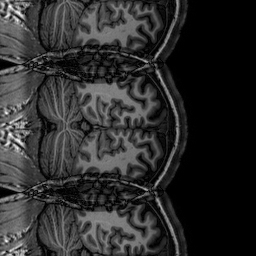

In [14]:
cv2_imshow((X_train[55,:,:,:].reshape(256,256)+1) * 127.5)

In [0]:
def generate_real_samples(dataset, n_samples, patch_shape):
	# choose random instances
	ix = np.random.randint(0, dataset.shape[0], n_samples)
	# retrieve selected images
	X = dataset[ix,:,:,:]
	# generate 'real' class labels (1)
	y = np.ones((n_samples, patch_shape, patch_shape, 1))
	return X, y


# generate a batch of images, returns images and targets
def generate_fake_samples(g_model, dataset, patch_shape, n_steps):
	# generate fake instance
	X = g_model.predict(dataset)
	# create 'fake' class labels (0)
	#print(X.shape)
	y = np.zeros((len(X), patch_shape, patch_shape, 1))
	#if (n_steps % 100 == 0):
	#	imageio.imwrite(str(n_steps) + 'sample.png', (X[:,:,:,:].reshape(256,256)+1) * 127.5)
	#imageio.imwrite('check.png', X)
	return X, y


import random
# update image pool for fake images
def update_image_pool(pool, images, max_size=50):
	selected = list()
	for image in images:
		if len(pool) < max_size:
			# stock the pool
			pool.append(image)
			selected.append(image)
		elif random.random() < 0.5:
			# use image, but don't add it to the pool
			selected.append(image)
		else:
			# replace an existing image and use replaced image
			ix = np.random.randint(0, len(pool))
			selected.append(pool[ix])
			pool[ix] = image
	return np.asarray(selected)

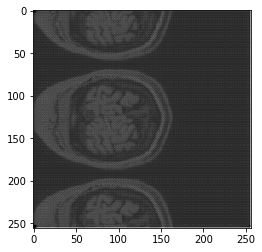

In [0]:
plt.imshow(newres[30,:,:,:].reshape(256,256), 'gray')

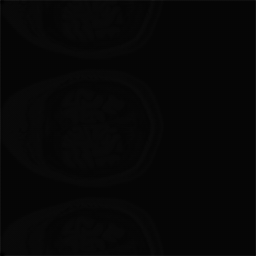

In [0]:
cv2_imshow(newres[30,:,:,:].reshape(256,256))

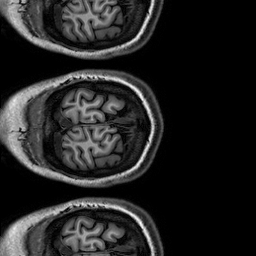

In [0]:
cv2_imshow((X_test[30,:,:,:].reshape(256,256) + 1) *127.5)

In [0]:
def generate_real_samples(dataset, n_samples, i):
	#ix = np.random.randint(0, dataset.shape[0], n_samples)
	X = dataset[i,:,:,:]
	return X.reshape(1,256,256,1)

In [0]:
from __future__ import print_function, division
import scipy

from keras.datasets import mnist
from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization
from keras.layers import Input, Dense, Reshape, Flatten, Dropout, Concatenate
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam
import datetime
import matplotlib.pyplot as plt
import sys
import numpy as np
import os

class CycleGAN():
    def __init__(self):
        # Input shape
        self.img_rows = 256
        self.img_cols = 256
        self.channels = 1
        self.img_shape = (self.img_rows, self.img_cols, self.channels)


        # Calculate output shape of D (PatchGAN)
        patch = int(self.img_rows / 2**4)
        self.disc_patch = (patch, patch, 1)

        # Number of filters in the first layer of G and D
        self.gf = 32
        self.df = 64

        # Loss weights
        self.lambda_cycle = 10.0                    # Cycle-consistency loss
        self.lambda_id = 0.1 * self.lambda_cycle    # Identity loss

        optimizer = Adam(0.0002, 0.5)

        # Build and compile the discriminators
        self.d_A = self.build_discriminator()
        self.d_B = self.build_discriminator()
        self.d_A.compile(loss='mse',
            optimizer=optimizer,
            metrics=['accuracy'])
        self.d_B.compile(loss='mse',
            optimizer=optimizer,
            metrics=['accuracy'])

        #-------------------------
        # Construct Computational
        #   Graph of Generators
        #-------------------------

        # Build the generators
        self.g_AB = self.build_generator()
        self.g_BA = self.build_generator()

        # Input images from both domains
        img_A = Input(shape=self.img_shape)
        img_B = Input(shape=self.img_shape)

        # Translate images to the other domain
        fake_B = self.g_AB(img_A)
        fake_A = self.g_BA(img_B)
        # Translate images back to original domain
        reconstr_A = self.g_BA(fake_B)
        reconstr_B = self.g_AB(fake_A)
        # Identity mapping of images
        img_A_id = self.g_BA(img_A)
        img_B_id = self.g_AB(img_B)

        # For the combined model we will only train the generators
        self.d_A.trainable = False
        self.d_B.trainable = False

        # Discriminators determines validity of translated images
        valid_A = self.d_A(fake_A)
        valid_B = self.d_B(fake_B)

        # Combined model trains generators to fool discriminators
        self.combined = Model(inputs=[img_A, img_B],
                              outputs=[ valid_A, valid_B,
                                        reconstr_A, reconstr_B,
                                        img_A_id, img_B_id ])
        self.combined.compile(loss=['mse', 'mse',
                                    'mae', 'mae',
                                    'mae', 'mae'],
                            loss_weights=[  1, 1,
                                            self.lambda_cycle, self.lambda_cycle,
                                            self.lambda_id, self.lambda_id ],
                            optimizer=optimizer)

           
    '''def build_generator(self):
        """U-Net Generator"""

        def conv2d(layer_input, filters, f_size=4):
            """Layers used during downsampling"""
            d = Conv2D(filters, kernel_size=f_size, strides=2, padding='same')(layer_input)
            d = LeakyReLU(alpha=0.2)(d)
            d = InstanceNormalization()(d)
            return d

        def deconv2d(layer_input, skip_input, filters, f_size=4, dropout_rate=0):
            """Layers used during upsampling"""
            u = UpSampling2D(size=2)(layer_input)
            u = Conv2D(filters, kernel_size=f_size, strides=1, padding='same', activation='relu')(u)
            if dropout_rate:
                u = Dropout(dropout_rate)(u)
            u = InstanceNormalization()(u)
            u = Concatenate()([u, skip_input])
            return u

        # Image input
        d0 = Input(shape=self.img_shape)

        # Downsampling
        d1 = conv2d(d0, self.gf)
        d2 = conv2d(d1, self.gf*2)
        d3 = conv2d(d2, self.gf*4)
        d4 = conv2d(d3, self.gf*8)

        # Upsampling
        u1 = deconv2d(d4, d3, self.gf*4)
        u2 = deconv2d(u1, d2, self.gf*2)
        u3 = deconv2d(u2, d1, self.gf)

        u4 = UpSampling2D(size=2)(u3)
        output_img = Conv2D(self.channels, kernel_size=4, strides=1, padding='same', activation='tanh')(u4)

        return Model(d0, output_img)'''
    
    def build_generator(weights = None, input_size = (256,256,1)):
      lrelu = lambda x: tf.keras.activations.relu(x, alpha=0.2)
      inp = keras.engine.input_layer.Input(input_size)
      #Encoder
      c1 = Conv2D(64, (3,3), activation = lrelu, padding='same')(inp)
      c1 = BatchNormalization()(c1)
      c1 = Conv2D(64, (3,3), activation = lrelu, padding = 'same')(c1)
      c1 = BatchNormalization()(c1)
      p1 = MaxPooling2D(pool_size=(2,2))(c1)
      
      c2 = Conv2D(128, (3,3), activation = lrelu, padding='same')(p1)
      c2 = InstanceNormalization()(c2)
      c2 = Conv2D(128, (3,3), activation = lrelu, padding = 'same')(c2)
      c2 = InstanceNormalization()(c2)
      p2 = MaxPooling2D(pool_size=(2,2))(c2)
      p2 = Dropout(0.3)(p2)
      
      c3 = Conv2D(256, (3,3), activation = lrelu, padding='same')(p2)
      c3 = InstanceNormalization()(c3)
      c3 = Conv2D(256, (3,3), activation = lrelu, padding = 'same')(c3)
      c3 = InstanceNormalization()(c3)
      p3 = MaxPooling2D(pool_size=(2,2))(c3)
      
      c4 = Conv2D(512, (3,3), activation = lrelu, padding='same')(p3)
      c4 = InstanceNormalization()(c4)
      c4 = Conv2D(512, (3,3), activation = lrelu, padding = 'same')(c4)
      c4 = InstanceNormalization()(c4)
      p4 = MaxPooling2D(pool_size=(2,2))(c4)
      
      c5 = Conv2D(1024, (3,3), activation = lrelu, padding='same')(p4)
      c5 = InstanceNormalization()(c5)
      c5 = Conv2D(1024, (3,3), activation = lrelu, padding = 'same')(c5)
      c5 = InstanceNormalization()(c5)
      
      #Decoder
      u6 = Conv2DTranspose(512, (3,3), activation = 'relu', strides = (2,2), padding = 'same')(c5)
      concat6 = concatenate([u6,c4])
      c6 = Conv2D(512, (3,3), activation = 'relu', padding = 'same')(concat6)
      c6 = InstanceNormalization()(c6)
      c6 = Conv2D(512, (3,3), activation = 'relu', padding = 'same')(c6)
      c6 = InstanceNormalization()(c6)
      
      u7 = Conv2DTranspose(256, (3,3), activation = 'relu', strides = (2,2), padding = 'same')(c6)
      concat7 = concatenate([u7,c3])
      c7 = Conv2D(256, (3,3), activation = 'relu', padding = 'same')(concat7)
      c7 = InstanceNormalization()(c7)
      c7 = Conv2D(256, (3,3), activation = 'relu', padding = 'same')(c7)
      c7 = InstanceNormalization()(c7)
      
      u8 = Conv2DTranspose(128, (3,3), activation = 'relu', strides = (2,2), padding = 'same')(c7)
      concat8 = concatenate([u8,c2])
      c8 = Conv2D(128, (3,3), activation = 'relu', padding = 'same')(concat8)
      c8 = InstanceNormalization()(c8)
      c8 = Conv2D(128, (3,3), activation = 'relu', padding = 'same')(c8)
      c8 = InstanceNormalization()(c8)
      C8 = Dropout(0.3)(c8)
      
      u9 = Conv2DTranspose(64, (3,3), activation = 'relu', strides = (2,2), padding = 'same')(c8)
      concat9 = concatenate([u9,c1])
      c9 = Conv2D(64, (3,3), activation = 'relu', padding = 'same')(concat9)
      c9 = InstanceNormalization()(c9)
      c9 = Conv2D(64, (3,3), activation = 'relu', padding = 'same')(c9)
      c9 = InstanceNormalization()(c9)
      
      c10 = Conv2D(1, (1,1), activation = 'tanh')(c9)
      model = Model(input=inp, output=c10)

      return model

    def build_discriminator(self):

        def d_layer(layer_input, filters, f_size=4, normalization=True):
            """Discriminator layer"""
            d = Conv2D(filters, kernel_size=f_size, strides=2, padding='same')(layer_input)
            d = LeakyReLU(alpha=0.2)(d)
            if normalization:
                d = InstanceNormalization()(d)
            return d

        img = Input(shape=self.img_shape)

        d1 = d_layer(img, self.df, normalization=False)
        d2 = d_layer(d1, self.df*2)
        d3 = d_layer(d2, self.df*4)
        d4 = d_layer(d3, self.df*8)

        validity = Conv2D(1, kernel_size=4, strides=1, padding='same')(d4)

        return Model(img, validity)

    def train(self, epochs, batch_size=1, sample_interval=50):

        start_time = datetime.datetime.now()

        # Adversarial loss ground truths
        valid = np.ones((batch_size,) + self.disc_patch)
        fake = np.zeros((batch_size,) + self.disc_patch)

        for epoch in range(epochs):
          for i in range(2000):
            # Translate images to opposite domain
            imgs_A = generate_real_samples(X_train, 1, i)
            imgs_B = generate_real_samples(Y_train, 1, i)
            fake_B = self.g_AB.predict(imgs_A)
            fake_A = self.g_BA.predict(imgs_B)

            # Train the discriminators (original images = real / translated = Fake)
            dA_loss_real = self.d_A.train_on_batch(imgs_A, valid)
            dA_loss_fake = self.d_A.train_on_batch(fake_A, fake)
            dA_loss = 0.5 * np.add(dA_loss_real, dA_loss_fake)

            dB_loss_real = self.d_B.train_on_batch(imgs_B, valid)
            dB_loss_fake = self.d_B.train_on_batch(fake_B, fake)
            dB_loss = 0.5 * np.add(dB_loss_real, dB_loss_fake)

            # Total disciminator loss
            d_loss = 0.5 * np.add(dA_loss, dB_loss)


            # ------------------
            #  Train Generators
            # ------------------

            # Train the generators
            g_loss = self.combined.train_on_batch([imgs_A, imgs_B],
                                                    [valid, valid,
                                                    imgs_A, imgs_B,
                                                    imgs_A, imgs_B])

            elapsed_time = datetime.datetime.now() - start_time

            # Plot the progress
          print ("[Epoch %d/%d] [D loss: %f, acc: %3d%%] [G loss: %05f, adv: %05f, recon: %05f, id: %05f] time: %s " \
                                                                  % ( epoch, epochs,
                                                                      d_loss[0], 100*d_loss[1],
                                                                      g_loss[0],
                                                                      np.mean(g_loss[1:3]),
                                                                      np.mean(g_loss[3:5]),
                                                                      np.mean(g_loss[5:6]),
                                                                      elapsed_time))


    def sample_images(self, epoch, batch_i):
        os.makedirs('images/%s' % self.dataset_name, exist_ok=True)
        r, c = 2, 3

        imgs_A = self.data_loader.load_data(domain="A", batch_size=1, is_testing=True)
        imgs_B = self.data_loader.load_data(domain="B", batch_size=1, is_testing=True)

        # Demo (for GIF)
        #imgs_A = self.data_loader.load_img('datasets/apple2orange/testA/n07740461_1541.jpg')
        #imgs_B = self.data_loader.load_img('datasets/apple2orange/testB/n07749192_4241.jpg')

        # Translate images to the other domain
        fake_B = self.g_AB.predict(imgs_A)
        fake_A = self.g_BA.predict(imgs_B)
        # Translate back to original domain
        reconstr_A = self.g_BA.predict(fake_B)
        reconstr_B = self.g_AB.predict(fake_A)

        gen_imgs = np.concatenate([imgs_A, fake_B, reconstr_A, imgs_B, fake_A, reconstr_B])

        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5

        titles = ['Original', 'Translated', 'Reconstructed']
        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt])
                axs[i, j].set_title(titles[j])
                axs[i,j].axis('off')
                cnt += 1
        fig.savefig("images/%d.png" % (epoch))
        plt.close()

In [19]:
gan = CycleGAN()













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:200: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`


In [44]:
gan.train(epochs=10, batch_size=1, sample_interval=10)

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


[Epoch 0/10] [D loss: 0.043617, acc:  99%] [G loss: 0.150727, adv: 0.037044, recon: 0.003223, id: 0.004509] time: 0:17:47.332148 
[Epoch 1/10] [D loss: 0.019533, acc:  99%] [G loss: 0.180927, adv: 0.053547, recon: 0.002845, id: 0.011038] time: 0:35:33.655170 
[Epoch 2/10] [D loss: 0.059181, acc:  97%] [G loss: 0.138748, adv: 0.027237, recon: 0.003522, id: 0.007869] time: 0:53:20.634115 
[Epoch 3/10] [D loss: 0.066775, acc:  97%] [G loss: 0.121810, adv: 0.031302, recon: 0.002492, id: 0.004461] time: 1:11:08.270619 
[Epoch 4/10] [D loss: 0.285701, acc:  29%] [G loss: 0.486661, adv: 0.193821, recon: 0.004575, id: 0.004058] time: 1:28:54.861281 
[Epoch 5/10] [D loss: 0.253767, acc:  51%] [G loss: 0.318041, adv: 0.121729, recon: 0.002974, id: 0.007083] time: 1:46:41.542954 
[Epoch 6/10] [D loss: 0.173791, acc:  76%] [G loss: 0.172034, adv: 0.054026, recon: 0.002707, id: 0.004544] time: 2:04:28.080328 
[Epoch 7/10] [D loss: 0.106031, acc:  88%] [G loss: 0.172317, adv: 0.051098, recon: 0.0026

In [64]:
pred = gan.g_AB.predict(X_test, verbose = 1)

300/300 [==============================] - 4s 13ms/step


In [0]:
npred = (pred+1)*127.5

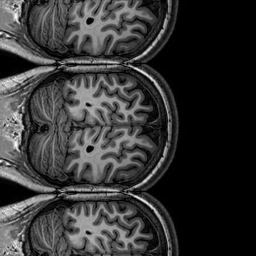

In [35]:
cv2_imshow((X_test[45,:,:,:].reshape(256,256)+1)*127.5)

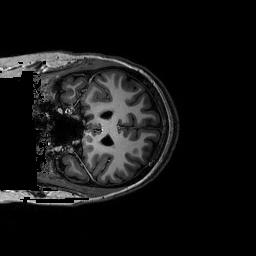

In [43]:
cv2_imshow((Y_test[121,:,:,:].reshape(256,256)+1)*127.5)

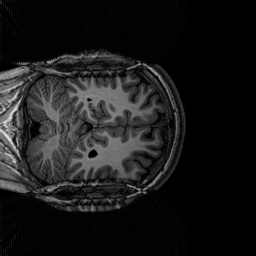

In [66]:
cv2_imshow(npred[55,:,:,:].reshape(256,256))

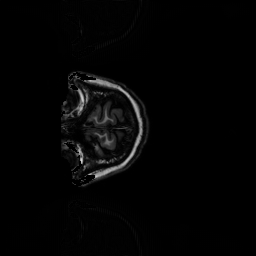

In [72]:
cv2_imshow(npred[155,:,:,:].reshape(256,256))

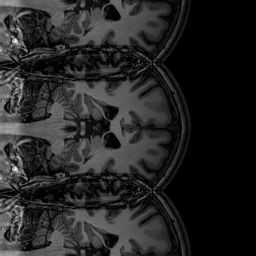

In [49]:
cv2_imshow((X_test[75,:,:,:].reshape(256,256)+1)*127.5)

In [0]:
pred = gan.g_AB.predict(X_test, verbose = 1)

300/300 [==============================] - 1s 3ms/step


In [0]:
npred = (pred + 1) * 127.5

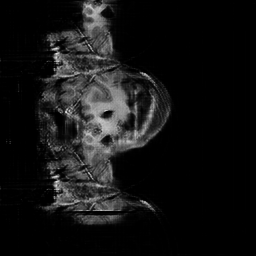

In [0]:
cv2_imshow(npred[121,:,:,:].reshape(256,256))

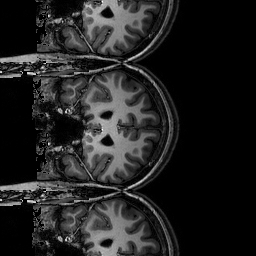

In [0]:
cv2_imshow((X_test[121,:,:,:].reshape(256,256)+1) *127.5)

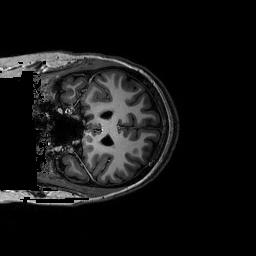

In [0]:
cv2_imshow((Y_test[121,:,:,:].reshape(256,256)+1) *127.5)

In [0]:
res_y = gan.g_AB.predict(X_test)

In [0]:
res_x = gan.g_BA.predict(Y_test, verbose = 1)

300/300 [==============================] - 1s 3ms/step


In [0]:
res_y.shape

(300, 256, 256, 1)

In [0]:
np.max(res)

-0.7000518

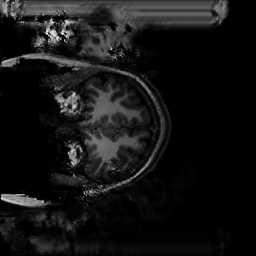

In [0]:
cv2_imshow((res_x[135,:,:,:].reshape(256,256)+1) * 127.5)

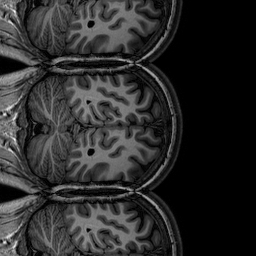

In [0]:
cv2_imshow((X_test[50,:,:,:].reshape(256,256)+1) * 127.5)